In [2]:
import importlib 
import Classification
importlib.reload(Classification)
from Classification import *

All Imported
All Newly Imported
All Imported
All Newly Imported


In [4]:
new_df = pd.read_csv('test1931.csv')
new_df.head()

,Projects,Premise ID,Farm Type,Head,Latitude,Longitude,Age,Age Unit,Order Date,RFLP_Type,...,Sample Type,Sample Size,Accession ID,NewID,AA_code,Brenn ID in SE Iowa dataset,Clades_A6,Clades_A6_names,Clades_A2,Clades_A2_names
0,SE Iowa Project,00JYUK1,Finisher,2400.0,41.38,-91.86,10.0,Weeks,2_15_12,1_4_4,...,Lung,1,2012004943,2012004943_BM,MLGKCLTAGYCSQLPFLWCIVPFCLAALVNASNGSSSHLQLIYNLT...,True,Green,Subclade3,Wild,Clade B
1,SE Iowa Project,00G0P2H,Finisher,2400.0,41.35,-91.91,12.0,Weeks,2_15_12,1_4_4,...,Oral Fluids,2,2012004980,2012004980_BM,MLGKCLTAGYCSQLPFLWCIVPFCLAALVNASNGSSSHLQLIYNLT...,True,Green,Subclade3,Wild,Clade B
2,SE Iowa Project,00GHP7B,Nursery,5000.0,41.41,-91.73,0.0,0,3_23_12,1_4_4,...,Oral Fluids,1,2012009897,2012009897_BM,MLGKCLTAGYCSQLPFFWCIVPFCLAALVNASNGSSSHLQLIYNLT...,True,Green,Subclade3,Wild,Clade B
3,SE Iowa Project,00G0RPZ,Nursery,3400.0,41.39,-91.81,0.0,0,3_23_12,1_4_4,...,Serum,1,2012009961,2012009961_BM,MLGKCLTAGYCSQLPFFWCIVPFCLAALVNASNGSSSHLQLIYNLT...,True,Green,Subclade3,Wild,Clade B
4,SE Iowa Project,00GHQ2H,Breeding Herd,6000.0,41.43,-91.74,0.0,0,04_12_04,2_5_2,...,Serum,1,2012011926,2012011926_BM,MLEKCLTAGCCSQLLSLWCIVPFCFAVLANASNDSSSHLQLIYNLT...,True,Red,Clade A,MLV,Clade A


In [142]:
new_df.columns = clean_columns(new_df)
new_df.columns

Index(['Projects', 'Premise_ID', 'Farm_Type', 'Head', 'Latitude', 'Longitude',
       'RFLP_Type', 'Seq_Comment_Result', 'Sample_Type', 'Sample_Size',
       'Accession_ID', 'NewID', 'AA_code', 'Clades_A6'],
      dtype='object')

In [8]:
colors = new_df['Clades_A6'].tolist()

In [10]:
set(colors)

{'DarkPurple', 'Green', 'Orange', 'Red'}

# Red: Vaccine
# Dark Purple: Subclade 1
# Green: Subclade 3
# Orange: Subclade 2

In [11]:
len(new_df[new_df['Clades_A6'] == 'Red'])

438

In [14]:
len(new_df[new_df['Clades_A6'] == 'DarkPurple'])

1225

In [15]:
len(new_df[new_df['Clades_A6'] == 'Green'])

199

In [16]:
len(new_df[new_df['Clades_A6'] == 'Orange'])

69

In [17]:
col1 = ['Projects', 'Premise_ID', 'Farm_Type', 'Head', 'Latitude', 'Longitude', 'RFLP_Type', 'Seq_Comment_Result', 'Sample_Type',\
        'Sample_Size', 'Accession_ID','NewID','AA_code','Clades_A6']



In [18]:
new_df = new_df[col1].copy()
new_df.head()

,Projects,Premise_ID,Farm_Type,Head,Latitude,Longitude,RFLP_Type,Seq_Comment_Result,Sample_Type,Sample_Size,Accession_ID,NewID,AA_code,Clades_A6
0,SE Iowa Project,00JYUK1,Finisher,2400.0,41.38,-91.86,1_4_4,Wild type,Lung,1,2012004943,2012004943_BM,MLGKCLTAGYCSQLPFLWCIVPFCLAALVNASNGSSSHLQLIYNLT...,Green
1,SE Iowa Project,00G0P2H,Finisher,2400.0,41.35,-91.91,1_4_4,Wild type,Oral Fluids,2,2012004980,2012004980_BM,MLGKCLTAGYCSQLPFLWCIVPFCLAALVNASNGSSSHLQLIYNLT...,Green
2,SE Iowa Project,00GHP7B,Nursery,5000.0,41.41,-91.73,1_4_4,Wild type,Oral Fluids,1,2012009897,2012009897_BM,MLGKCLTAGYCSQLPFFWCIVPFCLAALVNASNGSSSHLQLIYNLT...,Green
3,SE Iowa Project,00G0RPZ,Nursery,3400.0,41.39,-91.81,1_4_4,Wild type,Serum,1,2012009961,2012009961_BM,MLGKCLTAGYCSQLPFFWCIVPFCLAALVNASNGSSSHLQLIYNLT...,Green
4,SE Iowa Project,00GHQ2H,Breeding Herd,6000.0,41.43,-91.74,2_5_2,Ingelvac MLV like,Serum,1,2012011926,2012011926_BM,MLEKCLTAGCCSQLLSLWCIVPFCFAVLANASNDSSSHLQLIYNLT...,Red


In [19]:
set(new_df['Clades_A6'])

{'DarkPurple', 'Green', 'Orange', 'Red'}

In [20]:
new_df.AA_code = [aacode_to_mat2(aacode.strip('*')) for aacode in new_df.AA_code]
#result = {'Ingelvac MLV like': 0,'Wild type': 1} 
#new_df.Seq_Comment_Result = [result[item] for item in new_df.Seq_Comment_Result]

In [21]:
new_df.head()

,Projects,Premise_ID,Farm_Type,Head,Latitude,Longitude,RFLP_Type,Seq_Comment_Result,Sample_Type,Sample_Size,Accession_ID,NewID,AA_code,Clades_A6
0,SE Iowa Project,00JYUK1,Finisher,2400.0,41.38,-91.86,1_4_4,Wild type,Lung,1,2012004943,2012004943_BM,"[-0.663, -1.524, 2.219, -1.005, 1.212, -1.019,...",Green
1,SE Iowa Project,00G0P2H,Finisher,2400.0,41.35,-91.91,1_4_4,Wild type,Oral Fluids,2,2012004980,2012004980_BM,"[-0.663, -1.524, 2.219, -1.005, 1.212, -1.019,...",Green
2,SE Iowa Project,00GHP7B,Nursery,5000.0,41.41,-91.73,1_4_4,Wild type,Oral Fluids,1,2012009897,2012009897_BM,"[-0.663, -1.524, 2.219, -1.005, 1.212, -1.019,...",Green
3,SE Iowa Project,00G0RPZ,Nursery,3400.0,41.39,-91.81,1_4_4,Wild type,Serum,1,2012009961,2012009961_BM,"[-0.663, -1.524, 2.219, -1.005, 1.212, -1.019,...",Green
4,SE Iowa Project,00GHQ2H,Breeding Herd,6000.0,41.43,-91.74,2_5_2,Ingelvac MLV like,Serum,1,2012011926,2012011926_BM,"[-0.663, -1.524, 2.219, -1.005, 1.212, -1.019,...",Red


In [34]:
x = pd.DataFrame(new_df['AA_code'].values.tolist())
x = x.fillna(0.0)
y = new_df['Clades_A6']

label_dict = {'DarkPurple':3, 'Green':2, 'Orange':1, 'Red':0}


y1 = [label_dict[item] for item in y]
y1 = pd.DataFrame(y1)
y = y1.copy()

x

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
1,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
2,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
3,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
4,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
1927,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
1928,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
1929,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392


In [35]:
y, set(y[0])

(      0
 0     2
 1     2
 2     2
 3     2
 4     0
 ...  ..
 1926  0
 1927  0
 1928  2
 1929  2
 1930  2
 
 [1931 rows x 1 columns],
 {0, 1, 2, 3})

In [36]:
from sklearn.ensemble import RandomForestClassifier


In [59]:
def RF_multi(x,y, test_size=0.33):
    t= time.time()
    x_tr, x_te, y_tr, y_te = train_test_split(x,y,test_size=test_size)#, random_state=42)
    rf = RandomForestClassifier(random_state=42)
    rf.fit(x_tr, y_tr)
    y_pred_train = rf.predict(x_tr) # Predictions on training
    y_pred_test = rf.predict(x_te) # predictions for test
    preds = rf.predict(x_te)

    auc = roc_auc_score(y_te,rf.predict_proba(x_te), multi_class='ovr')
    acc = accuracy_score(y_te,preds)
    elapsed = time.time() - t

    target_names = ['Vaccine', 'SubClade 2', 'Subclade 3', 'Subclade 1']
    # Red: Vaccine
    # Dark Purple: Subclade 1
    # Green: Subclade 3
    # Orange: Subclade 2
    # sklearn.metrics.classification_report(y_te, preds, target_names = target_names)
    prf = precision_recall_fscore_support(y_te, preds, average = 'weighted')
    prec_avg = prf[0]
    recall_avg = prf[1]
    f1_avg = prf[2]
    #print(sklearn.metrics.classification_report(y_te, preds, target_names = target_names))

    #print(elapsed, auc, acc)
    return acc, auc, elapsed, prf[0], prf[1], prf[2]

# Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label).

In [56]:
prf[0], prf[1], prf[2]

(1.0, 1.0, 1.0)

In [66]:
def FI_RF_multi(x,y, test_size=0.33):
    x_tr, x_te, y_tr, y_te = train_test_split(x,y,test_size=test_size)#, random_state=42)
    rf = RandomForestClassifier(random_state=42)
    rf.fit(x_tr, y_tr)
    y_pred_train = rf.predict(x_tr) # Predictions on training
    y_pred_test = rf.predict(x_te) # predictions for test
    preds = rf.predict(x_te)
    
#     y_prob = rf.predict_proba(x_te)
#     y_prob = y_prob[:,1]

    auc = roc_auc_score(y_te,rf.predict_proba(x_te), multi_class='ovr')
    acc = accuracy_score(y_te,preds)
    
    feature_imp = pd.Series(rf.feature_importances_)
    imp = feature_imp.values.reshape(200,5)
    imp2 = imp.sum(axis=1)
    return imp2, feature_imp
    #print("Accuracy:", accuracy_score(y_te,preds))

In [67]:
#Initial run of RF to select few features
n_ex=100;
imp_list = np.zeros((200,n_ex))
feat_imp_list = np.zeros((1000, n_ex))
for i in range(n_ex):
    imp, feat_imp = FI_RF_multi(x,y)
    imp_list[:,i] = imp
    feat_imp_list[:,i] = feat_imp

<ipython-input-66-e078ab662f0b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-66-e078ab662f0b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-66-e078ab662f0b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-66-e078ab662f0b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-66-e078ab662f0b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

<ipython-input-66-e078ab662f0b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-66-e078ab662f0b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-66-e078ab662f0b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-66-e078ab662f0b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-66-e078ab662f0b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

<ipython-input-66-e078ab662f0b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-66-e078ab662f0b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-66-e078ab662f0b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-66-e078ab662f0b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-66-e078ab662f0b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [68]:
imp_vis = np.sum(imp_list, axis=1)/n_ex
feat_imp_vis = np.sum(feat_imp_list, axis=1)/n_ex

imp_vis_sorted = sorted(imp_vis,reverse=True).copy()
feat_imp_vis_sorted = sorted(feat_imp_vis,reverse=True).copy()

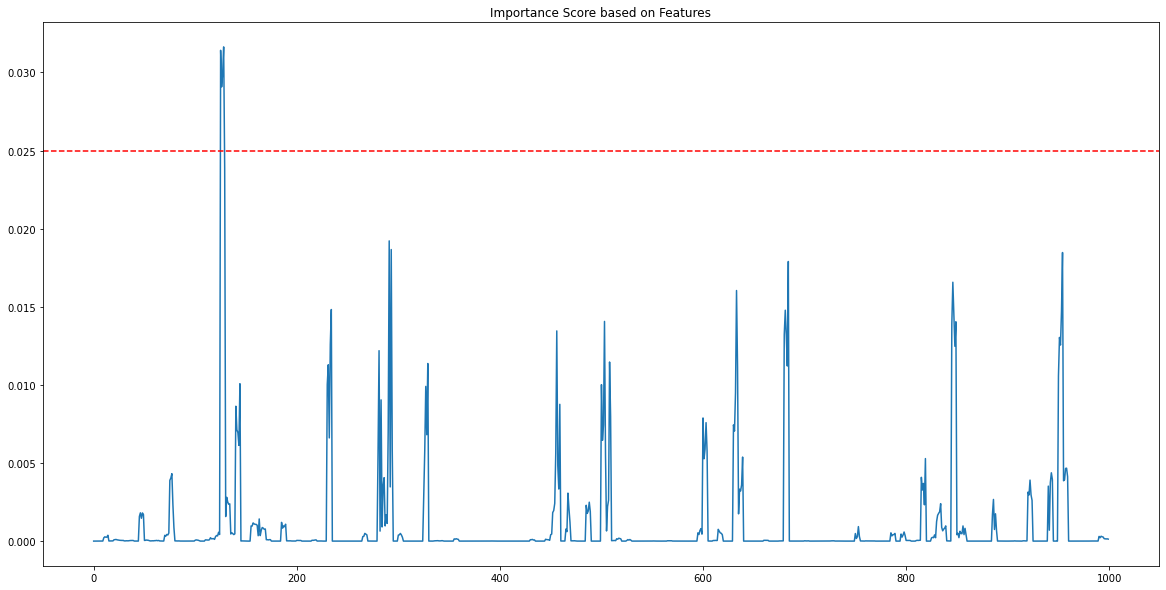

Top important positions: 
[[26]]

Top important features: 
[[125]
 [126]
 [127]
 [128]]
 in positions 
[[26.]
 [26.]
 [26.]
 [26.]]


In [69]:
imp_vis = np.sum(imp_list, axis=1)/n_ex
feat_imp_vis = np.sum(feat_imp_list, axis=1)/n_ex

plt.figure(figsize = (20,10))
#plt.subplot(121)
#plt.plot(imp_vis)
#plt.axhline(y=0.09, color='r', linestyle='--')
#plt.title('Importance Score based on Positions')

#plt.subplot(122)
plt.plot(feat_imp_vis)
plt.axhline(y=0.025, color='r', linestyle='--')
plt.title('Importance Score based on Features')
plt.show()

print('Top important positions: \n{}\n'.format(np.argwhere(imp_vis>0.09)+1))
print('Top important features: \n{}\n in positions \n{}'\
      .format(np.argwhere(feat_imp_vis>0.025), np.floor(np.argwhere(feat_imp_vis>0.025)/5)+1))

In [70]:
len(np.argwhere(imp_vis>0.0)), np.argwhere(imp_vis>0.0) 

(163,
 array([[  1],
        [  2],
        [  3],
        [  4],
        [  5],
        [  6],
        [  7],
        [  8],
        [  9],
        [ 10],
        [ 11],
        [ 12],
        [ 13],
        [ 14],
        [ 15],
        [ 16],
        [ 17],
        [ 18],
        [ 19],
        [ 20],
        [ 21],
        [ 22],
        [ 23],
        [ 24],
        [ 25],
        [ 26],
        [ 27],
        [ 28],
        [ 29],
        [ 30],
        [ 31],
        [ 32],
        [ 33],
        [ 34],
        [ 35],
        [ 36],
        [ 37],
        [ 38],
        [ 39],
        [ 40],
        [ 43],
        [ 44],
        [ 46],
        [ 50],
        [ 53],
        [ 54],
        [ 55],
        [ 56],
        [ 57],
        [ 58],
        [ 59],
        [ 60],
        [ 62],
        [ 63],
        [ 65],
        [ 66],
        [ 67],
        [ 68],
        [ 69],
        [ 70],
        [ 71],
        [ 72],
        [ 73],
        [ 74],
        [ 75],
        [ 78],
    

In [71]:
len(np.argwhere(imp_vis>0.13)), np.argwhere(imp_vis>0.13)+1

(1, array([[26]]))

In [72]:
len(np.argwhere(imp_vis>0.07)), np.argwhere(imp_vis>0.07)+1

(3,
 array([[ 26],
        [137],
        [170]]))

In [73]:
len(np.argwhere(imp_vis>0.04)), np.argwhere(imp_vis>0.04)+1

(8,
 array([[ 26],
        [ 47],
        [ 59],
        [101],
        [127],
        [137],
        [170],
        [191]]))

In [74]:
len(np.argwhere(imp_vis>0.00)), np.argwhere(imp_vis>0.00)+1

(163,
 array([[  2],
        [  3],
        [  4],
        [  5],
        [  6],
        [  7],
        [  8],
        [  9],
        [ 10],
        [ 11],
        [ 12],
        [ 13],
        [ 14],
        [ 15],
        [ 16],
        [ 17],
        [ 18],
        [ 19],
        [ 20],
        [ 21],
        [ 22],
        [ 23],
        [ 24],
        [ 25],
        [ 26],
        [ 27],
        [ 28],
        [ 29],
        [ 30],
        [ 31],
        [ 32],
        [ 33],
        [ 34],
        [ 35],
        [ 36],
        [ 37],
        [ 38],
        [ 39],
        [ 40],
        [ 41],
        [ 44],
        [ 45],
        [ 47],
        [ 51],
        [ 54],
        [ 55],
        [ 56],
        [ 57],
        [ 58],
        [ 59],
        [ 60],
        [ 61],
        [ 63],
        [ 64],
        [ 66],
        [ 67],
        [ 68],
        [ 69],
        [ 70],
        [ 71],
        [ 72],
        [ 73],
        [ 74],
        [ 75],
        [ 76],
        [ 79],
    

In [75]:
eg = [1,0,5,3,4]
sorted(range(len(eg)), key = lambda x: -eg[x])


[2, 4, 3, 0, 1]

In [76]:
len(imp_vis)

200

In [77]:
sorted_position_index = sorted(range(len(imp_vis)), key = lambda x: -imp_vis[x])
sorted_position_index = [x+1 for x in sorted_position_index if imp_vis[x]>0.01]
print(*sorted_position_index, sep = ", ")  


26, 170, 137, 191, 47, 59, 127, 101, 29, 66, 92, 121, 57, 102, 192, 164, 128, 189, 185, 16, 27, 58, 98


In [146]:
sorted(imp_vis, reverse=True)

[0.14595873415022692,
 0.07159105190938701,
 0.07026885535433626,
 0.06936501322488559,
 0.05533283344657551,
 0.05412524721627413,
 0.051142805961093094,
 0.04341911690399813,
 0.03890492948557353,
 0.036911905971751584,
 0.036007711911591495,
 0.032385663182000056,
 0.028353800720877228,
 0.02492098374583226,
 0.02123099748989542,
 0.01864877977237851,
 0.017254535006533143,
 0.01627632646360349,
 0.0155583539873519,
 0.01547980199388028,
 0.01161137253762143,
 0.011379731859844604,
 0.010374587431841777,
 0.008948121656289755,
 0.00834782706934547,
 0.007729738904478518,
 0.00754595918747867,
 0.007051297979386737,
 0.005264093917087823,
 0.005003747731569518,
 0.004197154213793419,
 0.004111115934230549,
 0.003917773414232863,
 0.0031001280324636587,
 0.002877122470984299,
 0.0028152759066157346,
 0.0023390331146555528,
 0.0022437562569246105,
 0.0021796761623031472,
 0.0021579247535602453,
 0.0020341895570835104,
 0.0020150692462450243,
 0.001959601208481577,
 0.001928466785051284

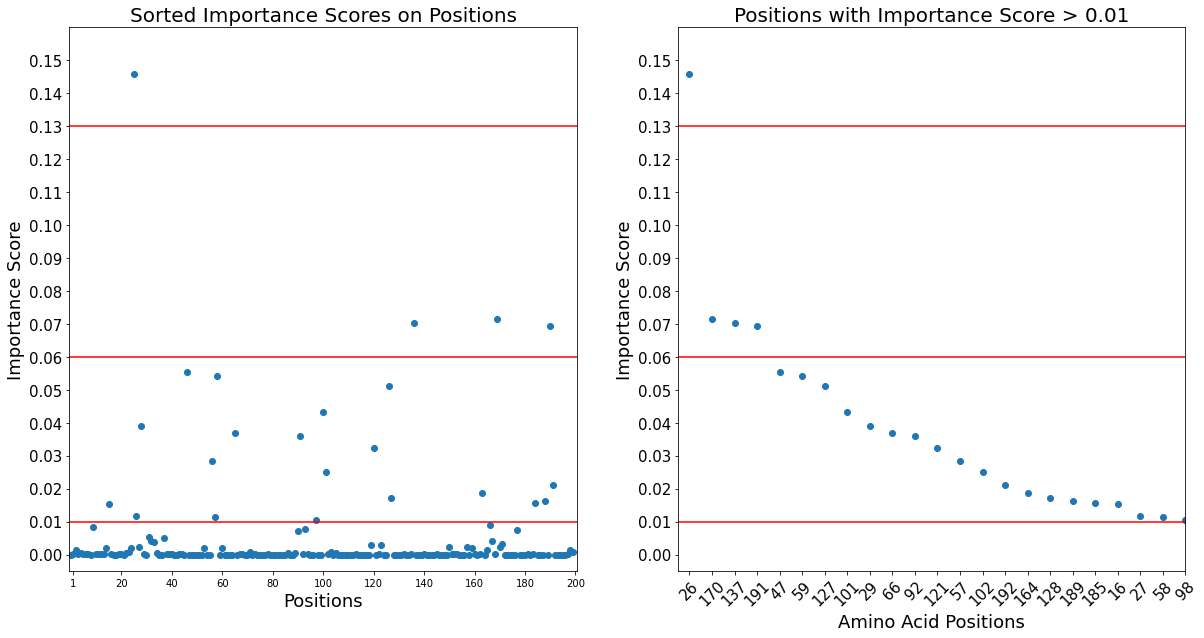

In [104]:
fig4 = plt.figure(figsize = (20,10))
plt.subplot(121)

index_feat_imp = sorted(range(len(feat_imp_vis_sorted)), key = lambda x: -feat_imp_vis[x])

# plt.scatter(range(len(feat_imp_vis_sorted)), feat_imp_vis_sorted)
# #plt.plot(feat_imp_vis)


# #plt.axhline(y=0.025, color='r', linestyle='--')
# plt.xlabel('Features (Attribute)', fontsize = 15)
# #plt.xticks(index_feat_imp)
# plt.xticks([], [])


# plt.ylabel('Importance Score', fontsize = 15)
# plt.title('Importance Score based on Features', fontsize = 20)



#plt.scatter(range(len(imp_vis)), sorted(imp_vis ,reverse = True))
plt.scatter(range(len(imp_vis)), (imp_vis))
plt.axis([-0.5, 200.5, -0.005, 0.16])

#plt.plot(feat_imp_vis)

xt = [1] + list(range(20, 201, 20))
#plt.axhline(y=0.025, color='r', linestyle='--')
plt.xlabel('Positions', fontsize = 18)
plt.xticks(xt)
#plt.xticks([], [])
# th = [0.0, 0.01, 0.03, 0.05, 0.07, 0.09, 0.11]
th = [0.01, 0.06, 0.13]
for item in th:
    plt.axhline(item, color='r', linestyle='-', label = 'item')
    #plt.text(216, item, str(item), fontsize=10, va='center', ha='center', backgroundcolor='w')


plt.ylabel('Importance Score', fontsize = 18)
plt.title('Sorted Importance Scores on Positions', fontsize = 20)
#plt.tick_params(axis='y', which='both', labelleft=True, labelright=th)
plt.yticks(np.arange(0.00, 0.16, 0.01), fontsize = 15)



plt.subplot(122)
imp_vis01 = sorted([x for x in imp_vis if x>0.01],reverse = True)
#plt.scatter(range(len(imp_vis)), imp_vis)
plt.scatter(range(len(imp_vis01)), imp_vis01)
plt.axis([-0.5, 17.5, -0.005, 0.16])

th = [0.01, 0.06, 0.13]
for item in th:
    plt.axhline(item, color='r', linestyle='-', label = 'item')
    #plt.text(216, item, str(item), fontsize=10, va='center', ha='center', backgroundcolor='w')


plt.xlabel('Amino Acid Positions', fontsize = 18)
plt.ylabel('Importance Score', fontsize = 18)
plt.title('Positions with Importance Score > 0.01', fontsize = 20)
plt.xticks(np.arange(len(sorted_position_index)),sorted_position_index, rotation = 45, fontsize = 15)
plt.yticks(np.arange(0.00, 0.16, 0.01), fontsize = 15)

plt.show()
fig4.savefig("multi/Imp_Pos_{}.pdf".format(th[0]), bbox_inches='tight')




In [83]:
len(sorted_position_index)

23

In [84]:
sorted_position_index

[26,
 170,
 137,
 191,
 47,
 59,
 127,
 101,
 29,
 66,
 92,
 121,
 57,
 102,
 192,
 164,
 128,
 189,
 185,
 16,
 27,
 58,
 98]

In [85]:
index_feat_imp

[128,
 125,
 127,
 126,
 129,
 291,
 293,
 954,
 684,
 846,
 633,
 234,
 681,
 953,
 847,
 503,
 849,
 845,
 456,
 680,
 682,
 951,
 233,
 952,
 848,
 281,
 508,
 329,
 231,
 683,
 634,
 950,
 144,
 230,
 500,
 327,
 632,
 283,
 459,
 140,
 509,
 600,
 603,
 630,
 502,
 141,
 631,
 290,
 142,
 328,
 232,
 501,
 143,
 602,
 294,
 326,
 604,
 455,
 280,
 504,
 639,
 819,
 601,
 457,
 958,
 957,
 943,
 77,
 959,
 815,
 286,
 76,
 944,
 956,
 922,
 75,
 955,
 942,
 817,
 638,
 285,
 940,
 292,
 458,
 636,
 816,
 637,
 920,
 467,
 325,
 923,
 921,
 131,
 886,
 507,
 924,
 132,
 488,
 454,
 834,
 134,
 78,
 133,
 818,
 485,
 506,
 468,
 453,
 487,
 489,
 833,
 452,
 46,
 48,
 832,
 486,
 888,
 635,
 885,
 49,
 288,
 831,
 45,
 130,
 47,
 163,
 830,
 469,
 185,
 157,
 289,
 158,
 189,
 160,
 159,
 161,
 187,
 839,
 287,
 856,
 155,
 156,
 753,
 188,
 284,
 835,
 79,
 166,
 838,
 186,
 167,
 858,
 598,
 169,
 465,
 837,
 168,
 615,
 887,
 941,
 165,
 889,
 597,
 836,
 505,
 282,
 616,
 853,
 4

In [86]:
len(sorted_position_index)
len(imp_vis01)

23

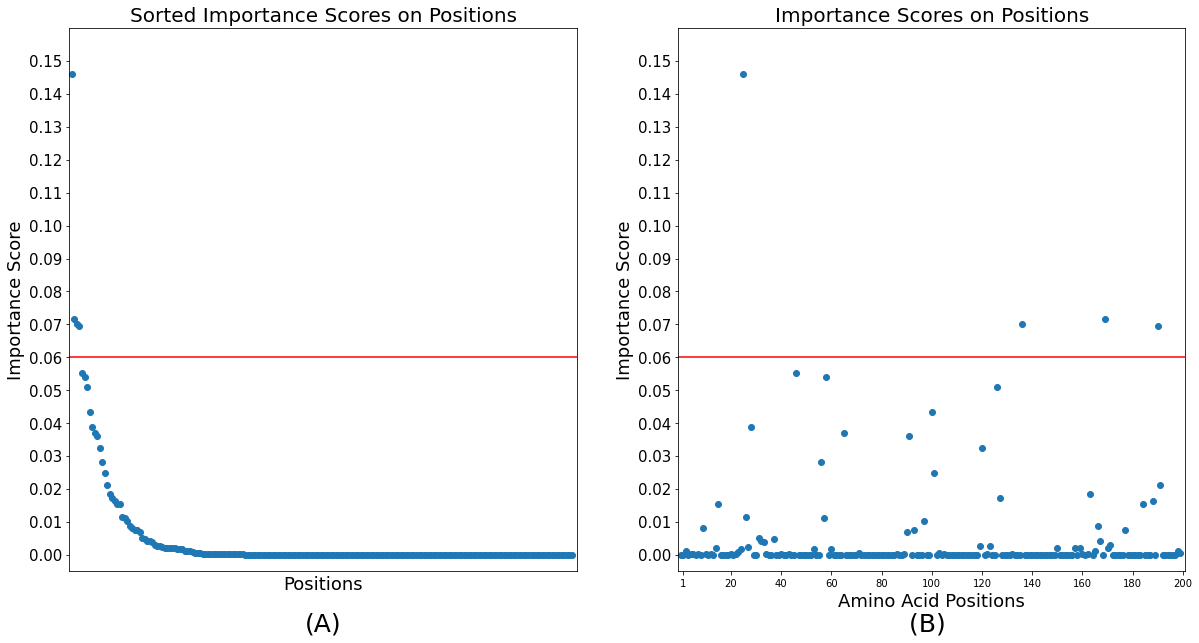

In [318]:
fig4 = plt.figure(figsize = (20,10))
plt.subplot(122)

index_feat_imp = sorted(range(len(feat_imp_vis_sorted)), key = lambda x: -feat_imp_vis[x])

# plt.scatter(range(len(feat_imp_vis_sorted)), feat_imp_vis_sorted)
# #plt.plot(feat_imp_vis)


# #plt.axhline(y=0.025, color='r', linestyle='--')
# plt.xlabel('Features (Attribute)', fontsize = 15)
# #plt.xticks(index_feat_imp)
# plt.xticks([], [])


# plt.ylabel('Importance Score', fontsize = 15)
#plt.title('Importance Score based on Features', fontsize = 20)



#plt.scatter(range(len(imp_vis)), sorted(imp_vis ,reverse = True))
plt.scatter(range(len(imp_vis)), (imp_vis))

plt.axis([-1, 201, -0.005, 0.16])

#plt.plot(feat_imp_vis)

xt = [1] + list(range(20, 201, 20))
#plt.axhline(y=0.025, color='r', linestyle='--')
plt.xlabel('Amino Acid Positions', fontsize = 18)
plt.xticks(xt)
#plt.xticks([], [])
# th = [0.0, 0.01, 0.03, 0.05, 0.07, 0.09, 0.11]
# th = [0.0, 0.04, 0.07, 0.13]
# th = [0.01, 0.06, 0.13]
# th = [0.06, 0.13]
th = [0.06]
for item in th:
    plt.axhline(item, color='r', linestyle='-', label = 'item')
    #plt.text(216, item, str(item), fontsize=10, va='center', ha='center', backgroundcolor='w')


plt.ylabel('Importance Score', fontsize = 18)
plt.title('Importance Scores on Positions', fontsize = 20)

plt.text(100,-0.023, "(B) ", size = 25, ha = 'center')


#plt.tick_params(axis='y', which='both', labelleft=True, labelright=th)
plt.yticks(np.arange(0.00, 0.16, 0.01), fontsize = 15)



plt.subplot(121)
imp_vis01 = sorted([x for x in imp_vis if x>0.01],reverse = True)
plt.scatter(range(len(imp_vis)), sorted(imp_vis, reverse=True))
plt.axis([-1, 201, -0.005, 0.16])

#plt.scatter(range(len(imp_vis01)), imp_vis01)
for item in th:
    plt.axhline(item, color='r', linestyle='-', label = 'item')
    #plt.text(216, item, str(item), fontsize=10, va='center', ha='center', backgroundcolor='w')


plt.xlabel('Positions', fontsize = 18)
plt.ylabel('Importance Score', fontsize = 18)
plt.title('Sorted Importance Scores on Positions', fontsize = 20)

plt.text(100,-0.023, "(A)", size = 25, ha = 'center')

plt.xticks([],[])
#plt.xticks(np.arange(len(sorted_position_index)),sorted_position_index, rotation = 45, fontsize = 15)
plt.yticks(np.arange(0.00, 0.16, 0.01), fontsize = 15)

plt.show()
fig4.savefig("multi/Figure4_1.pdf", bbox_inches='tight')

In [90]:
len(imp_vis01)

23

In [91]:
np.argmax(imp_vis)

25

Threshold:[0.1], and # of position:1
[[26]]

Threshold:[0.09], and # of position:1
[[26]]

Threshold:[0.08], and # of position:1
[[26]]

Threshold:[0.07], and # of position:3
[[26], [137], [170]]

Threshold:[0.06], and # of position:4
[[26], [137], [170], [191]]

Threshold:[0.05], and # of position:7
[[26], [47], [59], [127], [137], [170], [191]]

Threshold:[0.04], and # of position:8
[[26], [47], [59], [101], [127], [137], [170], [191]]

Threshold:[0.03], and # of position:12
[[26], [29], [47], [59], [66], [92], [101], [121], [127], [137], [170], [191]]

Threshold:[0.02], and # of position:15
[[26], [29], [47], [57], [59], [66], [92], [101], [102], [121], [127], [137], [170], [191], [192]]

Threshold:[0.01], and # of position:23
[[16], [26], [27], [29], [47], [57], [58], [59], [66], [92], [98], [101], [102], [121], [127], [128], [137], [164], [170], [185], [189], [191], [192]]

Threshold:[0.005], and # of position:30
[[10], [16], [26], [27], [29], [32], [38], [47], [57], [58], [59], [

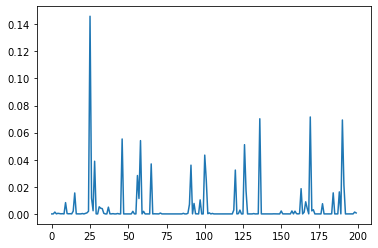

In [148]:
imp_vis = np.sum(imp_list, axis=1)/n_ex
plt.plot(imp_vis)

thres = [[0.1], [0.08], [0.06], [0.04], [0.02], [0.005], [0.0]]

thress = [[0.1],[0.09], [0.08],[0.07] ,[0.06],[0.05], [0.04],[0.03], [0.02],[0.01], [0.005], [0.0]]

for i in thress:
    fea = np.argwhere(imp_vis>i)+1
    print('Threshold:{}, and # of position:{}'.format(i,len(fea)))
    print('{}\n'.format(fea.tolist()))

### NOTE: imp_vis == imp2
### Those two are the same

0.14595873415022692,

0.07159105190938701,

0.07026885535433626,

0.06936501322488559,

0.05533283344657551,

In [149]:
#thres = [[0.1], [0.08], [0.06], [0.04], [0.02], [0.005], [0.0]]
#thres = [[0.11],[0.09],[0.07],[0.05],[0.03],[0.01],[0.0]]
# thres = [[0.13],[0.07],[0.04],[0.0]]
# thres = [[0.01], [0.06], [0.13]][::-1]
thres = [[0.06], [0.07], [0.071], [0.13]][::-1]
#th = [0.0, 0.04, 0.07, 0.13]


n_thres = len(thres)+1


thres_list = [str(item).replace('[','') for item in thres] +['-']
thres_list = [str(item).replace(']','') for item in thres_list]
thres_list = thres_list[::-1]
thres_list

['-', '0.06', '0.07', '0.071', '0.13']

In [150]:
for item in thres[::-1]:
    print(item[0])
#     print(item)

0.06
0.07
0.071
0.13


In [151]:
imp2 = imp_vis

In [152]:
len(imp2)

200

In [153]:
x_2 = column_selection(x, thres[::-1][0][0], imp2)
x_3 = column_selection(x, thres[::-1][1][0], imp2)
x_4 = column_selection(x, thres[::-1][2][0], imp2)
x_5 = column_selection(x, thres[::-1][3][0], imp2)
# x_6 = column_selection(x, thres[::-1][4][0], imp2)
# x_7 = column_selection(x, thres[::-1][5][0], imp2)
# x_8 = column_selection(x, thres[::-1][6][0], imp2)

In [154]:
print(len(x_2.columns))
print(len(x_3.columns))
print(len(x_4.columns))
print(len(x_5.columns))
# print(len(x_6.columns))
# print(len(x_7.columns))
# print(len(x_8.columns))
print('\n')
print(len(x_2.columns)/5)
print(len(x_3.columns)/5)
print(len(x_4.columns)/5)
print(len(x_5.columns)/5)

20
15
10
5


4.0
3.0
2.0
1.0


In [155]:
y

,0
0,2
1,2
2,2
3,2
4,0
...,...
1926,0
1927,0
1928,2
1929,2


In [156]:
y1

,0
0,2
1,2
2,2
3,2
4,0
...,...
1926,0
1927,0
1928,2
1929,2


In [157]:
x_2 

,125,126,127,128,129,680,681,682,683,684,845,846,847,848,849,950,951,952,953,954
0,-0.591,-1.302,-0.733,1.57,-0.146,-0.228,1.399,-4.760,0.67,-2.647,-0.384,1.652,1.330,1.045,2.064,1.538,-0.055,1.502,0.44,2.897
1,-0.591,-1.302,-0.733,1.57,-0.146,-0.228,1.399,-4.760,0.67,-2.647,-0.384,1.652,1.330,1.045,2.064,1.538,-0.055,1.502,0.44,2.897
2,-0.591,-1.302,-0.733,1.57,-0.146,-0.228,1.399,-4.760,0.67,-2.647,-0.384,1.652,1.330,1.045,2.064,1.538,-0.055,1.502,0.44,2.897
3,-0.591,-1.302,-0.733,1.57,-0.146,-0.228,1.399,-4.760,0.67,-2.647,-0.384,1.652,1.330,1.045,2.064,1.538,-0.055,1.502,0.44,2.897
4,-0.591,-1.302,-0.733,1.57,-0.146,-0.591,-1.302,-0.733,1.57,-0.146,1.357,-1.453,1.477,0.113,-0.837,1.538,-0.055,1.502,0.44,2.897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,-0.591,-1.302,-0.733,1.57,-0.146,-0.591,-1.302,-0.733,1.57,-0.146,1.357,-1.453,1.477,0.113,-0.837,1.538,-0.055,1.502,0.44,2.897
1927,-0.591,-1.302,-0.733,1.57,-0.146,-0.591,-1.302,-0.733,1.57,-0.146,1.357,-1.453,1.477,0.113,-0.837,1.538,-0.055,1.502,0.44,2.897
1928,-0.591,-1.302,-0.733,1.57,-0.146,-0.228,1.399,-4.760,0.67,-2.647,-0.384,1.652,1.330,1.045,2.064,1.538,-0.055,1.502,0.44,2.897
1929,-0.591,-1.302,-0.733,1.57,-0.146,-0.228,1.399,-4.760,0.67,-2.647,-0.384,1.652,1.330,1.045,2.064,1.538,-0.055,1.502,0.44,2.897


## Change the Test Size here ==>

In [158]:
# Test size would be 0.33, 0.5, 0.66, 0.9, 0.95
test_size = 0.33

## <== Change the Test Size here


In [159]:
def RF_multi(x,y, test_size=0.33):
    t= time.time()
    x_tr, x_te, y_tr, y_te = train_test_split(x,y,test_size=test_size)#, random_state=42)
    rf = RandomForestClassifier(random_state=42)
    rf.fit(x_tr, y_tr)
    y_pred_train = rf.predict(x_tr) # Predictions on training
    y_pred_test = rf.predict(x_te) # predictions for test
    preds = rf.predict(x_te)

    auc = roc_auc_score(y_te,rf.predict_proba(x_te), multi_class='ovr')
    acc = accuracy_score(y_te,preds)
    elapsed = time.time() - t

    target_names = ['Vaccine', 'SubClade 2', 'Subclade 3', 'Subclade 1']
    # Red: Vaccine
    # Dark Purple: Subclade 1
    # Green: Subclade 3
    # Orange: Subclade 2
    # sklearn.metrics.classification_report(y_te, preds, target_names = target_names)
    prf = precision_recall_fscore_support(y_te, preds, average = 'weighted')
    prec_avg = prf[0]
    recall_avg = prf[1]
    f1_avg = prf[2]
    #print(sklearn.metrics.classification_report(y_te, preds, target_names = target_names))

    #print(elapsed, auc, acc)
    return acc, auc, elapsed, prf[0], prf[1], prf[2]
                  
                  
def SVM_multi(x,y, test_size=0.33):
    t = time.time()
    x_tr, x_te, y_tr, y_te = train_test_split(x,y,test_size=test_size)#,random_state=42)
    clf = svm.SVC(kernel = 'linear',  probability=True)
    clf.fit(x_tr, y_tr)
    y_pred = clf.predict(x_te)
    #print("Accuracy:",metrics.accuracy_score(y_te, y_pred))
    # Model Precision: what percentage of positive tuples are labeled as such?
    #print("Precision:",metrics.precision_score(y_te, y_pred))
    # Model Recall: what percentage of positive tuples are labelled as such?
    #print("Recall:",metrics.recall_score(y_te, y_pred))

#     y_prob = clf.predict_proba(x_te)
#     y_prob = y_prob[:,1]
    
    acc = metrics.accuracy_score(y_te, y_pred)
    auc = roc_auc_score(y_te,clf.predict_proba(x_te), multi_class='ovr')
    #print("AUC: {}".format(auc))
    elapsed = time.time() - t
    prf = precision_recall_fscore_support(y_te, y_pred, average = 'weighted')
    return acc, auc, elapsed, prf[0], prf[1], prf[2]

def KNN_multi(x,y,k=5, test_size=0.33):
    t = time.time()
    x_tr, x_te, y_tr, y_te = train_test_split(x,y,test_size=test_size)#, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_tr, y_tr)
    y_pred = knn.predict(x_te)

#     y_prob = knn.predict_proba(x_te)
#     y_prob = y_prob[:,1]
    
    acc = metrics.accuracy_score(y_te, y_pred)
    auc = roc_auc_score(y_te,knn.predict_proba(x_te), multi_class='ovr')
    elapsed = time.time() - t
    prf = precision_recall_fscore_support(y_te, y_pred, average = 'weighted')

    return acc, auc, elapsed, prf[0], prf[1], prf[2]

def CNN_multi(x,y, test_size=0.33):
    t = time.time()
    x_image = np.zeros((len(x), 200, 5))
    for i in range(len(x)):
        x_image[i][:][:] = np.resize(x.values[i].tolist(),(200,5))
    
    x_train, x_test, y_train, y_test = \
    train_test_split(x_image,y,test_size = test_size, random_state = 42)

    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(200, 5)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(4, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
#     model.compile(optimizer='adam',
#                   loss='sparse_categorical_crossentropy',
#                   metrics=[tf.keras.metrics.AUC()])    
    model.fit(x_train, y_train, epochs=3)

    test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)
    y_pred = model.predict_classes(x_test)
    
#     preds = model.predict_proba(x_test)
    
    
    print('\n Accuracy:', test_acc)
    acc = test_acc
    elapsed = time.time() - t
    
    

    
    y_te = y_test
    #auc = auc_eval(y_te, preds)
    auc = roc_auc_score(y_te,model.predict_proba(x_test), multi_class='ovr')
    prf = precision_recall_fscore_support(y_te, y_pred, average = 'weighted')

    return acc, auc, elapsed, prf[0], prf[1], prf[2]

In [160]:
n_ex = 100
list_acc_aoc=np.zeros((n_ex,2*n_thres))
list_time = np.zeros((n_ex, n_thres))
list_prec_recall_fscore = np.zeros((n_ex,3*n_thres))
for i in range(n_ex):
    list_acc_aoc[i][0],list_acc_aoc[i][1], list_time[i][0], list_prec_recall_fscore[i][0], list_prec_recall_fscore[i][1], list_prec_recall_fscore[i][2] = RF_multi(x,y, test_size)
    list_acc_aoc[i][2],list_acc_aoc[i][3], list_time[i][1], list_prec_recall_fscore[i][3], list_prec_recall_fscore[i][4], list_prec_recall_fscore[i][5] = RF_multi(x_2,y, test_size)
    list_acc_aoc[i][4],list_acc_aoc[i][5], list_time[i][2], list_prec_recall_fscore[i][6], list_prec_recall_fscore[i][7], list_prec_recall_fscore[i][8] = RF_multi(x_3,y, test_size)
    list_acc_aoc[i][6],list_acc_aoc[i][7], list_time[i][3], list_prec_recall_fscore[i][9], list_prec_recall_fscore[i][10], list_prec_recall_fscore[i][11] = RF_multi(x_4,y, test_size)
    list_acc_aoc[i][8],list_acc_aoc[i][9], list_time[i][4], list_prec_recall_fscore[i][12], list_prec_recall_fscore[i][13], list_prec_recall_fscore[i][14] = RF_multi(x_5,y, test_size)
#     list_acc_aoc[i][10],list_acc_aoc[i][11], list_time[i][5] = RF_experiment(x_6,y)
#     list_acc_aoc[i][12],list_acc_aoc[i][13], list_time[i][6] = RF_experiment(x_7,y)
#     list_acc_aoc[i][14],list_acc_aoc[i][15], list_time[i][7] = RF_experiment(x_8,y)

<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are

<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are

<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are

<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are

<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are

<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are

<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are

<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are

<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are

<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are

<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are

<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are

<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are

<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are

<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are

<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are

In [161]:
list_acc_aoc_svm=np.zeros((n_ex,2*n_thres))
list_time_svm = np.zeros((n_ex,n_thres))
list_prec_recall_fscore_svm = np.zeros((n_ex,3*n_thres))


for i in range(n_ex):
    list_acc_aoc_svm[i][0],list_acc_aoc_svm[i][1], list_time_svm[i][0], list_prec_recall_fscore_svm[i][0], list_prec_recall_fscore_svm[i][1], list_prec_recall_fscore_svm[i][2] = SVM_multi(x,y, test_size)
    list_acc_aoc_svm[i][2],list_acc_aoc_svm[i][3], list_time_svm[i][1], list_prec_recall_fscore_svm[i][3], list_prec_recall_fscore_svm[i][4], list_prec_recall_fscore_svm[i][5] = SVM_multi(x_2,y, test_size)
    list_acc_aoc_svm[i][4],list_acc_aoc_svm[i][5], list_time_svm[i][2], list_prec_recall_fscore_svm[i][6], list_prec_recall_fscore_svm[i][7], list_prec_recall_fscore_svm[i][8] = SVM_multi(x_3,y, test_size)
    list_acc_aoc_svm[i][6],list_acc_aoc_svm[i][7], list_time_svm[i][3], list_prec_recall_fscore_svm[i][9], list_prec_recall_fscore_svm[i][10], list_prec_recall_fscore_svm[i][11] = SVM_multi(x_4,y, test_size)
    list_acc_aoc_svm[i][8],list_acc_aoc_svm[i][9], list_time_svm[i][4], list_prec_recall_fscore_svm[i][12], list_prec_recall_fscore_svm[i][13], list_prec_recall_fscore_svm[i][14] = SVM_multi(x_5,y, test_size)
#     list_acc_aoc_svm[i][10],list_acc_aoc_svm[i][11], list_time_svm[i][5] = SVM_experiment(x_6,y)
#     list_acc_aoc_svm[i][12],list_acc_aoc_svm[i][13], list_time_svm[i][6] = SVM_experiment(x_7,y)
#     list_acc_aoc_svm[i][14],list_acc_aoc_svm[i][15], list_time_svm[i][7] = SVM_experiment(x_8,y)
    
    

/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [162]:
list_acc_aoc_knn=np.zeros((n_ex,2*n_thres))
list_time_knn = np.zeros((n_ex,n_thres))
list_prec_recall_fscore_knn = np.zeros((n_ex,3*n_thres))



for i in range(n_ex):
    list_acc_aoc_knn[i][0],list_acc_aoc_knn[i][1], list_time_knn[i][0], list_prec_recall_fscore_knn[i][0], list_prec_recall_fscore_knn[i][1], list_prec_recall_fscore_knn[i][2] = KNN_multi(x,y)
    list_acc_aoc_knn[i][2],list_acc_aoc_knn[i][3], list_time_knn[i][1], list_prec_recall_fscore_knn[i][3], list_prec_recall_fscore_knn[i][4], list_prec_recall_fscore_knn[i][5] = KNN_multi(x_2,y)
    list_acc_aoc_knn[i][4],list_acc_aoc_knn[i][5], list_time_knn[i][2], list_prec_recall_fscore_knn[i][6], list_prec_recall_fscore_knn[i][7], list_prec_recall_fscore_knn[i][8] = KNN_multi(x_3,y)
    list_acc_aoc_knn[i][6],list_acc_aoc_knn[i][7], list_time_knn[i][3], list_prec_recall_fscore_knn[i][9], list_prec_recall_fscore_knn[i][10], list_prec_recall_fscore_knn[i][11] = KNN_multi(x_4,y)
    list_acc_aoc_knn[i][8],list_acc_aoc_knn[i][9], list_time_knn[i][4], list_prec_recall_fscore_knn[i][12], list_prec_recall_fscore_knn[i][13], list_prec_recall_fscore_knn[i][14] = KNN_multi(x_5,y)
#     list_acc_aoc_knn[i][10],list_acc_aoc_knn[i][11], list_time_knn[i][5] = KNN_experiment(x_6,y)
#     list_acc_aoc_knn[i][12],list_acc_aoc_knn[i][13], list_time_knn[i][6] = KNN_experiment(x_7,y)
#     list_acc_aoc_knn[i][14],list_acc_aoc_knn[i][15], list_time_knn[i][7] = KNN_experiment(x_8,y)


<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and

<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and

<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and

<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and

<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and

<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and

<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and

<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and

<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and

<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and

<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and

<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and

<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and

<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and

<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and

<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
<ipython-input-159-861cf9c370c2>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr, y_tr)
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and

In [163]:
y = y1.copy()

list_acc_aoc_cnn=np.zeros((n_ex,2*n_thres))
list_time_cnn = np.zeros((n_ex,n_thres))
list_prec_recall_fscore_cnn = np.zeros((n_ex,3*n_thres))


for i in range(n_ex):
    list_acc_aoc_cnn[i][0],list_acc_aoc_cnn[i][1], list_time_cnn[i][0], list_prec_recall_fscore_cnn[i][0], list_prec_recall_fscore_cnn[i][1], list_prec_recall_fscore_cnn[i][2] = CNN_multi(x,y, test_size)
    list_acc_aoc_cnn[i][2],list_acc_aoc_cnn[i][3], list_time_cnn[i][1], list_prec_recall_fscore_cnn[i][3], list_prec_recall_fscore_cnn[i][4], list_prec_recall_fscore_cnn[i][5] = CNN_multi(x_2,y, test_size)
    list_acc_aoc_cnn[i][4],list_acc_aoc_cnn[i][5], list_time_cnn[i][2], list_prec_recall_fscore_cnn[i][6], list_prec_recall_fscore_cnn[i][7], list_prec_recall_fscore_cnn[i][8] = CNN_multi(x_3,y, test_size)
    list_acc_aoc_cnn[i][6],list_acc_aoc_cnn[i][7], list_time_cnn[i][3], list_prec_recall_fscore_cnn[i][9], list_prec_recall_fscore_cnn[i][10], list_prec_recall_fscore_cnn[i][11] = CNN_multi(x_4,y, test_size)
    list_acc_aoc_cnn[i][8],list_acc_aoc_cnn[i][9], list_time_cnn[i][4], list_prec_recall_fscore_cnn[i][12], list_prec_recall_fscore_cnn[i][13], list_prec_recall_fscore_cnn[i][14] = CNN_multi(x_5,y, test_size)
#     list_acc_aoc_cnn[i][10],list_acc_aoc_cnn[i][11], list_time_cnn[i][5] = CNN_experiment(x_6,y)
#     list_acc_aoc_cnn[i][12],list_acc_aoc_cnn[i][13], list_time_cnn[i][6] = CNN_experiment(x_7,y)
#     list_acc_aoc_cnn[i][14],list_acc_aoc_cnn[i][15], list_time_cnn[i][7] = CNN_experiment(x_8,y)
    

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.6603 - accuracy: 0.7678
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0481 - accuracy: 0.9883
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0278 - accuracy: 0.9906
20/20 - 0s - loss: 0.0230 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3664 - accuracy: 0.8656
Epoch 2/3
41/41 [==============================] - 0s 891us/step - loss: 0.0222 - accuracy: 0.9925
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0322 - accuracy: 0.9929
20/20 - 0s - loss: 0.0073 - accuracy: 0.9969

 Accuracy: 0.9968652129173279


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 1.2569 - accuracy: 0.8126
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0384 - accuracy: 0.9868
Epoch 3/3
41/41 [==============================] - 0s 851us/step - loss: 0.0235 - accuracy: 0.9923
20/20 - 0s - loss: 0.0135 - accuracy: 0.9906

 Accuracy: 0.9905956387519836


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.2973 - accuracy: 0.8507
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0593 - accuracy: 0.9873
Epoch 3/3
41/41 [==============================] - 0s 998us/step - loss: 0.0443 - accuracy: 0.9912
20/20 - 0s - loss: 0.1103 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.7877 - accuracy: 0.7707
Epoch 2/3
41/41 [==============================] - 0s 966us/step - loss: 0.4138 - accuracy: 0.8612
Epoch 3/3
41/41 [==============================] - 0s 970us/step - loss: 0.4529 - accuracy: 0.8409
20/20 - 0s - loss: 0.4077 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.9691 - accuracy: 0.7418
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0609 - accuracy: 0.9830
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0238 - accuracy: 0.9953
20/20 - 0s - loss: 0.0242 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3270 - accuracy: 0.9088
Epoch 2/3
41/41 [==============================] - 0s 953us/step - loss: 0.0372 - accuracy: 0.9920
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0302 - accuracy: 0.9912
20/20 - 0s - loss: 0.0067 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.5254 - accuracy: 0.8634
Epoch 2/3
41/41 [==============================] - 0s 992us/step - loss: 0.0293 - accuracy: 0.9905
Epoch 3/3
41/41 [==============================] - 0s 877us/step - loss: 0.0353 - accuracy: 0.9857
20/20 - 0s - loss: 0.0181 - accuracy: 0.9890

 Accuracy: 0.9890282154083252


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.2380 - accuracy: 0.9363
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0659 - accuracy: 0.9862
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0443 - accuracy: 0.9910
20/20 - 0s - loss: 0.0796 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.6666 - accuracy: 0.7934
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4000 - accuracy: 0.8734
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4253 - accuracy: 0.8425
20/20 - 0s - loss: 0.4126 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 1.0200 - accuracy: 0.7818
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0621 - accuracy: 0.9848
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0283 - accuracy: 0.9949
20/20 - 0s - loss: 0.0191 - accuracy: 0.9922

 Accuracy: 0.9921630024909973
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 1ms/step - loss: 0.4881 - accuracy: 0.8592
Epoch 2/3
41/41 [==============================] - 0s 945us/step - loss: 0.0342 - accuracy: 0.9923
Epoch 3/3
41/41 [==============================] - 0s 928us/step - loss: 0.0457 - accuracy: 0.9870
20/20 - 0s - loss: 0.0079 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 1ms/step - loss: 0.3153 - accuracy: 0.8451
Epoch 2/3
41/41 [==============================] - 0s 981us/step - loss: 0.0469 - accuracy: 0.9874
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 0.9945
20/20 - 0s - loss: 0.0461 - accuracy: 0.9906

 Accuracy: 0.9905956387519836


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3890 - accuracy: 0.8903
Epoch 2/3
41/41 [==============================] - 0s 948us/step - loss: 0.0511 - accuracy: 0.9917
Epoch 3/3
41/41 [==============================] - 0s 968us/step - loss: 0.0516 - accuracy: 0.9885
20/20 - 0s - loss: 0.0605 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.8158 - accuracy: 0.7475
Epoch 2/3
41/41 [==============================] - 0s 841us/step - loss: 0.4215 - accuracy: 0.8475
Epoch 3/3
41/41 [==============================] - 0s 982us/step - loss: 0.4544 - accuracy: 0.8461
20/20 - 0s - loss: 0.4095 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.5356 - accuracy: 0.8687
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9874
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 0.9946
20/20 - 0s - loss: 0.0440 - accuracy: 0.9843

 Accuracy: 0.9843260049819946
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 942us/step - loss: 0.3350 - accuracy: 0.8866
Epoch 2/3
41/41 [==============================] - 0s 959us/step - loss: 0.0281 - accuracy: 0.9899
Epoch 3/3
41/41 [==============================] - 0s 965us/step - loss: 0.0641 - accuracy: 0.9860
20/20 - 0s - loss: 0.0142 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.2915 - accuracy: 0.9283
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9902
Epoch 3/3
41/41 [==============================] - 0s 971us/step - loss: 0.0222 - accuracy: 0.9903
20/20 - 0s - loss: 0.0127 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.2858 - accuracy: 0.9240
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0727 - accuracy: 0.9820
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9934
20/20 - 0s - loss: 0.0709 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 3s 986us/step - loss: 0.7508 - accuracy: 0.7559
Epoch 2/3
41/41 [==============================] - 0s 963us/step - loss: 0.4462 - accuracy: 0.8349
Epoch 3/3
41/41 [==============================] - 0s 994us/step - loss: 0.4272 - accuracy: 0.8617
20/20 - 0s - loss: 0.4182 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 990us/step - loss: 0.9781 - accuracy: 0.7873
Epoch 2/3
41/41 [==============================] - 0s 944us/step - loss: 0.0612 - accuracy: 0.9855
Epoch 3/3
41/41 [==============================] - 0s 854us/step - loss: 0.0291 - accuracy: 0.9941
20/20 - 0s - loss: 0.0274 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 895us/step - loss: 0.6683 - accuracy: 0.8817
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0749 - accuracy: 0.9833
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0224 - accuracy: 0.9902
20/20 - 0s - loss: 0.0087 - accuracy: 0.9969

 Accuracy: 0.9968652129173279


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 963us/step - loss: 0.5036 - accuracy: 0.8721
Epoch 2/3
41/41 [==============================] - 0s 863us/step - loss: 0.0259 - accuracy: 0.9940
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0185 - accuracy: 0.9910
20/20 - 0s - loss: 0.0058 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 887us/step - loss: 0.4258 - accuracy: 0.8319
Epoch 2/3
41/41 [==============================] - 0s 874us/step - loss: 0.0612 - accuracy: 0.9892
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9912
20/20 - 0s - loss: 0.0752 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 869us/step - loss: 0.9216 - accuracy: 0.7183
Epoch 2/3
41/41 [==============================] - 0s 934us/step - loss: 0.4286 - accuracy: 0.8575
Epoch 3/3
41/41 [==============================] - 0s 834us/step - loss: 0.4307 - accuracy: 0.8613
20/20 - 0s - loss: 0.4151 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 889us/step - loss: 0.8855 - accuracy: 0.7666
Epoch 2/3
41/41 [==============================] - 0s 916us/step - loss: 0.0522 - accuracy: 0.9909
Epoch 3/3
41/41 [==============================] - 0s 881us/step - loss: 0.0294 - accuracy: 0.9939
20/20 - 0s - loss: 0.0301 - accuracy: 0.9953

 Accuracy: 0.9952977895736694
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 809us/step - loss: 0.4971 - accuracy: 0.8715
Epoch 2/3
41/41 [==============================] - 0s 893us/step - loss: 0.0218 - accuracy: 0.9918
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0266 - accuracy: 0.9947
20/20 - 0s - loss: 0.0083 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 957us/step - loss: 0.7192 - accuracy: 0.8630
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9866
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0213 - accuracy: 0.9925
20/20 - 0s - loss: 0.0092 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 866us/step - loss: 0.4822 - accuracy: 0.8450
Epoch 2/3
41/41 [==============================] - 0s 907us/step - loss: 0.0656 - accuracy: 0.9858
Epoch 3/3
41/41 [==============================] - 0s 936us/step - loss: 0.0573 - accuracy: 0.9910
20/20 - 0s - loss: 0.0446 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 861us/step - loss: 0.7518 - accuracy: 0.7555
Epoch 2/3
41/41 [==============================] - 0s 931us/step - loss: 0.5002 - accuracy: 0.8237
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3759 - accuracy: 0.8672
20/20 - 0s - loss: 0.4134 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 939us/step - loss: 0.6543 - accuracy: 0.8222
Epoch 2/3
41/41 [==============================] - 0s 880us/step - loss: 0.0532 - accuracy: 0.9834
Epoch 3/3
41/41 [==============================] - 0s 952us/step - loss: 0.0202 - accuracy: 0.9958
20/20 - 0s - loss: 0.0164 - accuracy: 0.9953

 Accuracy: 0.9952977895736694
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 926us/step - loss: 0.1970 - accuracy: 0.9491
Epoch 2/3
41/41 [==============================] - 0s 995us/step - loss: 0.0286 - accuracy: 0.9925
Epoch 3/3
41/41 [==============================] - 0s 970us/step - loss: 0.0288 - accuracy: 0.9931
20/20 - 0s - loss: 0.0505 - accuracy: 0.9906

 Accuracy: 0.9905956387519836
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 882us/step - loss: 0.3984 - accuracy: 0.8497
Epoch 2/3
41/41 [==============================] - 0s 986us/step - loss: 0.0197 - accuracy: 0.9938
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0099 - accuracy: 0.9966
20/20 - 0s - loss: 0.0118 - accuracy: 0.9906

 Accuracy: 0.9905956387519836


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3682 - accuracy: 0.9117
Epoch 2/3
41/41 [==============================] - 0s 936us/step - loss: 0.0568 - accuracy: 0.9875
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0547 - accuracy: 0.9942
20/20 - 0s - loss: 0.0953 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 920us/step - loss: 0.7547 - accuracy: 0.7878
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4477 - accuracy: 0.8580
Epoch 3/3
41/41 [==============================] - 0s 991us/step - loss: 0.4850 - accuracy: 0.8499
20/20 - 0s - loss: 0.6344 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 962us/step - loss: 0.7428 - accuracy: 0.8025
Epoch 2/3
41/41 [==============================] - 0s 977us/step - loss: 0.0663 - accuracy: 0.9861
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0259 - accuracy: 0.9963
20/20 - 0s - loss: 0.0222 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.6331 - accuracy: 0.8545
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0337 - accuracy: 0.9899
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 0.9927
20/20 - 0s - loss: 0.0130 - accuracy: 0.9969

 Accuracy: 0.9968652129173279


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4396 - accuracy: 0.8347
Epoch 2/3
41/41 [==============================] - 0s 936us/step - loss: 0.0305 - accuracy: 0.9936
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0496 - accuracy: 0.9887
20/20 - 0s - loss: 0.0062 - accuracy: 0.9969

 Accuracy: 0.9968652129173279


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 895us/step - loss: 0.5043 - accuracy: 0.8319
Epoch 2/3
41/41 [==============================] - 0s 992us/step - loss: 0.0256 - accuracy: 0.9947
Epoch 3/3
41/41 [==============================] - 0s 952us/step - loss: 0.0662 - accuracy: 0.9887
20/20 - 0s - loss: 0.0500 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 897us/step - loss: 0.9613 - accuracy: 0.7177
Epoch 2/3
41/41 [==============================] - 0s 886us/step - loss: 0.4342 - accuracy: 0.8374
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4112 - accuracy: 0.8616
20/20 - 0s - loss: 0.4021 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.9598 - accuracy: 0.7802
Epoch 2/3
41/41 [==============================] - 0s 959us/step - loss: 0.0392 - accuracy: 0.9932
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0222 - accuracy: 0.9954
20/20 - 0s - loss: 0.0199 - accuracy: 0.9953

 Accuracy: 0.9952977895736694
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 1ms/step - loss: 0.4830 - accuracy: 0.8469
Epoch 2/3
41/41 [==============================] - 0s 900us/step - loss: 0.0269 - accuracy: 0.9926
Epoch 3/3
41/41 [==============================] - 0s 941us/step - loss: 0.0276 - accuracy: 0.9911
20/20 - 0s - loss: 0.0067 - accuracy: 0.9969

 Accuracy: 0.9968652129173279


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 862us/step - loss: 0.2552 - accuracy: 0.9188
Epoch 2/3
41/41 [==============================] - 0s 869us/step - loss: 0.0354 - accuracy: 0.9875
Epoch 3/3
41/41 [==============================] - 0s 993us/step - loss: 0.0182 - accuracy: 0.9942
20/20 - 0s - loss: 0.0111 - accuracy: 0.9906

 Accuracy: 0.9905956387519836


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 925us/step - loss: 0.3849 - accuracy: 0.8552
Epoch 2/3
41/41 [==============================] - 0s 924us/step - loss: 0.0674 - accuracy: 0.9867
Epoch 3/3
41/41 [==============================] - 0s 900us/step - loss: 0.0526 - accuracy: 0.9911
20/20 - 0s - loss: 0.0568 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1000us/step - loss: 0.7726 - accuracy: 0.7175
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 0.8461
Epoch 3/3
41/41 [==============================] - 0s 962us/step - loss: 0.4643 - accuracy: 0.8329
20/20 - 0s - loss: 0.4757 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 957us/step - loss: 0.7441 - accuracy: 0.7963
Epoch 2/3
41/41 [==============================] - 0s 919us/step - loss: 0.0252 - accuracy: 0.9963
Epoch 3/3
41/41 [==============================] - 0s 918us/step - loss: 0.0136 - accuracy: 0.9982
20/20 - 0s - loss: 0.0152 - accuracy: 0.9937

 Accuracy: 0.9937304258346558


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.9162
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0260 - accuracy: 0.9912
Epoch 3/3
41/41 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 0.9893
20/20 - 0s - loss: 0.0183 - accuracy: 0.9953

 Accuracy: 0.9952977895736694


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.5421 - accuracy: 0.8429
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0377 - accuracy: 0.9892
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0162 - accuracy: 0.9945
20/20 - 0s - loss: 0.0090 - accuracy: 0.9969

 Accuracy: 0.9968652129173279


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4644 - accuracy: 0.8446
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0738 - accuracy: 0.9826
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0355 - accuracy: 0.9896
20/20 - 0s - loss: 0.0765 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.6604 - accuracy: 0.7407
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4925 - accuracy: 0.8451
Epoch 3/3
41/41 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.8245
20/20 - 0s - loss: 0.4163 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.7233 - accuracy: 0.7894
Epoch 2/3
41/41 [==============================] - 0s 996us/step - loss: 0.0302 - accuracy: 0.9954
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0255 - accuracy: 0.9938
20/20 - 0s - loss: 0.0168 - accuracy: 0.9953

 Accuracy: 0.9952977895736694
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 969us/step - loss: 0.5217 - accuracy: 0.8475
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0454 - accuracy: 0.9810
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0307 - accuracy: 0.9936
20/20 - 0s - loss: 0.0115 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 1ms/step - loss: 0.2781 - accuracy: 0.9341
Epoch 2/3
41/41 [==============================] - 0s 957us/step - loss: 0.0387 - accuracy: 0.9898
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0384 - accuracy: 0.9927
20/20 - 0s - loss: 0.0394 - accuracy: 0.9890

 Accuracy: 0.9890282154083252


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 963us/step - loss: 0.5935 - accuracy: 0.8190
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0697 - accuracy: 0.9817
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0315 - accuracy: 0.9942
20/20 - 0s - loss: 0.0697 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 995us/step - loss: 0.7200 - accuracy: 0.8171
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4507 - accuracy: 0.8342
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4442 - accuracy: 0.8429
20/20 - 0s - loss: 0.5208 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 938us/step - loss: 0.6972 - accuracy: 0.8011
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0492 - accuracy: 0.9844
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0246 - accuracy: 0.9962
20/20 - 0s - loss: 0.0162 - accuracy: 0.9937

 Accuracy: 0.9937304258346558


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3762 - accuracy: 0.8776
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0153 - accuracy: 0.9952
Epoch 3/3
41/41 [==============================] - 0s 926us/step - loss: 0.0351 - accuracy: 0.9915
20/20 - 0s - loss: 0.0274 - accuracy: 0.9890

 Accuracy: 0.9890282154083252


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4811 - accuracy: 0.8556
Epoch 2/3
41/41 [==============================] - 0s 943us/step - loss: 0.0316 - accuracy: 0.9911
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0256 - accuracy: 0.9897
20/20 - 0s - loss: 0.0076 - accuracy: 0.9969

 Accuracy: 0.9968652129173279


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.2949 - accuracy: 0.8604
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0844 - accuracy: 0.9851
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0449 - accuracy: 0.9857
20/20 - 0s - loss: 0.0671 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.7701 - accuracy: 0.7596
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4151 - accuracy: 0.8548
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3953 - accuracy: 0.8630
20/20 - 0s - loss: 0.4668 - accuracy: 0.7524

 Accuracy: 0.7523511052131653


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 968us/step - loss: 1.0291 - accuracy: 0.7273
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.9868
Epoch 3/3
41/41 [==============================] - 0s 948us/step - loss: 0.0252 - accuracy: 0.9961
20/20 - 0s - loss: 0.0212 - accuracy: 0.9922

 Accuracy: 0.9921630024909973
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 1ms/step - loss: 0.2982 - accuracy: 0.8724
Epoch 2/3
41/41 [==============================] - 0s 994us/step - loss: 0.0421 - accuracy: 0.9920
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.9940
20/20 - 0s - loss: 0.0133 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 971us/step - loss: 0.5536 - accuracy: 0.8656
Epoch 2/3
41/41 [==============================] - 0s 935us/step - loss: 0.0407 - accuracy: 0.9893
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0390 - accuracy: 0.9871
20/20 - 0s - loss: 0.0189 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 999us/step - loss: 0.4917 - accuracy: 0.8594
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0885 - accuracy: 0.9840
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0335 - accuracy: 0.9945
20/20 - 0s - loss: 0.0645 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 970us/step - loss: 0.6412 - accuracy: 0.7528
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.8438
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8426
20/20 - 0s - loss: 0.4180 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.5710 - accuracy: 0.8145
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9896
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 0.9912
20/20 - 0s - loss: 0.0136 - accuracy: 0.9937

 Accuracy: 0.9937304258346558


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.5585 - accuracy: 0.8404
Epoch 2/3
41/41 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9910
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0286 - accuracy: 0.9909
20/20 - 0s - loss: 0.0324 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3830 - accuracy: 0.8565
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0278 - accuracy: 0.9906
Epoch 3/3
41/41 [==============================] - 0s 989us/step - loss: 0.0218 - accuracy: 0.9949
20/20 - 0s - loss: 0.0054 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.2501 - accuracy: 0.9034
Epoch 2/3
41/41 [==============================] - 0s 993us/step - loss: 0.0757 - accuracy: 0.9853
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0360 - accuracy: 0.9939
20/20 - 0s - loss: 0.0781 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 956us/step - loss: 0.8063 - accuracy: 0.7247
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4253 - accuracy: 0.8432
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.5093 - accuracy: 0.8119
20/20 - 0s - loss: 0.4296 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.8642 - accuracy: 0.8112
Epoch 2/3
41/41 [==============================] - 0s 983us/step - loss: 0.0415 - accuracy: 0.9928
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0199 - accuracy: 0.9959
20/20 - 0s - loss: 0.0174 - accuracy: 0.9937

 Accuracy: 0.9937304258346558


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3161 - accuracy: 0.8883
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9928
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0248 - accuracy: 0.9916
20/20 - 0s - loss: 0.0062 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4030 - accuracy: 0.8985
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0194 - accuracy: 0.9924
Epoch 3/3
41/41 [==============================] - 0s 961us/step - loss: 0.0344 - accuracy: 0.9929
20/20 - 0s - loss: 0.0118 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4959 - accuracy: 0.8421
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0581 - accuracy: 0.9913
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 0.9942
20/20 - 0s - loss: 0.0513 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 1.0883 - accuracy: 0.7407
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.8399
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3958 - accuracy: 0.8481
20/20 - 0s - loss: 0.4619 - accuracy: 0.7524

 Accuracy: 0.7523511052131653


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 975us/step - loss: 1.0262 - accuracy: 0.7414
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0417 - accuracy: 0.9873
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0202 - accuracy: 0.9961
20/20 - 0s - loss: 0.0237 - accuracy: 0.9953

 Accuracy: 0.9952977895736694


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3256 - accuracy: 0.8942
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0324 - accuracy: 0.9914
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0380 - accuracy: 0.9845
20/20 - 0s - loss: 0.0161 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.5617 - accuracy: 0.8248
Epoch 2/3
41/41 [==============================] - 0s 979us/step - loss: 0.0272 - accuracy: 0.9884
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0316 - accuracy: 0.9912
20/20 - 0s - loss: 0.0120 - accuracy: 0.9969

 Accuracy: 0.9968652129173279


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4288 - accuracy: 0.8296
Epoch 2/3
41/41 [==============================] - 0s 993us/step - loss: 0.0453 - accuracy: 0.9915
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0245 - accuracy: 0.9949
20/20 - 0s - loss: 0.0729 - accuracy: 0.9796

 Accuracy: 0.9796238541603088


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.9198 - accuracy: 0.7384
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4385 - accuracy: 0.8511
Epoch 3/3
41/41 [==============================] - 0s 977us/step - loss: 0.4456 - accuracy: 0.8476
20/20 - 0s - loss: 0.3974 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.6709 - accuracy: 0.7911
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0729 - accuracy: 0.9758
Epoch 3/3
41/41 [==============================] - 0s 960us/step - loss: 0.0246 - accuracy: 0.9907
20/20 - 0s - loss: 0.0205 - accuracy: 1.0000

 Accuracy: 1.0


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.5858 - accuracy: 0.8442
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 0.9941
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0161 - accuracy: 0.9942
20/20 - 0s - loss: 0.0120 - accuracy: 0.9969

 Accuracy: 0.9968652129173279


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 952us/step - loss: 0.5583 - accuracy: 0.8489
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 0.9949
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 0.9933
20/20 - 0s - loss: 0.0146 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4666 - accuracy: 0.8478
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0431 - accuracy: 0.9924
Epoch 3/3
41/41 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9908
20/20 - 0s - loss: 0.0691 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 988us/step - loss: 0.6121 - accuracy: 0.7675
Epoch 2/3
41/41 [==============================] - 0s 983us/step - loss: 0.4667 - accuracy: 0.8600
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4974 - accuracy: 0.8460
20/20 - 0s - loss: 0.4707 - accuracy: 0.7524

 Accuracy: 0.7523511052131653


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 1.2661 - accuracy: 0.7403
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0633 - accuracy: 0.9847
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9945
20/20 - 0s - loss: 0.0287 - accuracy: 0.9937

 Accuracy: 0.9937304258346558


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.5759 - accuracy: 0.8497
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0396 - accuracy: 0.9828
Epoch 3/3
41/41 [==============================] - 0s 981us/step - loss: 0.0163 - accuracy: 0.9932
20/20 - 0s - loss: 0.0106 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 979us/step - loss: 0.5886 - accuracy: 0.8335
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0320 - accuracy: 0.9903
Epoch 3/3
41/41 [==============================] - 0s 992us/step - loss: 0.0135 - accuracy: 0.9963
20/20 - 0s - loss: 0.0099 - accuracy: 0.9969

 Accuracy: 0.9968652129173279


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.2869 - accuracy: 0.9264
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0654 - accuracy: 0.9873
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0470 - accuracy: 0.9887
20/20 - 0s - loss: 0.0920 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.6233 - accuracy: 0.8415
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4673 - accuracy: 0.8482
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.5652 - accuracy: 0.8278
20/20 - 0s - loss: 0.4501 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 1.1435 - accuracy: 0.7201
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0585 - accuracy: 0.9876
Epoch 3/3
41/41 [==============================] - 0s 989us/step - loss: 0.0304 - accuracy: 0.9945
20/20 - 0s - loss: 0.0283 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4638 - accuracy: 0.8434
Epoch 2/3
41/41 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9942
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0567 - accuracy: 0.9863
20/20 - 0s - loss: 0.0138 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 947us/step - loss: 0.4048 - accuracy: 0.8496
Epoch 2/3
41/41 [==============================] - 0s 928us/step - loss: 0.0333 - accuracy: 0.9914
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0467 - accuracy: 0.9914
20/20 - 0s - loss: 0.0148 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 960us/step - loss: 0.2716 - accuracy: 0.9278
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0490 - accuracy: 0.9916
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0302 - accuracy: 0.9956
20/20 - 0s - loss: 0.0915 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 965us/step - loss: 0.5642 - accuracy: 0.8156
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.6118 - accuracy: 0.8211
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4002 - accuracy: 0.8562
20/20 - 0s - loss: 0.4291 - accuracy: 0.7524

 Accuracy: 0.7523511052131653


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 963us/step - loss: 0.7398 - accuracy: 0.8084
Epoch 2/3
41/41 [==============================] - 0s 964us/step - loss: 0.0484 - accuracy: 0.9835
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 0.9980
20/20 - 0s - loss: 0.0461 - accuracy: 0.9828

 Accuracy: 0.982758641242981


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3352 - accuracy: 0.8591
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0228 - accuracy: 0.9910
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0147 - accuracy: 0.9963
20/20 - 0s - loss: 0.0196 - accuracy: 0.9890

 Accuracy: 0.9890282154083252


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3696 - accuracy: 0.8334
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0341 - accuracy: 0.9885
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0256 - accuracy: 0.9926
20/20 - 0s - loss: 0.0126 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 981us/step - loss: 0.3175 - accuracy: 0.9066
Epoch 2/3
41/41 [==============================] - 0s 981us/step - loss: 0.0540 - accuracy: 0.9905
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0775 - accuracy: 0.9868
20/20 - 0s - loss: 0.0781 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.6277 - accuracy: 0.7659
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4711 - accuracy: 0.8474
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.8593
20/20 - 0s - loss: 0.5014 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.8222 - accuracy: 0.7667
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0444 - accuracy: 0.9898
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0243 - accuracy: 0.9948
20/20 - 0s - loss: 0.0194 - accuracy: 0.9937

 Accuracy: 0.9937304258346558


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.8630
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0388 - accuracy: 0.9887
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0336 - accuracy: 0.9872
20/20 - 0s - loss: 0.0204 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3689 - accuracy: 0.9182
Epoch 2/3
41/41 [==============================] - 0s 985us/step - loss: 0.0165 - accuracy: 0.9934
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 0.9942
20/20 - 0s - loss: 0.0073 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.2573 - accuracy: 0.9389
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0326 - accuracy: 0.9921
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0446 - accuracy: 0.9909
20/20 - 0s - loss: 0.0601 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 921us/step - loss: 1.0948 - accuracy: 0.7900
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4112 - accuracy: 0.8647
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4143 - accuracy: 0.8675
20/20 - 0s - loss: 0.4418 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.9937 - accuracy: 0.7467
Epoch 2/3
41/41 [==============================] - 0s 971us/step - loss: 0.0587 - accuracy: 0.9779
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0248 - accuracy: 0.9932
20/20 - 0s - loss: 0.0214 - accuracy: 0.9937

 Accuracy: 0.9937304258346558


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 997us/step - loss: 0.1959 - accuracy: 0.9349
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0424 - accuracy: 0.9860
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0110 - accuracy: 0.9957
20/20 - 0s - loss: 0.0696 - accuracy: 0.9890

 Accuracy: 0.9890282154083252


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4981 - accuracy: 0.8989
Epoch 2/3
41/41 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9899
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 0.9928
20/20 - 0s - loss: 0.0136 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4220 - accuracy: 0.8423
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0579 - accuracy: 0.9865
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0741 - accuracy: 0.9879
20/20 - 0s - loss: 0.0653 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 1.0464 - accuracy: 0.7648
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3924 - accuracy: 0.8634
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4242 - accuracy: 0.8545
20/20 - 0s - loss: 0.6656 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 976us/step - loss: 0.6450 - accuracy: 0.8174
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0248 - accuracy: 0.9961
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0129 - accuracy: 0.9974
20/20 - 1s - loss: 0.0162 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 965us/step - loss: 0.3418 - accuracy: 0.9180
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 0.9936
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0654 - accuracy: 0.9781
20/20 - 0s - loss: 0.0189 - accuracy: 0.9969

 Accuracy: 0.9968652129173279


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.2760 - accuracy: 0.9323
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 0.9937
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0161 - accuracy: 0.9928
20/20 - 0s - loss: 0.0152 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 926us/step - loss: 0.4043 - accuracy: 0.8309
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0649 - accuracy: 0.9909
Epoch 3/3
41/41 [==============================] - 0s 979us/step - loss: 0.0585 - accuracy: 0.9904
20/20 - 0s - loss: 0.0550 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 959us/step - loss: 0.7149 - accuracy: 0.7394
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4458 - accuracy: 0.8589
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4884 - accuracy: 0.8467
20/20 - 0s - loss: 0.4691 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.8373 - accuracy: 0.7816
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0559 - accuracy: 0.9855
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0254 - accuracy: 0.9960
20/20 - 0s - loss: 0.0314 - accuracy: 0.9953

 Accuracy: 0.9952977895736694
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 1ms/step - loss: 0.4052 - accuracy: 0.8617
Epoch 2/3
41/41 [==============================] - 0s 972us/step - loss: 0.0255 - accuracy: 0.9914
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0531 - accuracy: 0.9853
20/20 - 0s - loss: 0.0072 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.5358 - accuracy: 0.8475
Epoch 2/3
41/41 [==============================] - 0s 992us/step - loss: 0.0632 - accuracy: 0.9836
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0216 - accuracy: 0.9905
20/20 - 0s - loss: 0.0194 - accuracy: 0.9906

 Accuracy: 0.9905956387519836


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.6316 - accuracy: 0.8837
Epoch 2/3
41/41 [==============================] - 0s 946us/step - loss: 0.0330 - accuracy: 0.9911
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.9879
20/20 - 0s - loss: 0.0570 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 923us/step - loss: 0.8637 - accuracy: 0.7646
Epoch 2/3
41/41 [==============================] - 0s 981us/step - loss: 0.4366 - accuracy: 0.8370
Epoch 3/3
41/41 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.8282
20/20 - 0s - loss: 0.4449 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.6708 - accuracy: 0.8035
Epoch 2/3
41/41 [==============================] - 0s 980us/step - loss: 0.0296 - accuracy: 0.9950
Epoch 3/3
41/41 [==============================] - 0s 967us/step - loss: 0.0152 - accuracy: 0.9969
20/20 - 0s - loss: 0.0132 - accuracy: 0.9969

 Accuracy: 0.9968652129173279


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 973us/step - loss: 0.4641 - accuracy: 0.8532
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0357 - accuracy: 0.9835
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0121 - accuracy: 0.9974
20/20 - 0s - loss: 0.0154 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 899us/step - loss: 0.4139 - accuracy: 0.8310
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.9917
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0184 - accuracy: 0.9946
20/20 - 0s - loss: 0.0081 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 996us/step - loss: 0.6067 - accuracy: 0.8350
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0611 - accuracy: 0.9914
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0570 - accuracy: 0.9843
20/20 - 0s - loss: 0.0676 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 973us/step - loss: 0.8121 - accuracy: 0.7397
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3926 - accuracy: 0.8567
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4350 - accuracy: 0.8384
20/20 - 0s - loss: 0.4366 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.8727 - accuracy: 0.7584
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0354 - accuracy: 0.9932
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0199 - accuracy: 0.9960
20/20 - 0s - loss: 0.0235 - accuracy: 0.9969

 Accuracy: 0.9968652129173279


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 946us/step - loss: 0.5218 - accuracy: 0.8766
Epoch 2/3
41/41 [==============================] - 0s 997us/step - loss: 0.0211 - accuracy: 0.9923
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0204 - accuracy: 0.9952
20/20 - 0s - loss: 0.0122 - accuracy: 0.9953

 Accuracy: 0.9952977895736694


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 939us/step - loss: 0.3910 - accuracy: 0.8745
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0349 - accuracy: 0.9846
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0235 - accuracy: 0.9946
20/20 - 0s - loss: 0.0114 - accuracy: 0.9969

 Accuracy: 0.9968652129173279


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 958us/step - loss: 0.3467 - accuracy: 0.9217
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0602 - accuracy: 0.9872
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0367 - accuracy: 0.9894
20/20 - 0s - loss: 0.0607 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 967us/step - loss: 0.8553 - accuracy: 0.7358
Epoch 2/3
41/41 [==============================] - 0s 933us/step - loss: 0.4231 - accuracy: 0.8500
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.5259 - accuracy: 0.8316
20/20 - 0s - loss: 0.4218 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 1.1626 - accuracy: 0.7813
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0653 - accuracy: 0.9838
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0382 - accuracy: 0.9906
20/20 - 0s - loss: 0.0175 - accuracy: 0.9953

 Accuracy: 0.9952977895736694


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 945us/step - loss: 0.4287 - accuracy: 0.8538
Epoch 2/3
41/41 [==============================] - 0s 996us/step - loss: 0.0167 - accuracy: 0.9964
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0272 - accuracy: 0.9903
20/20 - 0s - loss: 0.0083 - accuracy: 0.9969

 Accuracy: 0.9968652129173279


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 2ms/step - loss: 0.5888 - accuracy: 0.8545
Epoch 2/3
41/41 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9901
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0415 - accuracy: 0.9908
20/20 - 0s - loss: 0.0251 - accuracy: 0.9906

 Accuracy: 0.9905956387519836


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 929us/step - loss: 0.7035 - accuracy: 0.8093
Epoch 2/3
41/41 [==============================] - 0s 979us/step - loss: 0.0700 - accuracy: 0.9910
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9913
20/20 - 0s - loss: 0.0603 - accuracy: 0.9843

 Accuracy: 0.9843260049819946


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 989us/step - loss: 0.7081 - accuracy: 0.7458
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.5385 - accuracy: 0.8212
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3853 - accuracy: 0.8475
20/20 - 0s - loss: 0.4133 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.5485 - accuracy: 0.8484
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0469 - accuracy: 0.9878
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9904
20/20 - 0s - loss: 0.0156 - accuracy: 0.9953

 Accuracy: 0.9952977895736694


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.5818 - accuracy: 0.8301
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 0.9842
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0261 - accuracy: 0.9898
20/20 - 0s - loss: 0.0106 - accuracy: 0.9953

 Accuracy: 0.9952977895736694


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.5366 - accuracy: 0.8653
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9768
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0199 - accuracy: 0.9912
20/20 - 0s - loss: 0.0117 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 997us/step - loss: 0.3228 - accuracy: 0.8460
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0542 - accuracy: 0.9814
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0987 - accuracy: 0.9850
20/20 - 0s - loss: 0.0519 - accuracy: 0.9906

 Accuracy: 0.9905956387519836


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1000us/step - loss: 0.8419 - accuracy: 0.7384
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4828 - accuracy: 0.8391
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.8663
20/20 - 0s - loss: 0.4727 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4509 - accuracy: 0.9092
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0411 - accuracy: 0.9851
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0157 - accuracy: 0.9949
20/20 - 0s - loss: 0.0106 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3

/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '



41/41 [==============================] - 1s 976us/step - loss: 0.5824 - accuracy: 0.8518
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0176 - accuracy: 0.9943
Epoch 3/3
41/41 [==============================] - 0s 992us/step - loss: 0.0229 - accuracy: 0.9904
20/20 - 0s - loss: 0.0565 - accuracy: 0.9890

 Accuracy: 0.9890282154083252


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.2806 - accuracy: 0.8576
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0369 - accuracy: 0.9860
Epoch 3/3
41/41 [==============================] - 0s 998us/step - loss: 0.0215 - accuracy: 0.9953
20/20 - 0s - loss: 0.0056 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 947us/step - loss: 0.5466 - accuracy: 0.8635
Epoch 2/3
41/41 [==============================] - 0s 999us/step - loss: 0.0551 - accuracy: 0.9903
Epoch 3/3
41/41 [==============================] - 0s 986us/step - loss: 0.0624 - accuracy: 0.9818
20/20 - 0s - loss: 0.0720 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 941us/step - loss: 0.7176 - accuracy: 0.7591
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4355 - accuracy: 0.8556
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.8500
20/20 - 0s - loss: 0.5286 - accuracy: 0.7524

 Accuracy: 0.7523511052131653


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 948us/step - loss: 0.7414 - accuracy: 0.8233
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0352 - accuracy: 0.9868
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0206 - accuracy: 0.9936
20/20 - 0s - loss: 0.0162 - accuracy: 0.9969

 Accuracy: 0.9968652129173279


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 980us/step - loss: 0.7067 - accuracy: 0.8536
Epoch 2/3
41/41 [==============================] - 0s 999us/step - loss: 0.0226 - accuracy: 0.9939
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0129 - accuracy: 0.9967
20/20 - 0s - loss: 0.0320 - accuracy: 0.9890

 Accuracy: 0.9890282154083252


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 955us/step - loss: 0.6700 - accuracy: 0.8268
Epoch 2/3
41/41 [==============================] - 0s 985us/step - loss: 0.0272 - accuracy: 0.9920
Epoch 3/3
41/41 [==============================] - 0s 958us/step - loss: 0.0102 - accuracy: 0.9970
20/20 - 0s - loss: 0.0168 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 951us/step - loss: 0.3587 - accuracy: 0.8605
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0382 - accuracy: 0.9862
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0418 - accuracy: 0.9937
20/20 - 0s - loss: 0.0457 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 969us/step - loss: 0.6362 - accuracy: 0.8145
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4750 - accuracy: 0.8494
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3962 - accuracy: 0.8438
20/20 - 0s - loss: 0.4627 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 950us/step - loss: 0.6532 - accuracy: 0.8079
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0439 - accuracy: 0.9817
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.9957
20/20 - 0s - loss: 0.0160 - accuracy: 0.9969

 Accuracy: 0.9968652129173279


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 937us/step - loss: 0.2409 - accuracy: 0.9281
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.1007 - accuracy: 0.9768
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0125 - accuracy: 0.9965
20/20 - 0s - loss: 0.0141 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3

/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '



41/41 [==============================] - 0s 949us/step - loss: 0.4706 - accuracy: 0.8390
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0342 - accuracy: 0.9877
Epoch 3/3
41/41 [==============================] - 0s 990us/step - loss: 0.0186 - accuracy: 0.9948
20/20 - 0s - loss: 0.0088 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 914us/step - loss: 0.4466 - accuracy: 0.8230
Epoch 2/3
41/41 [==============================] - 0s 958us/step - loss: 0.0285 - accuracy: 0.9951
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0276 - accuracy: 0.9922
20/20 - 0s - loss: 0.1128 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 956us/step - loss: 0.8710 - accuracy: 0.7375
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4993 - accuracy: 0.8200
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4944 - accuracy: 0.8336
20/20 - 0s - loss: 0.4200 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 905us/step - loss: 0.8740 - accuracy: 0.7841
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0645 - accuracy: 0.9799
Epoch 3/3
41/41 [==============================] - 0s 967us/step - loss: 0.0300 - accuracy: 0.9958
20/20 - 0s - loss: 0.0223 - accuracy: 0.9953

 Accuracy: 0.9952977895736694


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 947us/step - loss: 0.3797 - accuracy: 0.9108
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0261 - accuracy: 0.9938
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0212 - accuracy: 0.9924
20/20 - 0s - loss: 0.0091 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 971us/step - loss: 0.3936 - accuracy: 0.9101
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0330 - accuracy: 0.9887
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9890
20/20 - 0s - loss: 0.0056 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 944us/step - loss: 0.6228 - accuracy: 0.8382
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0595 - accuracy: 0.9848
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0592 - accuracy: 0.9885
20/20 - 0s - loss: 0.0688 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 971us/step - loss: 0.7304 - accuracy: 0.7624
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4207 - accuracy: 0.8612
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4468 - accuracy: 0.8573
20/20 - 0s - loss: 0.5067 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 967us/step - loss: 0.6741 - accuracy: 0.8430
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0464 - accuracy: 0.9828
Epoch 3/3
41/41 [==============================] - 0s 968us/step - loss: 0.0210 - accuracy: 0.9946
20/20 - 0s - loss: 0.0243 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 888us/step - loss: 0.2412 - accuracy: 0.9239
Epoch 2/3
41/41 [==============================] - 0s 973us/step - loss: 0.0367 - accuracy: 0.9904
Epoch 3/3
41/41 [==============================] - 0s 964us/step - loss: 0.0379 - accuracy: 0.9934
20/20 - 0s - loss: 0.0121 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 919us/step - loss: 0.4939 - accuracy: 0.8499
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0274 - accuracy: 0.9879
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0439 - accuracy: 0.9915
20/20 - 0s - loss: 0.0126 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 955us/step - loss: 0.4219 - accuracy: 0.8577
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0458 - accuracy: 0.9893
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0482 - accuracy: 0.9893
20/20 - 0s - loss: 0.0621 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 928us/step - loss: 0.7658 - accuracy: 0.7344
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4968 - accuracy: 0.8068
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4434 - accuracy: 0.8250
20/20 - 0s - loss: 0.4291 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 924us/step - loss: 0.5595 - accuracy: 0.8720
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0330 - accuracy: 0.9947
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0158 - accuracy: 0.9955
20/20 - 0s - loss: 0.0132 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 942us/step - loss: 0.4413 - accuracy: 0.8669
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9861
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.9840
20/20 - 0s - loss: 0.0102 - accuracy: 0.9969

 Accuracy: 0.9968652129173279


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 914us/step - loss: 0.2678 - accuracy: 0.9356
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0257 - accuracy: 0.9906
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0185 - accuracy: 0.9965
20/20 - 0s - loss: 0.0280 - accuracy: 0.9906

 Accuracy: 0.9905956387519836


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 976us/step - loss: 0.4301 - accuracy: 0.8451
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9866
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0495 - accuracy: 0.9899
20/20 - 0s - loss: 0.0459 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 905us/step - loss: 0.9411 - accuracy: 0.7329
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4872 - accuracy: 0.8433
Epoch 3/3
41/41 [==============================] - 0s 989us/step - loss: 0.4447 - accuracy: 0.8638
20/20 - 0s - loss: 0.4032 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 898us/step - loss: 0.6620 - accuracy: 0.8315
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0344 - accuracy: 0.9929
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0210 - accuracy: 0.9926
20/20 - 0s - loss: 0.0200 - accuracy: 0.9937

 Accuracy: 0.9937304258346558
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 912us/step - loss: 0.3244 - accuracy: 0.8655
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0160 - accuracy: 0.9953
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0677 - accuracy: 0.9834
20/20 - 0s - loss: 0.0115 - accuracy: 0.9906

 Accuracy: 0.9905956387519836


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.2174 - accuracy: 0.9361
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 0.9918
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0257 - accuracy: 0.9852
20/20 - 0s - loss: 0.0854 - accuracy: 0.9890

 Accuracy: 0.9890282154083252


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 984us/step - loss: 0.4924 - accuracy: 0.8382
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0935 - accuracy: 0.9824
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0907 - accuracy: 0.9843
20/20 - 0s - loss: 0.0554 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 1.0591 - accuracy: 0.7140
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3953 - accuracy: 0.8683
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4026 - accuracy: 0.8619
20/20 - 0s - loss: 0.4203 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 1.2361 - accuracy: 0.7133
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0482 - accuracy: 0.9896
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0204 - accuracy: 0.9978
20/20 - 0s - loss: 0.0205 - accuracy: 0.9937

 Accuracy: 0.9937304258346558


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 896us/step - loss: 0.5465 - accuracy: 0.9058
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0891 - accuracy: 0.9709
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0426 - accuracy: 0.9889
20/20 - 0s - loss: 0.0156 - accuracy: 0.9969

 Accuracy: 0.9968652129173279


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 979us/step - loss: 0.6597 - accuracy: 0.8182
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0352 - accuracy: 0.9871
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0229 - accuracy: 0.9859
20/20 - 0s - loss: 0.0080 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3987 - accuracy: 0.8764
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0237 - accuracy: 0.9961
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 0.9917
20/20 - 0s - loss: 0.0742 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.9493 - accuracy: 0.7353
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4089 - accuracy: 0.8647
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.8340
20/20 - 0s - loss: 0.4623 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 935us/step - loss: 0.8827 - accuracy: 0.7772
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0769 - accuracy: 0.9733
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0277 - accuracy: 0.9966
20/20 - 0s - loss: 0.0245 - accuracy: 0.9937

 Accuracy: 0.9937304258346558


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 914us/step - loss: 0.6149 - accuracy: 0.8990
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0370 - accuracy: 0.9884
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0147 - accuracy: 0.9960
20/20 - 0s - loss: 0.0272 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.5259 - accuracy: 0.8530
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0305 - accuracy: 0.9868
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0202 - accuracy: 0.9935
20/20 - 0s - loss: 0.0215 - accuracy: 0.9906

 Accuracy: 0.9905956387519836


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3529 - accuracy: 0.8588
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.9881
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9880
20/20 - 0s - loss: 0.0487 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 983us/step - loss: 0.7679 - accuracy: 0.7515
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4415 - accuracy: 0.8575
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4733 - accuracy: 0.8382
20/20 - 0s - loss: 0.4200 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 893us/step - loss: 0.9465 - accuracy: 0.8043
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0459 - accuracy: 0.9909
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 0.9946
20/20 - 0s - loss: 0.0168 - accuracy: 0.9953

 Accuracy: 0.9952977895736694
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 1ms/step - loss: 0.3022 - accuracy: 0.9121
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0681 - accuracy: 0.9875
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0525 - accuracy: 0.9897
20/20 - 0s - loss: 0.0091 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 968us/step - loss: 0.5119 - accuracy: 0.8406
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0202 - accuracy: 0.9960
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0252 - accuracy: 0.9923
20/20 - 0s - loss: 0.0124 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 991us/step - loss: 0.4853 - accuracy: 0.8593
Epoch 2/3
41/41 [==============================] - 0s 939us/step - loss: 0.0729 - accuracy: 0.9897
Epoch 3/3
41/41 [==============================] - 0s 987us/step - loss: 0.0845 - accuracy: 0.9880
20/20 - 0s - loss: 0.0705 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.9924 - accuracy: 0.7150
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.8651
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4719 - accuracy: 0.8162
20/20 - 0s - loss: 0.3987 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 971us/step - loss: 0.7759 - accuracy: 0.7522
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0478 - accuracy: 0.9856
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 0.9983
20/20 - 0s - loss: 0.0159 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3593 - accuracy: 0.8456
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0488 - accuracy: 0.9823
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0434 - accuracy: 0.9901
20/20 - 0s - loss: 0.0453 - accuracy: 0.9890

 Accuracy: 0.9890282154083252


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3180 - accuracy: 0.9430
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0176 - accuracy: 0.9934
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 0.9965
20/20 - 0s - loss: 0.0360 - accuracy: 0.9906

 Accuracy: 0.9905956387519836


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.8585
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0767 - accuracy: 0.9842
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0566 - accuracy: 0.9943
20/20 - 0s - loss: 0.0960 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 915us/step - loss: 0.8134 - accuracy: 0.7601
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4676 - accuracy: 0.8495
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4353 - accuracy: 0.8572
20/20 - 0s - loss: 0.4346 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 1.1217 - accuracy: 0.7486
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0446 - accuracy: 0.9900
Epoch 3/3
41/41 [==============================] - 0s 959us/step - loss: 0.0195 - accuracy: 0.9959
20/20 - 0s - loss: 0.0146 - accuracy: 0.9953

 Accuracy: 0.9952977895736694
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 952us/step - loss: 0.2128 - accuracy: 0.9532
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0569 - accuracy: 0.9858
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0137 - accuracy: 0.9926
20/20 - 0s - loss: 0.0072 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 959us/step - loss: 0.5550 - accuracy: 0.8861
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0179 - accuracy: 0.9944
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 0.9913
20/20 - 0s - loss: 0.0073 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3784 - accuracy: 0.8644
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0465 - accuracy: 0.9892
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0360 - accuracy: 0.9941
20/20 - 0s - loss: 0.0973 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 961us/step - loss: 0.7954 - accuracy: 0.7563
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4192 - accuracy: 0.8562
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4022 - accuracy: 0.8669
20/20 - 0s - loss: 0.4402 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 1.1497 - accuracy: 0.7479
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0351 - accuracy: 0.9915
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0228 - accuracy: 0.9964
20/20 - 0s - loss: 0.0186 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.8317
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0286 - accuracy: 0.9931
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0160 - accuracy: 0.9968
20/20 - 0s - loss: 0.0362 - accuracy: 0.9890

 Accuracy: 0.9890282154083252


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3712 - accuracy: 0.9246
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0348 - accuracy: 0.9881
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0151 - accuracy: 0.9957
20/20 - 1s - loss: 0.0110 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.6355 - accuracy: 0.8266
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0397 - accuracy: 0.9897
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0421 - accuracy: 0.9915
20/20 - 0s - loss: 0.0703 - accuracy: 0.9843

 Accuracy: 0.9843260049819946


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 980us/step - loss: 0.8172 - accuracy: 0.7559
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3833 - accuracy: 0.8622
Epoch 3/3
41/41 [==============================] - 0s 960us/step - loss: 0.4824 - accuracy: 0.8228
20/20 - 0s - loss: 0.4256 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.8708 - accuracy: 0.8035
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0415 - accuracy: 0.9912
Epoch 3/3
41/41 [==============================] - 0s 2ms/step - loss: 0.0215 - accuracy: 0.9958
20/20 - 0s - loss: 0.0208 - accuracy: 0.9953

 Accuracy: 0.9952977895736694


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.2485 - accuracy: 0.9225
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 0.9899
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0250 - accuracy: 0.9922
20/20 - 0s - loss: 0.0102 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.7266 - accuracy: 0.8569
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0272 - accuracy: 0.9912
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0316 - accuracy: 0.9921
20/20 - 0s - loss: 0.0142 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.2730 - accuracy: 0.8695
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0785 - accuracy: 0.9856
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0268 - accuracy: 0.9949
20/20 - 0s - loss: 0.0890 - accuracy: 0.9843

 Accuracy: 0.9843260049819946


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.8011 - accuracy: 0.7495
Epoch 2/3
41/41 [==============================] - 0s 992us/step - loss: 0.4549 - accuracy: 0.8194
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3878 - accuracy: 0.8728
20/20 - 0s - loss: 0.4317 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.7013 - accuracy: 0.8034
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0447 - accuracy: 0.9873
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 0.9970
20/20 - 0s - loss: 0.0202 - accuracy: 0.9922

 Accuracy: 0.9921630024909973
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 905us/step - loss: 0.4177 - accuracy: 0.8865
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0262 - accuracy: 0.9890
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 0.9927
20/20 - 0s - loss: 0.0081 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 952us/step - loss: 0.6524 - accuracy: 0.8339
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0262 - accuracy: 0.9943
Epoch 3/3
41/41 [==============================] - 0s 972us/step - loss: 0.0130 - accuracy: 0.9955
20/20 - 0s - loss: 0.0294 - accuracy: 0.9906

 Accuracy: 0.9905956387519836


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 894us/step - loss: 0.2362 - accuracy: 0.9321
Epoch 2/3
41/41 [==============================] - 0s 984us/step - loss: 0.0498 - accuracy: 0.9933
Epoch 3/3
41/41 [==============================] - 0s 957us/step - loss: 0.0464 - accuracy: 0.9917
20/20 - 0s - loss: 0.0821 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 888us/step - loss: 0.6895 - accuracy: 0.7739
Epoch 2/3
41/41 [==============================] - 0s 909us/step - loss: 0.4759 - accuracy: 0.8241
Epoch 3/3
41/41 [==============================] - 0s 970us/step - loss: 0.3914 - accuracy: 0.8728
20/20 - 0s - loss: 0.4059 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1000us/step - loss: 0.6735 - accuracy: 0.7981
Epoch 2/3
41/41 [==============================] - 0s 981us/step - loss: 0.0281 - accuracy: 0.9939
Epoch 3/3
41/41 [==============================] - 0s 966us/step - loss: 0.0317 - accuracy: 0.9941
20/20 - 0s - loss: 0.0190 - accuracy: 0.9953

 Accuracy: 0.9952977895736694
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 857us/step - loss: 0.3800 - accuracy: 0.8809
Epoch 2/3
41/41 [==============================] - 0s 984us/step - loss: 0.0293 - accuracy: 0.9879
Epoch 3/3
41/41 [==============================] - 0s 956us/step - loss: 0.0208 - accuracy: 0.9897
20/20 - 0s - loss: 0.0072 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 899us/step - loss: 0.2343 - accuracy: 0.9451
Epoch 2/3
41/41 [==============================] - 0s 979us/step - loss: 0.0260 - accuracy: 0.9910
Epoch 3/3
41/41 [==============================] - 0s 960us/step - loss: 0.0134 - accuracy: 0.9979
20/20 - 0s - loss: 0.0446 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 882us/step - loss: 0.4340 - accuracy: 0.8311
Epoch 2/3
41/41 [==============================] - 0s 992us/step - loss: 0.0486 - accuracy: 0.9906
Epoch 3/3
41/41 [==============================] - 0s 996us/step - loss: 0.0367 - accuracy: 0.9943
20/20 - 0s - loss: 0.0956 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 856us/step - loss: 0.6455 - accuracy: 0.7833
Epoch 2/3
41/41 [==============================] - 0s 937us/step - loss: 0.4395 - accuracy: 0.8636
Epoch 3/3
41/41 [==============================] - 0s 898us/step - loss: 0.4576 - accuracy: 0.8406
20/20 - 0s - loss: 0.4339 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 1.1002 - accuracy: 0.7446
Epoch 2/3
41/41 [==============================] - 0s 922us/step - loss: 0.0556 - accuracy: 0.9887
Epoch 3/3
41/41 [==============================] - 0s 950us/step - loss: 0.0302 - accuracy: 0.9921
20/20 - 0s - loss: 0.0409 - accuracy: 0.9890

 Accuracy: 0.9890282154083252


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 885us/step - loss: 0.5131 - accuracy: 0.8323
Epoch 2/3
41/41 [==============================] - 0s 953us/step - loss: 0.0306 - accuracy: 0.9901
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0148 - accuracy: 0.9929
20/20 - 0s - loss: 0.0087 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 1ms/step - loss: 0.3665 - accuracy: 0.9012
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0231 - accuracy: 0.9907
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0251 - accuracy: 0.9897
20/20 - 0s - loss: 0.0064 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 904us/step - loss: 0.3235 - accuracy: 0.9275
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 0.9805
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0386 - accuracy: 0.9950
20/20 - 0s - loss: 0.0713 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 982us/step - loss: 0.7059 - accuracy: 0.7803
Epoch 2/3
41/41 [==============================] - 0s 998us/step - loss: 0.4328 - accuracy: 0.8634
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4767 - accuracy: 0.8391
20/20 - 0s - loss: 0.4351 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 905us/step - loss: 0.7526 - accuracy: 0.7930
Epoch 2/3
41/41 [==============================] - 0s 865us/step - loss: 0.0367 - accuracy: 0.9913
Epoch 3/3
41/41 [==============================] - 0s 876us/step - loss: 0.0177 - accuracy: 0.9964
20/20 - 0s - loss: 0.0169 - accuracy: 0.9922

 Accuracy: 0.9921630024909973
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 828us/step - loss: 0.2177 - accuracy: 0.9464
Epoch 2/3
41/41 [==============================] - 0s 891us/step - loss: 0.0517 - accuracy: 0.9930
Epoch 3/3
41/41 [==============================] - 0s 915us/step - loss: 0.0938 - accuracy: 0.9853
20/20 - 0s - loss: 0.0389 - accuracy: 0.9906

 Accuracy: 0.9905956387519836
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 872us/step - loss: 0.3962 - accuracy: 0.8549
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0380 - accuracy: 0.9905
Epoch 3/3
41/41 [==============================] - 0s 980us/step - loss: 0.0301 - accuracy: 0.9877
20/20 - 0s - loss: 0.0106 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 903us/step - loss: 0.4234 - accuracy: 0.9175
Epoch 2/3
41/41 [==============================] - 0s 892us/step - loss: 0.1094 - accuracy: 0.9829
Epoch 3/3
41/41 [==============================] - 0s 960us/step - loss: 0.0684 - accuracy: 0.9865
20/20 - 0s - loss: 0.0559 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 859us/step - loss: 1.0454 - accuracy: 0.7197
Epoch 2/3
41/41 [==============================] - 0s 983us/step - loss: 0.4555 - accuracy: 0.8361
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8645
20/20 - 0s - loss: 0.3997 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 889us/step - loss: 0.8901 - accuracy: 0.8008
Epoch 2/3
41/41 [==============================] - 0s 934us/step - loss: 0.0430 - accuracy: 0.9876
Epoch 3/3
41/41 [==============================] - 0s 979us/step - loss: 0.0241 - accuracy: 0.9954
20/20 - 0s - loss: 0.0161 - accuracy: 0.9937

 Accuracy: 0.9937304258346558
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 908us/step - loss: 0.4054 - accuracy: 0.8272
Epoch 2/3
41/41 [==============================] - 0s 987us/step - loss: 0.0194 - accuracy: 0.9926
Epoch 3/3
41/41 [==============================] - 0s 934us/step - loss: 0.0168 - accuracy: 0.9940
20/20 - 0s - loss: 0.0227 - accuracy: 0.9906

 Accuracy: 0.9905956387519836
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 867us/step - loss: 0.6497 - accuracy: 0.8085
Epoch 2/3
41/41 [==============================] - 0s 980us/step - loss: 0.0700 - accuracy: 0.9917
Epoch 3/3
41/41 [==============================] - 0s 950us/step - loss: 0.0189 - accuracy: 0.9958
20/20 - 0s - loss: 0.0268 - accuracy: 0.9890

 Accuracy: 0.9890282154083252


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 1s 862us/step - loss: 0.4248 - accuracy: 0.8625
Epoch 2/3
41/41 [==============================] - 0s 887us/step - loss: 0.0460 - accuracy: 0.9882
Epoch 3/3
41/41 [==============================] - 0s 970us/step - loss: 0.0464 - accuracy: 0.9932
20/20 - 0s - loss: 0.0443 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 866us/step - loss: 0.7871 - accuracy: 0.7761
Epoch 2/3
41/41 [==============================] - 0s 938us/step - loss: 0.4376 - accuracy: 0.8436
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.8580
20/20 - 0s - loss: 0.4171 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 863us/step - loss: 0.8547 - accuracy: 0.7781
Epoch 2/3
41/41 [==============================] - 0s 943us/step - loss: 0.0480 - accuracy: 0.9887
Epoch 3/3
41/41 [==============================] - 0s 976us/step - loss: 0.0164 - accuracy: 0.9986
20/20 - 0s - loss: 0.0523 - accuracy: 0.9781

 Accuracy: 0.9780564308166504
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 866us/step - loss: 0.5207 - accuracy: 0.8708
Epoch 2/3
41/41 [==============================] - 0s 942us/step - loss: 0.0220 - accuracy: 0.9946
Epoch 3/3
41/41 [==============================] - 0s 917us/step - loss: 0.0130 - accuracy: 0.9944
20/20 - 0s - loss: 0.0105 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 849us/step - loss: 0.8996 - accuracy: 0.8386
Epoch 2/3
41/41 [==============================] - 0s 987us/step - loss: 0.0756 - accuracy: 0.9837
Epoch 3/3
41/41 [==============================] - 0s 938us/step - loss: 0.0437 - accuracy: 0.9923
20/20 - 0s - loss: 0.0446 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 857us/step - loss: 0.2279 - accuracy: 0.9434
Epoch 2/3
41/41 [==============================] - 0s 962us/step - loss: 0.0587 - accuracy: 0.9885
Epoch 3/3
41/41 [==============================] - 0s 903us/step - loss: 0.0574 - accuracy: 0.9888
20/20 - 0s - loss: 0.0545 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 855us/step - loss: 0.7080 - accuracy: 0.7391
Epoch 2/3
41/41 [==============================] - 0s 953us/step - loss: 0.4519 - accuracy: 0.8344
Epoch 3/3
41/41 [==============================] - 0s 916us/step - loss: 0.3925 - accuracy: 0.8516
20/20 - 0s - loss: 0.4056 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 857us/step - loss: 1.0734 - accuracy: 0.7785
Epoch 2/3
41/41 [==============================] - 0s 865us/step - loss: 0.0652 - accuracy: 0.9898
Epoch 3/3
41/41 [==============================] - 0s 985us/step - loss: 0.0235 - accuracy: 0.9969
20/20 - 0s - loss: 0.0233 - accuracy: 0.9937

 Accuracy: 0.9937304258346558
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 813us/step - loss: 0.3174 - accuracy: 0.9286
Epoch 2/3
41/41 [==============================] - 0s 881us/step - loss: 0.0314 - accuracy: 0.9846
Epoch 3/3
41/41 [==============================] - 0s 875us/step - loss: 0.0153 - accuracy: 0.9948
20/20 - 0s - loss: 0.0117 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 881us/step - loss: 0.2510 - accuracy: 0.9252
Epoch 2/3
41/41 [==============================] - 0s 975us/step - loss: 0.0435 - accuracy: 0.9898
Epoch 3/3
41/41 [==============================] - 0s 949us/step - loss: 0.0230 - accuracy: 0.9931
20/20 - 0s - loss: 0.0139 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 846us/step - loss: 0.4931 - accuracy: 0.8263
Epoch 2/3
41/41 [==============================] - 0s 990us/step - loss: 0.0412 - accuracy: 0.9864
Epoch 3/3
41/41 [==============================] - 0s 945us/step - loss: 0.0511 - accuracy: 0.9881
20/20 - 0s - loss: 0.0496 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 851us/step - loss: 0.7484 - accuracy: 0.7390
Epoch 2/3
41/41 [==============================] - 0s 934us/step - loss: 0.4124 - accuracy: 0.8447
Epoch 3/3
41/41 [==============================] - 0s 919us/step - loss: 0.4233 - accuracy: 0.8549
20/20 - 0s - loss: 0.4179 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 871us/step - loss: 0.3843 - accuracy: 0.8986
Epoch 2/3
41/41 [==============================] - 0s 938us/step - loss: 0.0314 - accuracy: 0.9940
Epoch 3/3
41/41 [==============================] - 0s 917us/step - loss: 0.0169 - accuracy: 0.9953
20/20 - 0s - loss: 0.0146 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 870us/step - loss: 0.4026 - accuracy: 0.8393
Epoch 2/3
41/41 [==============================] - 0s 952us/step - loss: 0.0403 - accuracy: 0.9846
Epoch 3/3
41/41 [==============================] - 0s 931us/step - loss: 0.0225 - accuracy: 0.9939
20/20 - 0s - loss: 0.0101 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 851us/step - loss: 0.7080 - accuracy: 0.8564
Epoch 2/3
41/41 [==============================] - 0s 961us/step - loss: 0.0314 - accuracy: 0.9906
Epoch 3/3
41/41 [==============================] - 0s 936us/step - loss: 0.0208 - accuracy: 0.9918
20/20 - 0s - loss: 0.0136 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 863us/step - loss: 0.4253 - accuracy: 0.8564
Epoch 2/3
41/41 [==============================] - 0s 971us/step - loss: 0.0439 - accuracy: 0.9926
Epoch 3/3
41/41 [==============================] - 0s 941us/step - loss: 0.0335 - accuracy: 0.9934
20/20 - 0s - loss: 0.0690 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 845us/step - loss: 0.5688 - accuracy: 0.7953
Epoch 2/3
41/41 [==============================] - 0s 952us/step - loss: 0.3938 - accuracy: 0.8630
Epoch 3/3
41/41 [==============================] - 0s 931us/step - loss: 0.4216 - accuracy: 0.8637
20/20 - 0s - loss: 0.4827 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 874us/step - loss: 0.8601 - accuracy: 0.8077
Epoch 2/3
41/41 [==============================] - 0s 971us/step - loss: 0.0781 - accuracy: 0.9783
Epoch 3/3
41/41 [==============================] - 0s 924us/step - loss: 0.0332 - accuracy: 0.9912
20/20 - 0s - loss: 0.0396 - accuracy: 0.9906

 Accuracy: 0.9905956387519836
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 825us/step - loss: 0.9560 - accuracy: 0.8351
Epoch 2/3
41/41 [==============================] - 0s 913us/step - loss: 0.0568 - accuracy: 0.9833
Epoch 3/3
41/41 [==============================] - 0s 920us/step - loss: 0.0284 - accuracy: 0.9905
20/20 - 0s - loss: 0.0121 - accuracy: 0.9953

 Accuracy: 0.9952977895736694
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 853us/step - loss: 0.2879 - accuracy: 0.9269
Epoch 2/3
41/41 [==============================] - 0s 870us/step - loss: 0.0403 - accuracy: 0.9871
Epoch 3/3
41/41 [==============================] - 0s 905us/step - loss: 0.0275 - accuracy: 0.9903
20/20 - 0s - loss: 0.0116 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 913us/step - loss: 0.5941 - accuracy: 0.8386
Epoch 2/3
41/41 [==============================] - 0s 931us/step - loss: 0.0515 - accuracy: 0.9861
Epoch 3/3
41/41 [==============================] - 0s 876us/step - loss: 0.0468 - accuracy: 0.9946
20/20 - 0s - loss: 0.0694 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 850us/step - loss: 0.6537 - accuracy: 0.7552
Epoch 2/3
41/41 [==============================] - 0s 951us/step - loss: 0.3921 - accuracy: 0.8457
Epoch 3/3
41/41 [==============================] - 0s 919us/step - loss: 0.4468 - accuracy: 0.8328
20/20 - 0s - loss: 0.4728 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 888us/step - loss: 1.1780 - accuracy: 0.7565
Epoch 2/3
41/41 [==============================] - 0s 916us/step - loss: 0.0561 - accuracy: 0.9947
Epoch 3/3
41/41 [==============================] - 0s 982us/step - loss: 0.0330 - accuracy: 0.9942
20/20 - 0s - loss: 0.0374 - accuracy: 0.9906

 Accuracy: 0.9905956387519836
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 874us/step - loss: 0.3954 - accuracy: 0.8439
Epoch 2/3
41/41 [==============================] - 0s 969us/step - loss: 0.0230 - accuracy: 0.9946
Epoch 3/3
41/41 [==============================] - 0s 926us/step - loss: 0.0276 - accuracy: 0.9879
20/20 - 0s - loss: 0.0209 - accuracy: 0.9906

 Accuracy: 0.9905956387519836
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 857us/step - loss: 0.6811 - accuracy: 0.8768
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0217 - accuracy: 0.9932
Epoch 3/3
41/41 [==============================] - 0s 903us/step - loss: 0.0340 - accuracy: 0.9900
20/20 - 0s - loss: 0.0080 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 805us/step - loss: 0.3897 - accuracy: 0.9013
Epoch 2/3
41/41 [==============================] - 0s 900us/step - loss: 0.0457 - accuracy: 0.9927
Epoch 3/3
41/41 [==============================] - 0s 945us/step - loss: 0.0378 - accuracy: 0.9948
20/20 - 0s - loss: 0.0473 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 832us/step - loss: 0.6995 - accuracy: 0.7589
Epoch 2/3
41/41 [==============================] - 0s 879us/step - loss: 0.3875 - accuracy: 0.8569
Epoch 3/3
41/41 [==============================] - 0s 939us/step - loss: 0.4312 - accuracy: 0.8416
20/20 - 0s - loss: 0.4015 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 873us/step - loss: 0.7469 - accuracy: 0.8037
Epoch 2/3
41/41 [==============================] - 0s 978us/step - loss: 0.0554 - accuracy: 0.9869
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.9959
20/20 - 0s - loss: 0.0187 - accuracy: 0.9937

 Accuracy: 0.9937304258346558
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 888us/step - loss: 0.5496 - accuracy: 0.8396
Epoch 2/3
41/41 [==============================] - 0s 960us/step - loss: 0.0286 - accuracy: 0.9903
Epoch 3/3
41/41 [==============================] - 0s 915us/step - loss: 0.0141 - accuracy: 0.9974
20/20 - 0s - loss: 0.0536 - accuracy: 0.9875

 Accuracy: 0.9874607920646667
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 872us/step - loss: 0.6323 - accuracy: 0.8679
Epoch 2/3
41/41 [==============================] - 0s 957us/step - loss: 0.0223 - accuracy: 0.9914
Epoch 3/3
41/41 [==============================] - 0s 973us/step - loss: 0.0310 - accuracy: 0.9925
20/20 - 0s - loss: 0.0104 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 876us/step - loss: 0.3560 - accuracy: 0.8421
Epoch 2/3
41/41 [==============================] - 0s 976us/step - loss: 0.0816 - accuracy: 0.9869
Epoch 3/3
41/41 [==============================] - 0s 991us/step - loss: 0.0300 - accuracy: 0.9955
20/20 - 0s - loss: 0.0661 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 878us/step - loss: 0.7652 - accuracy: 0.7176
Epoch 2/3
41/41 [==============================] - 0s 963us/step - loss: 0.4759 - accuracy: 0.8378
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.8326
20/20 - 0s - loss: 0.4102 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 866us/step - loss: 0.6739 - accuracy: 0.7857
Epoch 2/3
41/41 [==============================] - 0s 961us/step - loss: 0.0309 - accuracy: 0.9956
Epoch 3/3
41/41 [==============================] - 0s 911us/step - loss: 0.0206 - accuracy: 0.9988
20/20 - 0s - loss: 0.0151 - accuracy: 0.9953

 Accuracy: 0.9952977895736694
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 844us/step - loss: 0.2377 - accuracy: 0.9396
Epoch 2/3
41/41 [==============================] - 0s 961us/step - loss: 0.0396 - accuracy: 0.9848
Epoch 3/3
41/41 [==============================] - 0s 932us/step - loss: 0.0281 - accuracy: 0.9948
20/20 - 0s - loss: 0.0240 - accuracy: 0.9953

 Accuracy: 0.9952977895736694
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 871us/step - loss: 0.4234 - accuracy: 0.8655
Epoch 2/3
41/41 [==============================] - 0s 971us/step - loss: 0.0270 - accuracy: 0.9892
Epoch 3/3
41/41 [==============================] - 0s 911us/step - loss: 0.0388 - accuracy: 0.9933
20/20 - 0s - loss: 0.0235 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 872us/step - loss: 0.3776 - accuracy: 0.8418
Epoch 2/3
41/41 [==============================] - 0s 976us/step - loss: 0.0555 - accuracy: 0.9879
Epoch 3/3
41/41 [==============================] - 0s 913us/step - loss: 0.0686 - accuracy: 0.9865
20/20 - 0s - loss: 0.0553 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 855us/step - loss: 0.8215 - accuracy: 0.7475
Epoch 2/3
41/41 [==============================] - 0s 986us/step - loss: 0.4367 - accuracy: 0.8579
Epoch 3/3
41/41 [==============================] - 0s 932us/step - loss: 0.4327 - accuracy: 0.8534
20/20 - 0s - loss: 0.3985 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 855us/step - loss: 0.6603 - accuracy: 0.7894
Epoch 2/3
41/41 [==============================] - 0s 950us/step - loss: 0.0706 - accuracy: 0.9739
Epoch 3/3
41/41 [==============================] - 0s 962us/step - loss: 0.0417 - accuracy: 0.9896
20/20 - 0s - loss: 0.0224 - accuracy: 0.9937

 Accuracy: 0.9937304258346558
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 851us/step - loss: 0.4294 - accuracy: 0.8882
Epoch 2/3
41/41 [==============================] - 0s 972us/step - loss: 0.0230 - accuracy: 0.9939
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 0.9900
20/20 - 0s - loss: 0.0093 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 918us/step - loss: 0.3202 - accuracy: 0.9089
Epoch 2/3
41/41 [==============================] - 0s 980us/step - loss: 0.0409 - accuracy: 0.9852
Epoch 3/3
41/41 [==============================] - 0s 949us/step - loss: 0.0205 - accuracy: 0.9938
20/20 - 0s - loss: 0.0252 - accuracy: 0.9890

 Accuracy: 0.9890282154083252


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 877us/step - loss: 0.4066 - accuracy: 0.8441
Epoch 2/3
41/41 [==============================] - 0s 973us/step - loss: 0.0282 - accuracy: 0.9944
Epoch 3/3
41/41 [==============================] - 0s 963us/step - loss: 0.0564 - accuracy: 0.9902
20/20 - 0s - loss: 0.0752 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 888us/step - loss: 0.8668 - accuracy: 0.7577
Epoch 2/3
41/41 [==============================] - 0s 875us/step - loss: 0.5197 - accuracy: 0.8093
Epoch 3/3
41/41 [==============================] - 0s 878us/step - loss: 0.4209 - accuracy: 0.8659
20/20 - 0s - loss: 0.5309 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 1ms/step - loss: 0.5246 - accuracy: 0.8061
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0379 - accuracy: 0.9926
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0314 - accuracy: 0.9915
20/20 - 0s - loss: 0.0170 - accuracy: 0.9937

 Accuracy: 0.9937304258346558


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 905us/step - loss: 0.7797 - accuracy: 0.8575
Epoch 2/3
41/41 [==============================] - 0s 942us/step - loss: 0.0295 - accuracy: 0.9914
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0246 - accuracy: 0.9930
20/20 - 0s - loss: 0.0156 - accuracy: 0.9906

 Accuracy: 0.9905956387519836


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 856us/step - loss: 0.4697 - accuracy: 0.8495
Epoch 2/3
41/41 [==============================] - 0s 995us/step - loss: 0.0231 - accuracy: 0.9930
Epoch 3/3
41/41 [==============================] - 0s 938us/step - loss: 0.0205 - accuracy: 0.9907
20/20 - 0s - loss: 0.0066 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 885us/step - loss: 0.3537 - accuracy: 0.8624
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0674 - accuracy: 0.9875
Epoch 3/3
41/41 [==============================] - 0s 946us/step - loss: 0.0341 - accuracy: 0.9943
20/20 - 0s - loss: 0.0991 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 878us/step - loss: 0.8731 - accuracy: 0.7566
Epoch 2/3
41/41 [==============================] - 0s 985us/step - loss: 0.4311 - accuracy: 0.8564
Epoch 3/3
41/41 [==============================] - 0s 944us/step - loss: 0.4260 - accuracy: 0.8473
20/20 - 0s - loss: 0.4004 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 877us/step - loss: 1.0603 - accuracy: 0.7399
Epoch 2/3
41/41 [==============================] - 0s 981us/step - loss: 0.0586 - accuracy: 0.9855
Epoch 3/3
41/41 [==============================] - 0s 923us/step - loss: 0.0230 - accuracy: 0.9981
20/20 - 0s - loss: 0.0259 - accuracy: 0.9922

 Accuracy: 0.9921630024909973
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 852us/step - loss: 0.5259 - accuracy: 0.8259
Epoch 2/3
41/41 [==============================] - 0s 953us/step - loss: 0.0320 - accuracy: 0.9876
Epoch 3/3
41/41 [==============================] - 0s 941us/step - loss: 0.0124 - accuracy: 0.9971
20/20 - 0s - loss: 0.0355 - accuracy: 0.9639

 Accuracy: 0.9639498591423035
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 882us/step - loss: 0.2843 - accuracy: 0.9445
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 0.9931
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0235 - accuracy: 0.9929
20/20 - 0s - loss: 0.0153 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 866us/step - loss: 0.7359 - accuracy: 0.7708
Epoch 2/3
41/41 [==============================] - 0s 968us/step - loss: 0.0347 - accuracy: 0.9936
Epoch 3/3
41/41 [==============================] - 0s 938us/step - loss: 0.0601 - accuracy: 0.9859
20/20 - 0s - loss: 0.0487 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 871us/step - loss: 0.6311 - accuracy: 0.8101
Epoch 2/3
41/41 [==============================] - 0s 967us/step - loss: 0.4610 - accuracy: 0.8200
Epoch 3/3
41/41 [==============================] - 0s 937us/step - loss: 0.4282 - accuracy: 0.8515
20/20 - 0s - loss: 0.4970 - accuracy: 0.7524

 Accuracy: 0.7523511052131653


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 848us/step - loss: 1.3874 - accuracy: 0.7116
Epoch 2/3
41/41 [==============================] - 0s 975us/step - loss: 0.0908 - accuracy: 0.9771
Epoch 3/3
41/41 [==============================] - 0s 912us/step - loss: 0.0464 - accuracy: 0.9868
20/20 - 0s - loss: 0.0288 - accuracy: 0.9953

 Accuracy: 0.9952977895736694
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 879us/step - loss: 0.3233 - accuracy: 0.9307
Epoch 2/3
41/41 [==============================] - 0s 984us/step - loss: 0.0215 - accuracy: 0.9906
Epoch 3/3
41/41 [==============================] - 0s 991us/step - loss: 0.0819 - accuracy: 0.9853
20/20 - 0s - loss: 0.0097 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 884us/step - loss: 0.8838 - accuracy: 0.8327
Epoch 2/3
41/41 [==============================] - 0s 984us/step - loss: 0.0259 - accuracy: 0.9930
Epoch 3/3
41/41 [==============================] - 0s 905us/step - loss: 0.0395 - accuracy: 0.9794
20/20 - 0s - loss: 0.0367 - accuracy: 0.9890

 Accuracy: 0.9890282154083252
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 864us/step - loss: 0.4225 - accuracy: 0.8551
Epoch 2/3
41/41 [==============================] - 0s 986us/step - loss: 0.0706 - accuracy: 0.9873
Epoch 3/3
41/41 [==============================] - 0s 944us/step - loss: 0.0365 - accuracy: 0.9869
20/20 - 0s - loss: 0.0641 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 873us/step - loss: 0.6019 - accuracy: 0.8319
Epoch 2/3
41/41 [==============================] - 0s 955us/step - loss: 0.4422 - accuracy: 0.8573
Epoch 3/3
41/41 [==============================] - 0s 943us/step - loss: 0.4483 - accuracy: 0.8508
20/20 - 0s - loss: 0.4165 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 852us/step - loss: 0.7815 - accuracy: 0.7922
Epoch 2/3
41/41 [==============================] - 0s 978us/step - loss: 0.0518 - accuracy: 0.9852
Epoch 3/3
41/41 [==============================] - 0s 930us/step - loss: 0.0232 - accuracy: 0.9950
20/20 - 0s - loss: 0.0182 - accuracy: 0.9937

 Accuracy: 0.9937304258346558
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 889us/step - loss: 0.6387 - accuracy: 0.8316
Epoch 2/3
41/41 [==============================] - 0s 970us/step - loss: 0.0249 - accuracy: 0.9957
Epoch 3/3
41/41 [==============================] - 0s 930us/step - loss: 0.0418 - accuracy: 0.9916
20/20 - 0s - loss: 0.0111 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 897us/step - loss: 0.5390 - accuracy: 0.8474
Epoch 2/3
41/41 [==============================] - 0s 991us/step - loss: 0.0389 - accuracy: 0.9868
Epoch 3/3
41/41 [==============================] - 0s 948us/step - loss: 0.0177 - accuracy: 0.9935
20/20 - 0s - loss: 0.0116 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 887us/step - loss: 0.4196 - accuracy: 0.8490
Epoch 2/3
41/41 [==============================] - 0s 989us/step - loss: 0.0591 - accuracy: 0.9900
Epoch 3/3
41/41 [==============================] - 0s 953us/step - loss: 0.0390 - accuracy: 0.9879
20/20 - 0s - loss: 0.0585 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 878us/step - loss: 0.7102 - accuracy: 0.7559
Epoch 2/3
41/41 [==============================] - 0s 986us/step - loss: 0.4222 - accuracy: 0.8479
Epoch 3/3
41/41 [==============================] - 0s 942us/step - loss: 0.4514 - accuracy: 0.8581
20/20 - 1s - loss: 0.4680 - accuracy: 0.7524

 Accuracy: 0.7523511052131653


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 869us/step - loss: 0.8883 - accuracy: 0.7962
Epoch 2/3
41/41 [==============================] - 0s 954us/step - loss: 0.0394 - accuracy: 0.9947
Epoch 3/3
41/41 [==============================] - 0s 896us/step - loss: 0.0423 - accuracy: 0.9903
20/20 - 0s - loss: 0.0247 - accuracy: 0.9937

 Accuracy: 0.9937304258346558
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 850us/step - loss: 0.3484 - accuracy: 0.8173
Epoch 2/3
41/41 [==============================] - 0s 925us/step - loss: 0.0361 - accuracy: 0.9866
Epoch 3/3
41/41 [==============================] - 0s 954us/step - loss: 0.0306 - accuracy: 0.9904
20/20 - 0s - loss: 0.0134 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 860us/step - loss: 0.5638 - accuracy: 0.8645
Epoch 2/3
41/41 [==============================] - 0s 975us/step - loss: 0.0342 - accuracy: 0.9873
Epoch 3/3
41/41 [==============================] - 0s 923us/step - loss: 0.0248 - accuracy: 0.9857
20/20 - 0s - loss: 0.0076 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 836us/step - loss: 0.3361 - accuracy: 0.8880
Epoch 2/3
41/41 [==============================] - 0s 975us/step - loss: 0.0698 - accuracy: 0.9878
Epoch 3/3
41/41 [==============================] - 0s 916us/step - loss: 0.0691 - accuracy: 0.9868
20/20 - 0s - loss: 0.0603 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 849us/step - loss: 0.8496 - accuracy: 0.7213
Epoch 2/3
41/41 [==============================] - 0s 970us/step - loss: 0.4369 - accuracy: 0.8462
Epoch 3/3
41/41 [==============================] - 0s 923us/step - loss: 0.4650 - accuracy: 0.8169
20/20 - 0s - loss: 0.5309 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 852us/step - loss: 0.6010 - accuracy: 0.8539
Epoch 2/3
41/41 [==============================] - 0s 923us/step - loss: 0.0251 - accuracy: 0.9939
Epoch 3/3
41/41 [==============================] - 0s 925us/step - loss: 0.0154 - accuracy: 0.9944
20/20 - 0s - loss: 0.0128 - accuracy: 0.9953

 Accuracy: 0.9952977895736694
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 852us/step - loss: 0.2431 - accuracy: 0.9230
Epoch 2/3
41/41 [==============================] - 0s 882us/step - loss: 0.0247 - accuracy: 0.9911
Epoch 3/3
41/41 [==============================] - 0s 907us/step - loss: 0.0495 - accuracy: 0.9895
20/20 - 0s - loss: 0.0126 - accuracy: 0.9906

 Accuracy: 0.9905956387519836
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 881us/step - loss: 0.5766 - accuracy: 0.8380
Epoch 2/3
41/41 [==============================] - 0s 972us/step - loss: 0.0336 - accuracy: 0.9899
Epoch 3/3
41/41 [==============================] - 0s 926us/step - loss: 0.0295 - accuracy: 0.9855
20/20 - 0s - loss: 0.0202 - accuracy: 0.9890

 Accuracy: 0.9890282154083252
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 868us/step - loss: 0.2823 - accuracy: 0.9197
Epoch 2/3
41/41 [==============================] - 0s 981us/step - loss: 0.0583 - accuracy: 0.9857
Epoch 3/3
41/41 [==============================] - 0s 904us/step - loss: 0.0627 - accuracy: 0.9908
20/20 - 0s - loss: 0.0619 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 870us/step - loss: 0.5535 - accuracy: 0.7711
Epoch 2/3
41/41 [==============================] - 0s 983us/step - loss: 0.4027 - accuracy: 0.8711
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4667 - accuracy: 0.8344
20/20 - 0s - loss: 0.6114 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 877us/step - loss: 1.3426 - accuracy: 0.7294
Epoch 2/3
41/41 [==============================] - 0s 969us/step - loss: 0.0807 - accuracy: 0.9834
Epoch 3/3
41/41 [==============================] - 0s 898us/step - loss: 0.0342 - accuracy: 0.9954
20/20 - 0s - loss: 0.0306 - accuracy: 0.9922

 Accuracy: 0.9921630024909973
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 805us/step - loss: 0.2597 - accuracy: 0.9332
Epoch 2/3
41/41 [==============================] - 0s 887us/step - loss: 0.0388 - accuracy: 0.9843
Epoch 3/3
41/41 [==============================] - 0s 899us/step - loss: 0.0239 - accuracy: 0.9887
20/20 - 0s - loss: 0.0297 - accuracy: 0.9906

 Accuracy: 0.9905956387519836
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 876us/step - loss: 0.3408 - accuracy: 0.8688
Epoch 2/3
41/41 [==============================] - 0s 986us/step - loss: 0.0255 - accuracy: 0.9927
Epoch 3/3
41/41 [==============================] - 0s 907us/step - loss: 0.0211 - accuracy: 0.9930
20/20 - 0s - loss: 0.0065 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 875us/step - loss: 0.5702 - accuracy: 0.8412
Epoch 2/3
41/41 [==============================] - 0s 898us/step - loss: 0.0497 - accuracy: 0.9872
Epoch 3/3
41/41 [==============================] - 0s 927us/step - loss: 0.0541 - accuracy: 0.9860
20/20 - 0s - loss: 0.0670 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 895us/step - loss: 0.8612 - accuracy: 0.7064
Epoch 2/3
41/41 [==============================] - 0s 961us/step - loss: 0.4473 - accuracy: 0.8258
Epoch 3/3
41/41 [==============================] - 0s 928us/step - loss: 0.4106 - accuracy: 0.8231
20/20 - 0s - loss: 0.4090 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 915us/step - loss: 1.0138 - accuracy: 0.7394
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0656 - accuracy: 0.9805
Epoch 3/3
41/41 [==============================] - 0s 915us/step - loss: 0.0261 - accuracy: 0.9967
20/20 - 0s - loss: 0.0270 - accuracy: 0.9922

 Accuracy: 0.9921630024909973
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 869us/step - loss: 0.5742 - accuracy: 0.8225
Epoch 2/3
41/41 [==============================] - 0s 989us/step - loss: 0.0466 - accuracy: 0.9841
Epoch 3/3
41/41 [==============================] - 0s 933us/step - loss: 0.0162 - accuracy: 0.9957
20/20 - 0s - loss: 0.0268 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 870us/step - loss: 0.7766 - accuracy: 0.8364
Epoch 2/3
41/41 [==============================] - 0s 964us/step - loss: 0.0458 - accuracy: 0.9849
Epoch 3/3
41/41 [==============================] - 0s 935us/step - loss: 0.0285 - accuracy: 0.9886
20/20 - 0s - loss: 0.0315 - accuracy: 0.9639

 Accuracy: 0.9639498591423035


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 896us/step - loss: 0.3518 - accuracy: 0.8423
Epoch 2/3
41/41 [==============================] - 0s 975us/step - loss: 0.0882 - accuracy: 0.9834
Epoch 3/3
41/41 [==============================] - 0s 992us/step - loss: 0.0296 - accuracy: 0.9950
20/20 - 0s - loss: 0.0435 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 858us/step - loss: 0.8329 - accuracy: 0.7862
Epoch 2/3
41/41 [==============================] - 0s 975us/step - loss: 0.4357 - accuracy: 0.8499
Epoch 3/3
41/41 [==============================] - 0s 978us/step - loss: 0.4133 - accuracy: 0.8668
20/20 - 0s - loss: 0.4453 - accuracy: 0.7524

 Accuracy: 0.7523511052131653


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 856us/step - loss: 0.6638 - accuracy: 0.8049
Epoch 2/3
41/41 [==============================] - 0s 896us/step - loss: 0.0328 - accuracy: 0.9923
Epoch 3/3
41/41 [==============================] - 0s 928us/step - loss: 0.0239 - accuracy: 0.9946
20/20 - 0s - loss: 0.0185 - accuracy: 0.9922

 Accuracy: 0.9921630024909973
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 877us/step - loss: 0.6430 - accuracy: 0.8303
Epoch 2/3
41/41 [==============================] - 0s 936us/step - loss: 0.0301 - accuracy: 0.9907
Epoch 3/3
41/41 [==============================] - 0s 882us/step - loss: 0.0215 - accuracy: 0.9943
20/20 - 0s - loss: 0.0124 - accuracy: 0.9906

 Accuracy: 0.9905956387519836
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 852us/step - loss: 0.8603 - accuracy: 0.8548
Epoch 2/3
41/41 [==============================] - 0s 970us/step - loss: 0.0513 - accuracy: 0.9835
Epoch 3/3
41/41 [==============================] - 0s 916us/step - loss: 0.0570 - accuracy: 0.9896
20/20 - 0s - loss: 0.0107 - accuracy: 0.9906

 Accuracy: 0.9905956387519836
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 867us/step - loss: 0.4776 - accuracy: 0.8553
Epoch 2/3
41/41 [==============================] - 0s 988us/step - loss: 0.0461 - accuracy: 0.9855
Epoch 3/3
41/41 [==============================] - 0s 919us/step - loss: 0.0295 - accuracy: 0.9957
20/20 - 0s - loss: 0.0656 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 850us/step - loss: 0.6311 - accuracy: 0.7648
Epoch 2/3
41/41 [==============================] - 0s 992us/step - loss: 0.4231 - accuracy: 0.8537
Epoch 3/3
41/41 [==============================] - 0s 933us/step - loss: 0.4094 - accuracy: 0.8540
20/20 - 0s - loss: 0.4295 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 865us/step - loss: 1.2468 - accuracy: 0.7279
Epoch 2/3
41/41 [==============================] - 0s 977us/step - loss: 0.0595 - accuracy: 0.9889
Epoch 3/3
41/41 [==============================] - 0s 902us/step - loss: 0.0307 - accuracy: 0.9947
20/20 - 0s - loss: 0.0244 - accuracy: 0.9937

 Accuracy: 0.9937304258346558
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 854us/step - loss: 0.7171 - accuracy: 0.7987
Epoch 2/3
41/41 [==============================] - 0s 966us/step - loss: 0.0361 - accuracy: 0.9841
Epoch 3/3
41/41 [==============================] - 0s 931us/step - loss: 0.0116 - accuracy: 0.9953
20/20 - 0s - loss: 0.0104 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 883us/step - loss: 0.6047 - accuracy: 0.8744
Epoch 2/3
41/41 [==============================] - 0s 928us/step - loss: 0.0203 - accuracy: 0.9939
Epoch 3/3
41/41 [==============================] - 0s 949us/step - loss: 0.0364 - accuracy: 0.9866
20/20 - 0s - loss: 0.0106 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 837us/step - loss: 0.3682 - accuracy: 0.8527
Epoch 2/3
41/41 [==============================] - 0s 977us/step - loss: 0.0291 - accuracy: 0.9933
Epoch 3/3
41/41 [==============================] - 0s 915us/step - loss: 0.0341 - accuracy: 0.9932
20/20 - 0s - loss: 0.0430 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 877us/step - loss: 0.7502 - accuracy: 0.8007
Epoch 2/3
41/41 [==============================] - 0s 863us/step - loss: 0.4254 - accuracy: 0.8608
Epoch 3/3
41/41 [==============================] - 0s 945us/step - loss: 0.4085 - accuracy: 0.8521
20/20 - 0s - loss: 0.5141 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 1s 876us/step - loss: 0.8147 - accuracy: 0.7835
Epoch 2/3
41/41 [==============================] - 0s 952us/step - loss: 0.0384 - accuracy: 0.9888
Epoch 3/3
41/41 [==============================] - 0s 918us/step - loss: 0.0294 - accuracy: 0.9947
20/20 - 0s - loss: 0.0283 - accuracy: 0.9922

 Accuracy: 0.9921630024909973
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 844us/step - loss: 0.7267 - accuracy: 0.8301
Epoch 2/3
41/41 [==============================] - 0s 893us/step - loss: 0.0226 - accuracy: 0.9932
Epoch 3/3
41/41 [==============================] - 0s 910us/step - loss: 0.0412 - accuracy: 0.9868
20/20 - 0s - loss: 0.0176 - accuracy: 0.9906

 Accuracy: 0.9905956387519836
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 839us/step - loss: 0.5131 - accuracy: 0.8609
Epoch 2/3
41/41 [==============================] - 0s 955us/step - loss: 0.0410 - accuracy: 0.9901
Epoch 3/3
41/41 [==============================] - 0s 904us/step - loss: 0.0154 - accuracy: 0.9960
20/20 - 0s - loss: 0.0088 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 841us/step - loss: 0.5265 - accuracy: 0.8336
Epoch 2/3
41/41 [==============================] - 0s 977us/step - loss: 0.0411 - accuracy: 0.9898
Epoch 3/3
41/41 [==============================] - 0s 931us/step - loss: 0.0389 - accuracy: 0.9927
20/20 - 0s - loss: 0.0818 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 861us/step - loss: 0.7964 - accuracy: 0.7246
Epoch 2/3
41/41 [==============================] - 0s 980us/step - loss: 0.4372 - accuracy: 0.8390
Epoch 3/3
41/41 [==============================] - 0s 925us/step - loss: 0.4133 - accuracy: 0.8559
20/20 - 0s - loss: 0.4157 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 870us/step - loss: 0.8117 - accuracy: 0.7384
Epoch 2/3
41/41 [==============================] - 0s 974us/step - loss: 0.0331 - accuracy: 0.9917
Epoch 3/3
41/41 [==============================] - 0s 915us/step - loss: 0.0252 - accuracy: 0.9959
20/20 - 0s - loss: 0.0190 - accuracy: 0.9937

 Accuracy: 0.9937304258346558
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 857us/step - loss: 0.8051 - accuracy: 0.8221
Epoch 2/3
41/41 [==============================] - 0s 981us/step - loss: 0.0225 - accuracy: 0.9936
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0135 - accuracy: 0.9975
20/20 - 0s - loss: 0.0143 - accuracy: 0.9922

 Accuracy: 0.9921630024909973
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 846us/step - loss: 0.4727 - accuracy: 0.8550
Epoch 2/3
41/41 [==============================] - 0s 961us/step - loss: 0.1310 - accuracy: 0.9718
Epoch 3/3
41/41 [==============================] - 0s 924us/step - loss: 0.0642 - accuracy: 0.9917
20/20 - 0s - loss: 0.0075 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 859us/step - loss: 0.4491 - accuracy: 0.8397
Epoch 2/3
41/41 [==============================] - 0s 902us/step - loss: 0.0892 - accuracy: 0.9822
Epoch 3/3
41/41 [==============================] - 0s 930us/step - loss: 0.0342 - accuracy: 0.9942
20/20 - 0s - loss: 0.0603 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 803us/step - loss: 0.8083 - accuracy: 0.7462
Epoch 2/3
41/41 [==============================] - 0s 903us/step - loss: 0.4559 - accuracy: 0.8419
Epoch 3/3
41/41 [==============================] - 0s 960us/step - loss: 0.4035 - accuracy: 0.8640
20/20 - 0s - loss: 0.4166 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 857us/step - loss: 0.7359 - accuracy: 0.8271
Epoch 2/3
41/41 [==============================] - 0s 918us/step - loss: 0.0730 - accuracy: 0.9877
Epoch 3/3
41/41 [==============================] - 0s 959us/step - loss: 0.0296 - accuracy: 0.9953
20/20 - 0s - loss: 0.0243 - accuracy: 0.9937

 Accuracy: 0.9937304258346558
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 856us/step - loss: 0.7405 - accuracy: 0.7996
Epoch 2/3
41/41 [==============================] - 0s 914us/step - loss: 0.0253 - accuracy: 0.9877
Epoch 3/3
41/41 [==============================] - 0s 958us/step - loss: 0.0224 - accuracy: 0.9906
20/20 - 0s - loss: 0.0089 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 849us/step - loss: 0.3034 - accuracy: 0.9172
Epoch 2/3
41/41 [==============================] - 0s 991us/step - loss: 0.0315 - accuracy: 0.9917
Epoch 3/3
41/41 [==============================] - 0s 977us/step - loss: 0.0305 - accuracy: 0.9867
20/20 - 0s - loss: 0.0087 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 857us/step - loss: 0.4794 - accuracy: 0.8239
Epoch 2/3
41/41 [==============================] - 0s 870us/step - loss: 0.1000 - accuracy: 0.9854
Epoch 3/3
41/41 [==============================] - 0s 888us/step - loss: 0.0236 - accuracy: 0.9899
20/20 - 0s - loss: 0.0623 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 822us/step - loss: 0.6579 - accuracy: 0.7437
Epoch 2/3
41/41 [==============================] - 0s 889us/step - loss: 0.4441 - accuracy: 0.8080
Epoch 3/3
41/41 [==============================] - 0s 964us/step - loss: 0.4252 - accuracy: 0.8578
20/20 - 0s - loss: 0.5515 - accuracy: 0.7524

 Accuracy: 0.7523511052131653


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 879us/step - loss: 0.8980 - accuracy: 0.7809
Epoch 2/3
41/41 [==============================] - 0s 927us/step - loss: 0.0385 - accuracy: 0.9889
Epoch 3/3
41/41 [==============================] - 0s 979us/step - loss: 0.0330 - accuracy: 0.9899
20/20 - 0s - loss: 0.0141 - accuracy: 1.0000

 Accuracy: 1.0
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 844us/step - loss: 0.3701 - accuracy: 0.8607
Epoch 2/3
41/41 [==============================] - 0s 986us/step - loss: 0.0447 - accuracy: 0.9903
Epoch 3/3
41/41 [==============================] - 0s 995us/step - loss: 0.0240 - accuracy: 0.9951
20/20 - 0s - loss: 0.0147 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 814us/step - loss: 0.6159 - accuracy: 0.8480
Epoch 2/3
41/41 [==============================] - 0s 881us/step - loss: 0.0231 - accuracy: 0.9923
Epoch 3/3
41/41 [==============================] - 0s 951us/step - loss: 0.0332 - accuracy: 0.9851
20/20 - 0s - loss: 0.0333 - accuracy: 0.9890

 Accuracy: 0.9890282154083252
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 854us/step - loss: 0.3503 - accuracy: 0.8899
Epoch 2/3
41/41 [==============================] - 0s 846us/step - loss: 0.0663 - accuracy: 0.9885
Epoch 3/3
41/41 [==============================] - 0s 938us/step - loss: 0.0404 - accuracy: 0.9930
20/20 - 0s - loss: 0.0536 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 793us/step - loss: 0.7665 - accuracy: 0.7135
Epoch 2/3
41/41 [==============================] - 0s 863us/step - loss: 0.4929 - accuracy: 0.8692
Epoch 3/3
41/41 [==============================] - 0s 875us/step - loss: 0.4117 - accuracy: 0.8536
20/20 - 0s - loss: 0.4634 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 859us/step - loss: 0.6608 - accuracy: 0.8145
Epoch 2/3
41/41 [==============================] - 0s 964us/step - loss: 0.0392 - accuracy: 0.9881
Epoch 3/3
41/41 [==============================] - 0s 905us/step - loss: 0.0274 - accuracy: 0.9920
20/20 - 0s - loss: 0.0180 - accuracy: 0.9937

 Accuracy: 0.9937304258346558
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 807us/step - loss: 0.4801 - accuracy: 0.8582
Epoch 2/3
41/41 [==============================] - 0s 880us/step - loss: 0.0141 - accuracy: 0.9985
Epoch 3/3
41/41 [==============================] - 0s 882us/step - loss: 0.0250 - accuracy: 0.9959
20/20 - 0s - loss: 0.0160 - accuracy: 0.9890

 Accuracy: 0.9890282154083252
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 848us/step - loss: 0.3658 - accuracy: 0.8308
Epoch 2/3
41/41 [==============================] - 0s 899us/step - loss: 0.0298 - accuracy: 0.9910
Epoch 3/3
41/41 [==============================] - 0s 930us/step - loss: 0.0262 - accuracy: 0.9912
20/20 - 0s - loss: 0.0099 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 848us/step - loss: 0.3103 - accuracy: 0.9063
Epoch 2/3
41/41 [==============================] - 0s 969us/step - loss: 0.0376 - accuracy: 0.9932
Epoch 3/3
41/41 [==============================] - 0s 937us/step - loss: 0.0609 - accuracy: 0.9921
20/20 - 0s - loss: 0.0699 - accuracy: 0.9843

 Accuracy: 0.9843260049819946


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 843us/step - loss: 0.9008 - accuracy: 0.7165
Epoch 2/3
41/41 [==============================] - 0s 937us/step - loss: 0.4323 - accuracy: 0.8315
Epoch 3/3
41/41 [==============================] - 0s 886us/step - loss: 0.4195 - accuracy: 0.8553
20/20 - 0s - loss: 0.4047 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 820us/step - loss: 1.1370 - accuracy: 0.7722
Epoch 2/3
41/41 [==============================] - 0s 875us/step - loss: 0.0561 - accuracy: 0.9886
Epoch 3/3
41/41 [==============================] - 0s 870us/step - loss: 0.0306 - accuracy: 0.9945
20/20 - 0s - loss: 0.0271 - accuracy: 0.9922

 Accuracy: 0.9921630024909973
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 870us/step - loss: 0.6734 - accuracy: 0.8440
Epoch 2/3
41/41 [==============================] - 0s 984us/step - loss: 0.0412 - accuracy: 0.9800
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0307 - accuracy: 0.9881
20/20 - 0s - loss: 0.0705 - accuracy: 0.9875

 Accuracy: 0.9874607920646667


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 939us/step - loss: 0.3761 - accuracy: 0.8327
Epoch 2/3
41/41 [==============================] - 0s 943us/step - loss: 0.0314 - accuracy: 0.9890
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0424 - accuracy: 0.9775
20/20 - 0s - loss: 0.0092 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 885us/step - loss: 0.1843 - accuracy: 0.9487
Epoch 2/3
41/41 [==============================] - 0s 990us/step - loss: 0.0587 - accuracy: 0.9850
Epoch 3/3
41/41 [==============================] - 0s 916us/step - loss: 0.0686 - accuracy: 0.9880
20/20 - 0s - loss: 0.0507 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 869us/step - loss: 1.0363 - accuracy: 0.6822
Epoch 2/3
41/41 [==============================] - 0s 999us/step - loss: 0.4487 - accuracy: 0.8189
Epoch 3/3
41/41 [==============================] - 0s 934us/step - loss: 0.4285 - accuracy: 0.8320
20/20 - 0s - loss: 0.4635 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 883us/step - loss: 0.7807 - accuracy: 0.7675
Epoch 2/3
41/41 [==============================] - 0s 987us/step - loss: 0.0416 - accuracy: 0.9938
Epoch 3/3
41/41 [==============================] - 0s 967us/step - loss: 0.0233 - accuracy: 0.9963
20/20 - 0s - loss: 0.0187 - accuracy: 0.9953

 Accuracy: 0.9952977895736694


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 844us/step - loss: 0.7748 - accuracy: 0.8664
Epoch 2/3
41/41 [==============================] - 0s 904us/step - loss: 0.0331 - accuracy: 0.9894
Epoch 3/3
41/41 [==============================] - 0s 935us/step - loss: 0.0201 - accuracy: 0.9934
20/20 - 0s - loss: 0.0110 - accuracy: 0.9906

 Accuracy: 0.9905956387519836
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 996us/step - loss: 0.5851 - accuracy: 0.8293
Epoch 2/3
41/41 [==============================] - 0s 938us/step - loss: 0.0221 - accuracy: 0.9920
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0457 - accuracy: 0.9842
20/20 - 0s - loss: 0.0074 - accuracy: 0.9969

 Accuracy: 0.9968652129173279


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 870us/step - loss: 0.2729 - accuracy: 0.8775
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0372 - accuracy: 0.9905
Epoch 3/3
41/41 [==============================] - 0s 915us/step - loss: 0.0846 - accuracy: 0.9887
20/20 - 0s - loss: 0.0522 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 871us/step - loss: 0.7932 - accuracy: 0.7602
Epoch 2/3
41/41 [==============================] - 0s 957us/step - loss: 0.4318 - accuracy: 0.8534
Epoch 3/3
41/41 [==============================] - 0s 911us/step - loss: 0.4203 - accuracy: 0.8453
20/20 - 0s - loss: 0.4593 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 842us/step - loss: 0.6913 - accuracy: 0.7941
Epoch 2/3
41/41 [==============================] - 0s 964us/step - loss: 0.0333 - accuracy: 0.9917
Epoch 3/3
41/41 [==============================] - 0s 882us/step - loss: 0.0205 - accuracy: 0.9951
20/20 - 0s - loss: 0.0242 - accuracy: 0.9937

 Accuracy: 0.9937304258346558
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 804us/step - loss: 0.3044 - accuracy: 0.8636
Epoch 2/3
41/41 [==============================] - 0s 914us/step - loss: 0.0213 - accuracy: 0.9958
Epoch 3/3
41/41 [==============================] - 0s 869us/step - loss: 0.0195 - accuracy: 0.9908
20/20 - 0s - loss: 0.0126 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 810us/step - loss: 0.7081 - accuracy: 0.8372
Epoch 2/3
41/41 [==============================] - 0s 885us/step - loss: 0.0321 - accuracy: 0.9882
Epoch 3/3
41/41 [==============================] - 0s 888us/step - loss: 0.1116 - accuracy: 0.9866
20/20 - 0s - loss: 0.0185 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 858us/step - loss: 0.4945 - accuracy: 0.8642
Epoch 2/3
41/41 [==============================] - 0s 996us/step - loss: 0.0321 - accuracy: 0.9944
Epoch 3/3
41/41 [==============================] - 0s 941us/step - loss: 0.0927 - accuracy: 0.9784
20/20 - 0s - loss: 0.0818 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 900us/step - loss: 0.7907 - accuracy: 0.7570
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8591
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.8616
20/20 - 0s - loss: 0.4094 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 844us/step - loss: 0.6328 - accuracy: 0.8283
Epoch 2/3
41/41 [==============================] - 0s 906us/step - loss: 0.0453 - accuracy: 0.9859
Epoch 3/3
41/41 [==============================] - 0s 957us/step - loss: 0.0242 - accuracy: 0.9935
20/20 - 0s - loss: 0.0138 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 832us/step - loss: 0.5307 - accuracy: 0.8504
Epoch 2/3
41/41 [==============================] - 0s 916us/step - loss: 0.0434 - accuracy: 0.9919
Epoch 3/3
41/41 [==============================] - 0s 945us/step - loss: 0.0294 - accuracy: 0.9917
20/20 - 0s - loss: 0.0213 - accuracy: 0.9890

 Accuracy: 0.9890282154083252
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 850us/step - loss: 0.6359 - accuracy: 0.8572
Epoch 2/3
41/41 [==============================] - 0s 990us/step - loss: 0.0247 - accuracy: 0.9908
Epoch 3/3
41/41 [==============================] - 0s 979us/step - loss: 0.0246 - accuracy: 0.9899
20/20 - 0s - loss: 0.0099 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 867us/step - loss: 0.3138 - accuracy: 0.8531
Epoch 2/3
41/41 [==============================] - 0s 910us/step - loss: 0.0305 - accuracy: 0.9955
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0589 - accuracy: 0.9903
20/20 - 0s - loss: 0.0545 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 851us/step - loss: 0.7816 - accuracy: 0.7116
Epoch 2/3
41/41 [==============================] - 0s 968us/step - loss: 0.4449 - accuracy: 0.8380
Epoch 3/3
41/41 [==============================] - 0s 906us/step - loss: 0.4125 - accuracy: 0.8683
20/20 - 0s - loss: 0.4612 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 849us/step - loss: 0.8899 - accuracy: 0.7654
Epoch 2/3
41/41 [==============================] - 0s 924us/step - loss: 0.0456 - accuracy: 0.9862
Epoch 3/3
41/41 [==============================] - 0s 973us/step - loss: 0.0276 - accuracy: 0.9953
20/20 - 0s - loss: 0.0231 - accuracy: 0.9937

 Accuracy: 0.9937304258346558
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 971us/step - loss: 0.5220 - accuracy: 0.8697
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 0.9922
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0195 - accuracy: 0.9920
20/20 - 0s - loss: 0.0073 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 855us/step - loss: 0.4735 - accuracy: 0.8715
Epoch 2/3
41/41 [==============================] - 0s 963us/step - loss: 0.0223 - accuracy: 0.9907
Epoch 3/3
41/41 [==============================] - 0s 883us/step - loss: 0.0229 - accuracy: 0.9933
20/20 - 0s - loss: 0.0204 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 825us/step - loss: 0.4113 - accuracy: 0.8579
Epoch 2/3
41/41 [==============================] - 0s 903us/step - loss: 0.0674 - accuracy: 0.9906
Epoch 3/3
41/41 [==============================] - 0s 895us/step - loss: 0.0517 - accuracy: 0.9900
20/20 - 0s - loss: 0.1130 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 787us/step - loss: 0.5604 - accuracy: 0.8319
Epoch 2/3
41/41 [==============================] - 0s 870us/step - loss: 0.4823 - accuracy: 0.8499
Epoch 3/3
41/41 [==============================] - 0s 897us/step - loss: 0.4300 - accuracy: 0.8674
20/20 - 0s - loss: 0.5549 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 810us/step - loss: 0.9581 - accuracy: 0.6700
Epoch 2/3
41/41 [==============================] - 0s 943us/step - loss: 0.0756 - accuracy: 0.9752
Epoch 3/3
41/41 [==============================] - 0s 922us/step - loss: 0.0234 - accuracy: 0.9947
20/20 - 0s - loss: 0.0227 - accuracy: 0.9953

 Accuracy: 0.9952977895736694
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 808us/step - loss: 0.5082 - accuracy: 0.8303
Epoch 2/3
41/41 [==============================] - 0s 885us/step - loss: 0.0380 - accuracy: 0.9781
Epoch 3/3
41/41 [==============================] - 0s 874us/step - loss: 0.0239 - accuracy: 0.9919
20/20 - 0s - loss: 0.0202 - accuracy: 0.9922

 Accuracy: 0.9921630024909973
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 910us/step - loss: 0.2278 - accuracy: 0.9233
Epoch 2/3
41/41 [==============================] - 0s 909us/step - loss: 0.0345 - accuracy: 0.9876
Epoch 3/3
41/41 [==============================] - 0s 963us/step - loss: 0.0442 - accuracy: 0.9872
20/20 - 0s - loss: 0.0067 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 983us/step - loss: 0.5665 - accuracy: 0.7944
Epoch 2/3
41/41 [==============================] - 0s 986us/step - loss: 0.0439 - accuracy: 0.9910
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0478 - accuracy: 0.9911
20/20 - 0s - loss: 0.0635 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 905us/step - loss: 0.7131 - accuracy: 0.7409
Epoch 2/3
41/41 [==============================] - 0s 917us/step - loss: 0.4745 - accuracy: 0.8090
Epoch 3/3
41/41 [==============================] - 0s 887us/step - loss: 0.4643 - accuracy: 0.8137
20/20 - 0s - loss: 0.5068 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 845us/step - loss: 0.7008 - accuracy: 0.8512
Epoch 2/3
41/41 [==============================] - 0s 876us/step - loss: 0.0530 - accuracy: 0.9869
Epoch 3/3
41/41 [==============================] - 0s 877us/step - loss: 0.0145 - accuracy: 0.9976
20/20 - 0s - loss: 0.0129 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 847us/step - loss: 0.4722 - accuracy: 0.8744
Epoch 2/3
41/41 [==============================] - 0s 889us/step - loss: 0.0258 - accuracy: 0.9850
Epoch 3/3
41/41 [==============================] - 0s 887us/step - loss: 0.0181 - accuracy: 0.9929
20/20 - 0s - loss: 0.0084 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 814us/step - loss: 0.3219 - accuracy: 0.9134
Epoch 2/3
41/41 [==============================] - 0s 896us/step - loss: 0.0420 - accuracy: 0.9841
Epoch 3/3
41/41 [==============================] - 0s 946us/step - loss: 0.0178 - accuracy: 0.9940
20/20 - 0s - loss: 0.0055 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 879us/step - loss: 0.3450 - accuracy: 0.8675
Epoch 2/3
41/41 [==============================] - 0s 980us/step - loss: 0.0403 - accuracy: 0.9907
Epoch 3/3
41/41 [==============================] - 0s 942us/step - loss: 0.0496 - accuracy: 0.9900
20/20 - 0s - loss: 0.0695 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 879us/step - loss: 0.7908 - accuracy: 0.7477
Epoch 2/3
41/41 [==============================] - 0s 983us/step - loss: 0.4270 - accuracy: 0.8498
Epoch 3/3
41/41 [==============================] - 0s 941us/step - loss: 0.3949 - accuracy: 0.8366
20/20 - 0s - loss: 0.4245 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 882us/step - loss: 0.8246 - accuracy: 0.7559
Epoch 2/3
41/41 [==============================] - 0s 973us/step - loss: 0.0528 - accuracy: 0.9908
Epoch 3/3
41/41 [==============================] - 0s 942us/step - loss: 0.0208 - accuracy: 0.9959
20/20 - 0s - loss: 0.0301 - accuracy: 0.9922

 Accuracy: 0.9921630024909973
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 853us/step - loss: 0.4469 - accuracy: 0.8339
Epoch 2/3
41/41 [==============================] - 0s 894us/step - loss: 0.0306 - accuracy: 0.9927
Epoch 3/3
41/41 [==============================] - 0s 936us/step - loss: 0.0453 - accuracy: 0.9918
20/20 - 1s - loss: 0.0071 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 839us/step - loss: 0.5108 - accuracy: 0.8301
Epoch 2/3
41/41 [==============================] - 0s 909us/step - loss: 0.0375 - accuracy: 0.9884
Epoch 3/3
41/41 [==============================] - 0s 955us/step - loss: 0.0226 - accuracy: 0.9932
20/20 - 0s - loss: 0.0306 - accuracy: 0.9906

 Accuracy: 0.9905956387519836
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 848us/step - loss: 0.7527 - accuracy: 0.8247
Epoch 2/3
41/41 [==============================] - 0s 979us/step - loss: 0.0414 - accuracy: 0.9906
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9903
20/20 - 0s - loss: 0.0501 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 835us/step - loss: 0.6705 - accuracy: 0.7812
Epoch 2/3
41/41 [==============================] - 0s 944us/step - loss: 0.3954 - accuracy: 0.8633
Epoch 3/3
41/41 [==============================] - 0s 890us/step - loss: 0.4054 - accuracy: 0.8701
20/20 - 0s - loss: 0.4105 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 875us/step - loss: 1.1100 - accuracy: 0.7839
Epoch 2/3
41/41 [==============================] - 0s 909us/step - loss: 0.0446 - accuracy: 0.9929
Epoch 3/3
41/41 [==============================] - 0s 901us/step - loss: 0.0282 - accuracy: 0.9952
20/20 - 0s - loss: 0.0333 - accuracy: 0.9906

 Accuracy: 0.9905956387519836
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 838us/step - loss: 0.4967 - accuracy: 0.8582
Epoch 2/3
41/41 [==============================] - 0s 901us/step - loss: 0.0356 - accuracy: 0.9858
Epoch 3/3
41/41 [==============================] - 0s 961us/step - loss: 0.0102 - accuracy: 0.9972
20/20 - 0s - loss: 0.0190 - accuracy: 0.9890

 Accuracy: 0.9890282154083252
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 835us/step - loss: 0.2987 - accuracy: 0.8577
Epoch 2/3
41/41 [==============================] - 0s 912us/step - loss: 0.0433 - accuracy: 0.9894
Epoch 3/3
41/41 [==============================] - 0s 943us/step - loss: 0.0336 - accuracy: 0.9904
20/20 - 0s - loss: 0.0109 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 859us/step - loss: 0.4022 - accuracy: 0.8343
Epoch 2/3
41/41 [==============================] - 0s 987us/step - loss: 0.0772 - accuracy: 0.9836
Epoch 3/3
41/41 [==============================] - 0s 921us/step - loss: 0.0723 - accuracy: 0.9786
20/20 - 0s - loss: 0.0772 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 872us/step - loss: 0.9913 - accuracy: 0.7771
Epoch 2/3
41/41 [==============================] - 0s 965us/step - loss: 0.4157 - accuracy: 0.8262
Epoch 3/3
41/41 [==============================] - 0s 942us/step - loss: 0.4337 - accuracy: 0.8387
20/20 - 0s - loss: 0.4022 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 879us/step - loss: 0.9672 - accuracy: 0.8014
Epoch 2/3
41/41 [==============================] - 0s 995us/step - loss: 0.0662 - accuracy: 0.9811
Epoch 3/3
41/41 [==============================] - 0s 978us/step - loss: 0.0347 - accuracy: 0.9951
20/20 - 0s - loss: 0.0451 - accuracy: 0.9875

 Accuracy: 0.9874607920646667
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 837us/step - loss: 0.2491 - accuracy: 0.9375
Epoch 2/3
41/41 [==============================] - 0s 918us/step - loss: 0.0253 - accuracy: 0.9925
Epoch 3/3
41/41 [==============================] - 0s 965us/step - loss: 0.0291 - accuracy: 0.9897
20/20 - 0s - loss: 0.0091 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 859us/step - loss: 0.6292 - accuracy: 0.8620
Epoch 2/3
41/41 [==============================] - 0s 923us/step - loss: 0.0288 - accuracy: 0.9913
Epoch 3/3
41/41 [==============================] - 0s 921us/step - loss: 0.0162 - accuracy: 0.9943
20/20 - 0s - loss: 0.0140 - accuracy: 0.9906

 Accuracy: 0.9905956387519836
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 858us/step - loss: 0.4502 - accuracy: 0.8471
Epoch 2/3
41/41 [==============================] - 0s 980us/step - loss: 0.0281 - accuracy: 0.9951
Epoch 3/3
41/41 [==============================] - 0s 925us/step - loss: 0.0600 - accuracy: 0.9929
20/20 - 0s - loss: 0.0811 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 874us/step - loss: 0.8250 - accuracy: 0.7825
Epoch 2/3
41/41 [==============================] - 0s 956us/step - loss: 0.4449 - accuracy: 0.8273
Epoch 3/3
41/41 [==============================] - 0s 920us/step - loss: 0.4332 - accuracy: 0.8446
20/20 - 0s - loss: 0.4126 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 832us/step - loss: 0.6260 - accuracy: 0.8059
Epoch 2/3
41/41 [==============================] - 0s 901us/step - loss: 0.0356 - accuracy: 0.9920
Epoch 3/3
41/41 [==============================] - 0s 913us/step - loss: 0.0141 - accuracy: 0.9973
20/20 - 0s - loss: 0.0137 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 806us/step - loss: 0.2777 - accuracy: 0.9337
Epoch 2/3
41/41 [==============================] - 0s 899us/step - loss: 0.0189 - accuracy: 0.9955
Epoch 3/3
41/41 [==============================] - 0s 915us/step - loss: 0.0132 - accuracy: 0.9957
20/20 - 0s - loss: 0.0332 - accuracy: 0.9890

 Accuracy: 0.9890282154083252
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 850us/step - loss: 0.5485 - accuracy: 0.8378
Epoch 2/3
41/41 [==============================] - 0s 969us/step - loss: 0.0212 - accuracy: 0.9912
Epoch 3/3
41/41 [==============================] - 0s 900us/step - loss: 0.0211 - accuracy: 0.9927
20/20 - 0s - loss: 0.0136 - accuracy: 0.9906

 Accuracy: 0.9905956387519836
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 861us/step - loss: 0.4951 - accuracy: 0.8277
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0658 - accuracy: 0.9847
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0386 - accuracy: 0.9879
20/20 - 0s - loss: 0.0603 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 851us/step - loss: 0.8099 - accuracy: 0.7095
Epoch 2/3
41/41 [==============================] - 0s 972us/step - loss: 0.4169 - accuracy: 0.8211
Epoch 3/3
41/41 [==============================] - 0s 928us/step - loss: 0.4198 - accuracy: 0.8364
20/20 - 0s - loss: 0.4056 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 868us/step - loss: 0.6630 - accuracy: 0.7920
Epoch 2/3
41/41 [==============================] - 0s 995us/step - loss: 0.0415 - accuracy: 0.9907
Epoch 3/3
41/41 [==============================] - 0s 937us/step - loss: 0.0237 - accuracy: 0.9936
20/20 - 0s - loss: 0.0162 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 857us/step - loss: 0.4973 - accuracy: 0.8423
Epoch 2/3
41/41 [==============================] - 0s 884us/step - loss: 0.0196 - accuracy: 0.9924
Epoch 3/3
41/41 [==============================] - 0s 996us/step - loss: 0.0155 - accuracy: 0.9950
20/20 - 0s - loss: 0.0071 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 863us/step - loss: 0.4285 - accuracy: 0.8707
Epoch 2/3
41/41 [==============================] - 0s 977us/step - loss: 0.0508 - accuracy: 0.9803
Epoch 3/3
41/41 [==============================] - 0s 940us/step - loss: 0.0340 - accuracy: 0.9891
20/20 - 0s - loss: 0.0153 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 874us/step - loss: 0.5616 - accuracy: 0.8300
Epoch 2/3
41/41 [==============================] - 0s 979us/step - loss: 0.0624 - accuracy: 0.9904
Epoch 3/3
41/41 [==============================] - 0s 941us/step - loss: 0.0618 - accuracy: 0.9871
20/20 - 0s - loss: 0.0503 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 869us/step - loss: 0.7121 - accuracy: 0.7354
Epoch 2/3
41/41 [==============================] - 0s 876us/step - loss: 0.4389 - accuracy: 0.8438
Epoch 3/3
41/41 [==============================] - 0s 915us/step - loss: 0.4110 - accuracy: 0.8418
20/20 - 0s - loss: 0.5259 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 858us/step - loss: 1.0366 - accuracy: 0.7618
Epoch 2/3
41/41 [==============================] - 0s 914us/step - loss: 0.0441 - accuracy: 0.9888
Epoch 3/3
41/41 [==============================] - 0s 969us/step - loss: 0.0428 - accuracy: 0.9851
20/20 - 0s - loss: 0.0260 - accuracy: 0.9922

 Accuracy: 0.9921630024909973
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 850us/step - loss: 0.5082 - accuracy: 0.8916
Epoch 2/3
41/41 [==============================] - 0s 976us/step - loss: 0.0222 - accuracy: 0.9891
Epoch 3/3
41/41 [==============================] - 0s 939us/step - loss: 0.0804 - accuracy: 0.9898
20/20 - 0s - loss: 0.0408 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 856us/step - loss: 0.4484 - accuracy: 0.8912
Epoch 2/3
41/41 [==============================] - 0s 978us/step - loss: 0.0274 - accuracy: 0.9941
Epoch 3/3
41/41 [==============================] - 0s 870us/step - loss: 0.0204 - accuracy: 0.9935
20/20 - 0s - loss: 0.0080 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 804us/step - loss: 0.5413 - accuracy: 0.8367
Epoch 2/3
41/41 [==============================] - 0s 869us/step - loss: 0.0620 - accuracy: 0.9869
Epoch 3/3
41/41 [==============================] - 0s 958us/step - loss: 0.0190 - accuracy: 0.9970
20/20 - 0s - loss: 0.0487 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 802us/step - loss: 0.6219 - accuracy: 0.7608
Epoch 2/3
41/41 [==============================] - 0s 894us/step - loss: 0.4342 - accuracy: 0.8624
Epoch 3/3
41/41 [==============================] - 0s 1000us/step - loss: 0.4068 - accuracy: 0.8574
20/20 - 0s - loss: 0.4384 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 912us/step - loss: 0.5357 - accuracy: 0.8367
Epoch 2/3
41/41 [==============================] - 0s 993us/step - loss: 0.0321 - accuracy: 0.9939
Epoch 3/3
41/41 [==============================] - 0s 971us/step - loss: 0.0161 - accuracy: 0.9975
20/20 - 0s - loss: 0.0149 - accuracy: 0.9937

 Accuracy: 0.9937304258346558
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 867us/step - loss: 0.4067 - accuracy: 0.8822
Epoch 2/3
41/41 [==============================] - 0s 980us/step - loss: 0.0569 - accuracy: 0.9843
Epoch 3/3
41/41 [==============================] - 0s 937us/step - loss: 0.0242 - accuracy: 0.9918
20/20 - 0s - loss: 0.0829 - accuracy: 0.9875

 Accuracy: 0.9874607920646667
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 1s 904us/step - loss: 0.3876 - accuracy: 0.8721
Epoch 2/3
41/41 [==============================] - 0s 937us/step - loss: 0.0183 - accuracy: 0.9945
Epoch 3/3
41/41 [==============================] - 0s 974us/step - loss: 0.0350 - accuracy: 0.9892
20/20 - 0s - loss: 0.0133 - accuracy: 0.9906

 Accuracy: 0.9905956387519836
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 865us/step - loss: 0.5473 - accuracy: 0.8398
Epoch 2/3
41/41 [==============================] - 0s 983us/step - loss: 0.0672 - accuracy: 0.9875
Epoch 3/3
41/41 [==============================] - 0s 928us/step - loss: 0.0694 - accuracy: 0.9884
20/20 - 0s - loss: 0.0663 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 850us/step - loss: 0.8689 - accuracy: 0.7138
Epoch 2/3
41/41 [==============================] - 0s 988us/step - loss: 0.4334 - accuracy: 0.8537
Epoch 3/3
41/41 [==============================] - 0s 912us/step - loss: 0.3914 - accuracy: 0.8519
20/20 - 0s - loss: 0.4115 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 847us/step - loss: 1.1760 - accuracy: 0.7112
Epoch 2/3
41/41 [==============================] - 0s 982us/step - loss: 0.0461 - accuracy: 0.9904
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9932
20/20 - 0s - loss: 0.0250 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 809us/step - loss: 0.3087 - accuracy: 0.8897
Epoch 2/3
41/41 [==============================] - 0s 873us/step - loss: 0.0603 - accuracy: 0.9848
Epoch 3/3
41/41 [==============================] - 0s 893us/step - loss: 0.0132 - accuracy: 0.9970
20/20 - 0s - loss: 0.0080 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 802us/step - loss: 0.6101 - accuracy: 0.8315
Epoch 2/3
41/41 [==============================] - 0s 893us/step - loss: 0.0274 - accuracy: 0.9918
Epoch 3/3
41/41 [==============================] - 0s 872us/step - loss: 0.0467 - accuracy: 0.9889
20/20 - 0s - loss: 0.0118 - accuracy: 0.9906

 Accuracy: 0.9905956387519836
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 850us/step - loss: 0.3694 - accuracy: 0.8556
Epoch 2/3
41/41 [==============================] - 0s 901us/step - loss: 0.1063 - accuracy: 0.9799
Epoch 3/3
41/41 [==============================] - 0s 969us/step - loss: 0.0529 - accuracy: 0.9867
20/20 - 0s - loss: 0.0726 - accuracy: 0.9796

 Accuracy: 0.9796238541603088


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 831us/step - loss: 0.7392 - accuracy: 0.7224
Epoch 2/3
41/41 [==============================] - 0s 972us/step - loss: 0.4389 - accuracy: 0.8276
Epoch 3/3
41/41 [==============================] - 0s 936us/step - loss: 0.4760 - accuracy: 0.8084
20/20 - 0s - loss: 0.5420 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 808us/step - loss: 1.1376 - accuracy: 0.7816
Epoch 2/3
41/41 [==============================] - 0s 889us/step - loss: 0.0366 - accuracy: 0.9935
Epoch 3/3
41/41 [==============================] - 0s 895us/step - loss: 0.0210 - accuracy: 0.9948
20/20 - 0s - loss: 0.0251 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 843us/step - loss: 0.9059 - accuracy: 0.8269
Epoch 2/3
41/41 [==============================] - 0s 913us/step - loss: 0.0171 - accuracy: 0.9954
Epoch 3/3
41/41 [==============================] - 0s 966us/step - loss: 0.0436 - accuracy: 0.9934
20/20 - 0s - loss: 0.0066 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 854us/step - loss: 0.5662 - accuracy: 0.8388
Epoch 2/3
41/41 [==============================] - 0s 918us/step - loss: 0.0267 - accuracy: 0.9903
Epoch 3/3
41/41 [==============================] - 0s 986us/step - loss: 0.0151 - accuracy: 0.9945
20/20 - 0s - loss: 0.0399 - accuracy: 0.9890

 Accuracy: 0.9890282154083252
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 861us/step - loss: 0.3484 - accuracy: 0.8451
Epoch 2/3
41/41 [==============================] - 0s 895us/step - loss: 0.0415 - accuracy: 0.9902
Epoch 3/3
41/41 [==============================] - 0s 971us/step - loss: 0.0556 - accuracy: 0.9903
20/20 - 0s - loss: 0.1574 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 856us/step - loss: 1.0443 - accuracy: 0.7778
Epoch 2/3
41/41 [==============================] - 0s 914us/step - loss: 0.4668 - accuracy: 0.8129
Epoch 3/3
41/41 [==============================] - 0s 930us/step - loss: 0.4484 - accuracy: 0.8345
20/20 - 0s - loss: 0.4773 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 856us/step - loss: 0.7786 - accuracy: 0.7791
Epoch 2/3
41/41 [==============================] - 0s 983us/step - loss: 0.0371 - accuracy: 0.9952
Epoch 3/3
41/41 [==============================] - 0s 943us/step - loss: 0.0224 - accuracy: 0.9985
20/20 - 0s - loss: 0.0206 - accuracy: 0.9953

 Accuracy: 0.9952977895736694
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 866us/step - loss: 0.7035 - accuracy: 0.8567
Epoch 2/3
41/41 [==============================] - 0s 984us/step - loss: 0.0351 - accuracy: 0.9865
Epoch 3/3
41/41 [==============================] - 0s 968us/step - loss: 0.0196 - accuracy: 0.9927
20/20 - 0s - loss: 0.0132 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 839us/step - loss: 0.4623 - accuracy: 0.8677
Epoch 2/3
41/41 [==============================] - 0s 928us/step - loss: 0.0380 - accuracy: 0.9883
Epoch 3/3
41/41 [==============================] - 0s 998us/step - loss: 0.0749 - accuracy: 0.9880
20/20 - 0s - loss: 0.0060 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 876us/step - loss: 0.6943 - accuracy: 0.8105
Epoch 2/3
41/41 [==============================] - 0s 998us/step - loss: 0.0409 - accuracy: 0.9881
Epoch 3/3
41/41 [==============================] - 0s 946us/step - loss: 0.0417 - accuracy: 0.9910
20/20 - 0s - loss: 0.0619 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 847us/step - loss: 0.5733 - accuracy: 0.8318
Epoch 2/3
41/41 [==============================] - 0s 973us/step - loss: 0.4231 - accuracy: 0.8389
Epoch 3/3
41/41 [==============================] - 0s 892us/step - loss: 0.5257 - accuracy: 0.8253
20/20 - 0s - loss: 0.4430 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 844us/step - loss: 0.6701 - accuracy: 0.8039
Epoch 2/3
41/41 [==============================] - 0s 968us/step - loss: 0.0447 - accuracy: 0.9845
Epoch 3/3
41/41 [==============================] - 0s 983us/step - loss: 0.0150 - accuracy: 0.9915
20/20 - 0s - loss: 0.0195 - accuracy: 0.9937

 Accuracy: 0.9937304258346558
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 843us/step - loss: 0.4980 - accuracy: 0.8683
Epoch 2/3
41/41 [==============================] - 0s 907us/step - loss: 0.0179 - accuracy: 0.9945
Epoch 3/3
41/41 [==============================] - 0s 984us/step - loss: 0.0169 - accuracy: 0.9906
20/20 - 0s - loss: 0.0178 - accuracy: 0.9890

 Accuracy: 0.9890282154083252
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 871us/step - loss: 0.2952 - accuracy: 0.8955
Epoch 2/3
41/41 [==============================] - 0s 979us/step - loss: 0.0198 - accuracy: 0.9928
Epoch 3/3
41/41 [==============================] - 0s 931us/step - loss: 0.0187 - accuracy: 0.9917
20/20 - 0s - loss: 0.0112 - accuracy: 0.9984

 Accuracy: 0.9984325766563416


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 840us/step - loss: 0.5051 - accuracy: 0.8378
Epoch 2/3
41/41 [==============================] - 0s 936us/step - loss: 0.0650 - accuracy: 0.9848
Epoch 3/3
41/41 [==============================] - 0s 952us/step - loss: 0.0287 - accuracy: 0.9948
20/20 - 0s - loss: 0.0658 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 860us/step - loss: 0.7093 - accuracy: 0.7147
Epoch 2/3
41/41 [==============================] - 0s 856us/step - loss: 0.4596 - accuracy: 0.8581
Epoch 3/3
41/41 [==============================] - 0s 954us/step - loss: 0.4372 - accuracy: 0.8731
20/20 - 0s - loss: 0.4438 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 808us/step - loss: 1.1109 - accuracy: 0.7449
Epoch 2/3
41/41 [==============================] - 0s 890us/step - loss: 0.0530 - accuracy: 0.9946
Epoch 3/3
41/41 [==============================] - 0s 895us/step - loss: 0.0263 - accuracy: 0.9957
20/20 - 0s - loss: 0.0233 - accuracy: 0.9922

 Accuracy: 0.9921630024909973
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 865us/step - loss: 0.7121 - accuracy: 0.8550
Epoch 2/3
41/41 [==============================] - 0s 995us/step - loss: 0.0297 - accuracy: 0.9903
Epoch 3/3
41/41 [==============================] - 0s 991us/step - loss: 0.0245 - accuracy: 0.9919
20/20 - 0s - loss: 0.0125 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 836us/step - loss: 0.4094 - accuracy: 0.8765
Epoch 2/3
41/41 [==============================] - 0s 911us/step - loss: 0.0271 - accuracy: 0.9900
Epoch 3/3
41/41 [==============================] - 0s 970us/step - loss: 0.0237 - accuracy: 0.9944
20/20 - 0s - loss: 0.0923 - accuracy: 0.9859

 Accuracy: 0.9858934283256531
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 882us/step - loss: 0.5779 - accuracy: 0.8088
Epoch 2/3
41/41 [==============================] - 0s 913us/step - loss: 0.0334 - accuracy: 0.9943
Epoch 3/3
41/41 [==============================] - 0s 968us/step - loss: 0.0440 - accuracy: 0.9917
20/20 - 0s - loss: 0.0671 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 872us/step - loss: 0.9752 - accuracy: 0.7328
Epoch 2/3
41/41 [==============================] - 0s 982us/step - loss: 0.4248 - accuracy: 0.8629
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.3963 - accuracy: 0.8413
20/20 - 0s - loss: 0.4124 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 856us/step - loss: 0.6733 - accuracy: 0.8345
Epoch 2/3
41/41 [==============================] - 0s 975us/step - loss: 0.0332 - accuracy: 0.9920
Epoch 3/3
41/41 [==============================] - 0s 917us/step - loss: 0.0261 - accuracy: 0.9952
20/20 - 0s - loss: 0.0171 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 860us/step - loss: 0.4821 - accuracy: 0.8918
Epoch 2/3
41/41 [==============================] - 0s 929us/step - loss: 0.0373 - accuracy: 0.9878
Epoch 3/3
41/41 [==============================] - 0s 950us/step - loss: 0.0293 - accuracy: 0.9855
20/20 - 0s - loss: 0.0133 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 863us/step - loss: 0.5835 - accuracy: 0.8599
Epoch 2/3
41/41 [==============================] - 0s 921us/step - loss: 0.0261 - accuracy: 0.9938
Epoch 3/3
41/41 [==============================] - 0s 989us/step - loss: 0.0132 - accuracy: 0.9966
20/20 - 0s - loss: 0.0072 - accuracy: 0.9969

 Accuracy: 0.9968652129173279


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 877us/step - loss: 0.3715 - accuracy: 0.8552
Epoch 2/3
41/41 [==============================] - 0s 974us/step - loss: 0.0344 - accuracy: 0.9931
Epoch 3/3
41/41 [==============================] - 0s 942us/step - loss: 0.0323 - accuracy: 0.9936
20/20 - 0s - loss: 0.0602 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 858us/step - loss: 0.8297 - accuracy: 0.7223
Epoch 2/3
41/41 [==============================] - 0s 978us/step - loss: 0.4024 - accuracy: 0.8539
Epoch 3/3
41/41 [==============================] - 0s 918us/step - loss: 0.3912 - accuracy: 0.8843
20/20 - 0s - loss: 0.4467 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 837us/step - loss: 0.9434 - accuracy: 0.7723
Epoch 2/3
41/41 [==============================] - 0s 904us/step - loss: 0.0477 - accuracy: 0.9914
Epoch 3/3
41/41 [==============================] - 0s 994us/step - loss: 0.0194 - accuracy: 0.9951
20/20 - 0s - loss: 0.0180 - accuracy: 0.9922

 Accuracy: 0.9921630024909973
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 851us/step - loss: 0.6151 - accuracy: 0.8454
Epoch 2/3
41/41 [==============================] - 0s 946us/step - loss: 0.0266 - accuracy: 0.9888
Epoch 3/3
41/41 [==============================] - 0s 877us/step - loss: 0.0222 - accuracy: 0.9918
20/20 - 0s - loss: 0.0093 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 845us/step - loss: 0.1831 - accuracy: 0.9520
Epoch 2/3
41/41 [==============================] - 0s 914us/step - loss: 0.0284 - accuracy: 0.9922
Epoch 3/3
41/41 [==============================] - 0s 995us/step - loss: 0.0209 - accuracy: 0.9938
20/20 - 0s - loss: 0.0130 - accuracy: 0.9969

 Accuracy: 0.9968652129173279


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 851us/step - loss: 0.5035 - accuracy: 0.8467
Epoch 2/3
41/41 [==============================] - 0s 977us/step - loss: 0.0305 - accuracy: 0.9891
Epoch 3/3
41/41 [==============================] - 0s 939us/step - loss: 0.0360 - accuracy: 0.9926
20/20 - 0s - loss: 0.0597 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 854us/step - loss: 0.7768 - accuracy: 0.7563
Epoch 2/3
41/41 [==============================] - 0s 885us/step - loss: 0.4430 - accuracy: 0.8529
Epoch 3/3
41/41 [==============================] - 0s 897us/step - loss: 0.5095 - accuracy: 0.8345
20/20 - 0s - loss: 0.4809 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 848us/step - loss: 0.8509 - accuracy: 0.7647
Epoch 2/3
41/41 [==============================] - 0s 912us/step - loss: 0.0502 - accuracy: 0.9871
Epoch 3/3
41/41 [==============================] - 0s 980us/step - loss: 0.0221 - accuracy: 0.9945
20/20 - 0s - loss: 0.0367 - accuracy: 0.9922

 Accuracy: 0.9921630024909973
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 848us/step - loss: 0.5650 - accuracy: 0.8221
Epoch 2/3
41/41 [==============================] - 0s 926us/step - loss: 0.0578 - accuracy: 0.9831
Epoch 3/3
41/41 [==============================] - 0s 986us/step - loss: 0.0233 - accuracy: 0.9892
20/20 - 0s - loss: 0.0078 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 843us/step - loss: 0.6564 - accuracy: 0.8402
Epoch 2/3
41/41 [==============================] - 0s 917us/step - loss: 0.0149 - accuracy: 0.9955
Epoch 3/3
41/41 [==============================] - 0s 977us/step - loss: 0.0117 - accuracy: 0.9974
20/20 - 0s - loss: 0.0295 - accuracy: 0.9906

 Accuracy: 0.9905956387519836
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 849us/step - loss: 0.4481 - accuracy: 0.8236
Epoch 2/3
41/41 [==============================] - 0s 919us/step - loss: 0.0440 - accuracy: 0.9930
Epoch 3/3
41/41 [==============================] - 0s 971us/step - loss: 0.0378 - accuracy: 0.9915
20/20 - 0s - loss: 0.0530 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 868us/step - loss: 0.8171 - accuracy: 0.7946
Epoch 2/3
41/41 [==============================] - 0s 967us/step - loss: 0.4275 - accuracy: 0.8390
Epoch 3/3
41/41 [==============================] - 0s 929us/step - loss: 0.4489 - accuracy: 0.8393
20/20 - 0s - loss: 0.4321 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 886us/step - loss: 0.8086 - accuracy: 0.8060
Epoch 2/3
41/41 [==============================] - 0s 990us/step - loss: 0.0407 - accuracy: 0.9920
Epoch 3/3
41/41 [==============================] - 0s 934us/step - loss: 0.0271 - accuracy: 0.9927
20/20 - 0s - loss: 0.0257 - accuracy: 0.9937

 Accuracy: 0.9937304258346558
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 848us/step - loss: 0.9766 - accuracy: 0.8373
Epoch 2/3
41/41 [==============================] - 0s 912us/step - loss: 0.0577 - accuracy: 0.9673
Epoch 3/3
41/41 [==============================] - 0s 966us/step - loss: 0.0285 - accuracy: 0.9883
20/20 - 0s - loss: 0.0113 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 850us/step - loss: 0.4104 - accuracy: 0.8406
Epoch 2/3
41/41 [==============================] - 0s 918us/step - loss: 0.0231 - accuracy: 0.9930
Epoch 3/3
41/41 [==============================] - 0s 984us/step - loss: 0.0211 - accuracy: 0.9878
20/20 - 0s - loss: 0.0094 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 859us/step - loss: 0.6591 - accuracy: 0.8289
Epoch 2/3
41/41 [==============================] - 0s 933us/step - loss: 0.0718 - accuracy: 0.9885
Epoch 3/3
41/41 [==============================] - 0s 991us/step - loss: 0.0385 - accuracy: 0.9925
20/20 - 0s - loss: 0.0467 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 856us/step - loss: 0.6228 - accuracy: 0.7788
Epoch 2/3
41/41 [==============================] - 0s 977us/step - loss: 0.4987 - accuracy: 0.8645
Epoch 3/3
41/41 [==============================] - 0s 933us/step - loss: 0.4675 - accuracy: 0.8447
20/20 - 0s - loss: 0.4194 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 846us/step - loss: 0.5479 - accuracy: 0.8320
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0347 - accuracy: 0.9896
Epoch 3/3
41/41 [==============================] - 0s 869us/step - loss: 0.0195 - accuracy: 0.9980
20/20 - 0s - loss: 0.0375 - accuracy: 0.9937

 Accuracy: 0.9937304258346558
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 979us/step - loss: 0.3843 - accuracy: 0.8541
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0365 - accuracy: 0.9891
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0436 - accuracy: 0.9910
20/20 - 0s - loss: 0.0128 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 993us/step - loss: 0.4531 - accuracy: 0.8510
Epoch 2/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0338 - accuracy: 0.9936
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0222 - accuracy: 0.9884
20/20 - 0s - loss: 0.0092 - accuracy: 0.9922

 Accuracy: 0.9921630024909973
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 870us/step - loss: 0.4412 - accuracy: 0.8381
Epoch 2/3
41/41 [==============================] - 0s 969us/step - loss: 0.0426 - accuracy: 0.9889
Epoch 3/3
41/41 [==============================] - 0s 898us/step - loss: 0.0327 - accuracy: 0.9920
20/20 - 0s - loss: 0.0681 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 812us/step - loss: 0.8394 - accuracy: 0.7708
Epoch 2/3
41/41 [==============================] - 0s 891us/step - loss: 0.4100 - accuracy: 0.8550
Epoch 3/3
41/41 [==============================] - 0s 878us/step - loss: 0.4339 - accuracy: 0.8118
20/20 - 0s - loss: 0.4903 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 817us/step - loss: 0.6099 - accuracy: 0.8208
Epoch 2/3
41/41 [==============================] - 0s 911us/step - loss: 0.0477 - accuracy: 0.9854
Epoch 3/3
41/41 [==============================] - 0s 909us/step - loss: 0.0206 - accuracy: 0.9967
20/20 - 0s - loss: 0.0153 - accuracy: 0.9922

 Accuracy: 0.9921630024909973
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 895us/step - loss: 0.7094 - accuracy: 0.8584
Epoch 2/3
41/41 [==============================] - 0s 908us/step - loss: 0.0272 - accuracy: 0.9885
Epoch 3/3
41/41 [==============================] - 0s 915us/step - loss: 0.0254 - accuracy: 0.9883
20/20 - 0s - loss: 0.0094 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 845us/step - loss: 0.8969 - accuracy: 0.8054
Epoch 2/3
41/41 [==============================] - 0s 916us/step - loss: 0.0379 - accuracy: 0.9857
Epoch 3/3
41/41 [==============================] - 0s 987us/step - loss: 0.0247 - accuracy: 0.9913
20/20 - 0s - loss: 0.0097 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 854us/step - loss: 0.6117 - accuracy: 0.8201
Epoch 2/3
41/41 [==============================] - 0s 910us/step - loss: 0.0486 - accuracy: 0.9894
Epoch 3/3
41/41 [==============================] - 0s 968us/step - loss: 0.0265 - accuracy: 0.9925
20/20 - 0s - loss: 0.0605 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 815us/step - loss: 0.8441 - accuracy: 0.7547
Epoch 2/3
41/41 [==============================] - 0s 892us/step - loss: 0.5104 - accuracy: 0.8423
Epoch 3/3
41/41 [==============================] - 0s 900us/step - loss: 0.4365 - accuracy: 0.8471
20/20 - 0s - loss: 0.4798 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 857us/step - loss: 1.2421 - accuracy: 0.7517
Epoch 2/3
41/41 [==============================] - 0s 921us/step - loss: 0.0689 - accuracy: 0.9894
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0319 - accuracy: 0.9886
20/20 - 0s - loss: 0.0284 - accuracy: 0.9922

 Accuracy: 0.9921630024909973
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 851us/step - loss: 0.6143 - accuracy: 0.8284
Epoch 2/3
41/41 [==============================] - 0s 953us/step - loss: 0.0232 - accuracy: 0.9944
Epoch 3/3
41/41 [==============================] - 0s 899us/step - loss: 0.0230 - accuracy: 0.9892
20/20 - 0s - loss: 0.0125 - accuracy: 0.9906

 Accuracy: 0.9905956387519836
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 863us/step - loss: 0.5597 - accuracy: 0.8595
Epoch 2/3
41/41 [==============================] - 0s 896us/step - loss: 0.0219 - accuracy: 0.9940
Epoch 3/3
41/41 [==============================] - 0s 989us/step - loss: 0.0146 - accuracy: 0.9911
20/20 - 0s - loss: 0.0209 - accuracy: 0.9890

 Accuracy: 0.9890282154083252
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 859us/step - loss: 0.4143 - accuracy: 0.8543
Epoch 2/3
41/41 [==============================] - 0s 888us/step - loss: 0.0368 - accuracy: 0.9905
Epoch 3/3
41/41 [==============================] - 0s 925us/step - loss: 0.0344 - accuracy: 0.9934
20/20 - 1s - loss: 0.0543 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 842us/step - loss: 0.7072 - accuracy: 0.7446
Epoch 2/3
41/41 [==============================] - 0s 966us/step - loss: 0.4291 - accuracy: 0.8429
Epoch 3/3
41/41 [==============================] - 0s 909us/step - loss: 0.4475 - accuracy: 0.8662
20/20 - 0s - loss: 0.4023 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 879us/step - loss: 1.0558 - accuracy: 0.7877
Epoch 2/3
41/41 [==============================] - 0s 906us/step - loss: 0.0394 - accuracy: 0.9938
Epoch 3/3
41/41 [==============================] - 0s 994us/step - loss: 0.0245 - accuracy: 0.9946
20/20 - 0s - loss: 0.0230 - accuracy: 0.9937

 Accuracy: 0.9937304258346558
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 845us/step - loss: 0.4785 - accuracy: 0.8825
Epoch 2/3
41/41 [==============================] - 0s 917us/step - loss: 0.0160 - accuracy: 0.9941
Epoch 3/3
41/41 [==============================] - 0s 955us/step - loss: 0.0072 - accuracy: 0.9985
20/20 - 0s - loss: 0.0074 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 845us/step - loss: 0.6243 - accuracy: 0.8354
Epoch 2/3
41/41 [==============================] - 0s 923us/step - loss: 0.0281 - accuracy: 0.9913
Epoch 3/3
41/41 [==============================] - 0s 890us/step - loss: 0.0182 - accuracy: 0.9903
20/20 - 0s - loss: 0.0066 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 877us/step - loss: 0.2909 - accuracy: 0.9264
Epoch 2/3
41/41 [==============================] - 0s 925us/step - loss: 0.0527 - accuracy: 0.9904
Epoch 3/3
41/41 [==============================] - 0s 975us/step - loss: 0.0467 - accuracy: 0.9940
20/20 - 0s - loss: 0.0737 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 838us/step - loss: 0.6452 - accuracy: 0.7954
Epoch 2/3
41/41 [==============================] - 0s 953us/step - loss: 0.4348 - accuracy: 0.8271
Epoch 3/3
41/41 [==============================] - 0s 914us/step - loss: 0.4523 - accuracy: 0.8488
20/20 - 0s - loss: 0.4410 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 879us/step - loss: 0.6501 - accuracy: 0.8233
Epoch 2/3
41/41 [==============================] - 0s 984us/step - loss: 0.0407 - accuracy: 0.9860
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0188 - accuracy: 0.9961
20/20 - 0s - loss: 0.0258 - accuracy: 0.9906

 Accuracy: 0.9905956387519836
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 842us/step - loss: 0.5654 - accuracy: 0.8676
Epoch 2/3
41/41 [==============================] - 0s 905us/step - loss: 0.0188 - accuracy: 0.9975
Epoch 3/3
41/41 [==============================] - 0s 986us/step - loss: 0.0179 - accuracy: 0.9941
20/20 - 0s - loss: 0.0167 - accuracy: 0.9969

 Accuracy: 0.9968652129173279


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 845us/step - loss: 0.4749 - accuracy: 0.8463
Epoch 2/3
41/41 [==============================] - 0s 995us/step - loss: 0.0184 - accuracy: 0.9957
Epoch 3/3
41/41 [==============================] - 0s 919us/step - loss: 0.0427 - accuracy: 0.9812
20/20 - 0s - loss: 0.0143 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 848us/step - loss: 0.3396 - accuracy: 0.9071
Epoch 2/3
41/41 [==============================] - 0s 906us/step - loss: 0.0362 - accuracy: 0.9862
Epoch 3/3
41/41 [==============================] - 0s 995us/step - loss: 0.0764 - accuracy: 0.9843
20/20 - 0s - loss: 0.0763 - accuracy: 0.9859

 Accuracy: 0.9858934283256531


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 868us/step - loss: 0.7213 - accuracy: 0.7478
Epoch 2/3
41/41 [==============================] - 0s 897us/step - loss: 0.4333 - accuracy: 0.8474
Epoch 3/3
41/41 [==============================] - 0s 934us/step - loss: 0.4556 - accuracy: 0.8508
20/20 - 0s - loss: 0.4359 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 909us/step - loss: 1.0950 - accuracy: 0.7747
Epoch 2/3
41/41 [==============================] - 0s 976us/step - loss: 0.0490 - accuracy: 0.9849
Epoch 3/3
41/41 [==============================] - 0s 933us/step - loss: 0.0160 - accuracy: 0.9981
20/20 - 0s - loss: 0.0223 - accuracy: 0.9922

 Accuracy: 0.9921630024909973
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 848us/step - loss: 0.5650 - accuracy: 0.8437
Epoch 2/3
41/41 [==============================] - 0s 901us/step - loss: 0.0494 - accuracy: 0.9836
Epoch 3/3
41/41 [==============================] - 0s 905us/step - loss: 0.0252 - accuracy: 0.9931
20/20 - 0s - loss: 0.0113 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 859us/step - loss: 0.6869 - accuracy: 0.8143
Epoch 2/3
41/41 [==============================] - 0s 904us/step - loss: 0.0439 - accuracy: 0.9837
Epoch 3/3
41/41 [==============================] - 0s 998us/step - loss: 0.0198 - accuracy: 0.9905
20/20 - 0s - loss: 0.0123 - accuracy: 0.9984

 Accuracy: 0.9984325766563416
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 846us/step - loss: 0.3179 - accuracy: 0.8708
Epoch 2/3
41/41 [==============================] - 0s 874us/step - loss: 0.0457 - accuracy: 0.9931
Epoch 3/3
41/41 [==============================] - 0s 981us/step - loss: 0.0631 - accuracy: 0.9924
20/20 - 0s - loss: 0.0867 - accuracy: 0.9922

 Accuracy: 0.9921630024909973


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 810us/step - loss: 0.6668 - accuracy: 0.7922
Epoch 2/3
41/41 [==============================] - 0s 877us/step - loss: 0.4869 - accuracy: 0.8150
Epoch 3/3
41/41 [==============================] - 0s 905us/step - loss: 0.4015 - accuracy: 0.8533
20/20 - 0s - loss: 0.5444 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

Epoch 1/3
41/41 [==============================] - 0s 835us/step - loss: 0.8033 - accuracy: 0.8168
Epoch 2/3
41/41 [==============================] - 0s 916us/step - loss: 0.0272 - accuracy: 0.9950
Epoch 3/3
41/41 [==============================] - 0s 899us/step - loss: 0.0223 - accuracy: 0.9954
20/20 - 0s - loss: 0.0156 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 867us/step - loss: 0.2070 - accuracy: 0.9233
Epoch 2/3
41/41 [==============================] - 0s 936us/step - loss: 0.0667 - accuracy: 0.9904
Epoch 3/3
41/41 [==============================] - 0s 982us/step - loss: 0.0282 - accuracy: 0.9924
20/20 - 0s - loss: 0.0076 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 852us/step - loss: 0.4388 - accuracy: 0.8832
Epoch 2/3
41/41 [==============================] - 0s 908us/step - loss: 0.0233 - accuracy: 0.9938
Epoch 3/3
41/41 [==============================] - 0s 990us/step - loss: 0.0261 - accuracy: 0.9897
20/20 - 0s - loss: 0.0153 - accuracy: 0.9969

 Accuracy: 0.9968652129173279
Epoch 1/3


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


41/41 [==============================] - 0s 847us/step - loss: 0.5163 - accuracy: 0.8764
Epoch 2/3
41/41 [==============================] - 0s 920us/step - loss: 0.0280 - accuracy: 0.9908
Epoch 3/3
41/41 [==============================] - 0s 1ms/step - loss: 0.0598 - accuracy: 0.9754
20/20 - 0s - loss: 0.0514 - accuracy: 0.9843

 Accuracy: 0.9843260049819946


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/3
41/41 [==============================] - 0s 863us/step - loss: 0.7526 - accuracy: 0.7467
Epoch 2/3
41/41 [==============================] - 0s 968us/step - loss: 0.4459 - accuracy: 0.8472
Epoch 3/3
41/41 [==============================] - 0s 948us/step - loss: 0.5052 - accuracy: 0.8352
20/20 - 0s - loss: 0.5805 - accuracy: 0.8480

 Accuracy: 0.8479623794555664


/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/Users/jeonghoonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: 

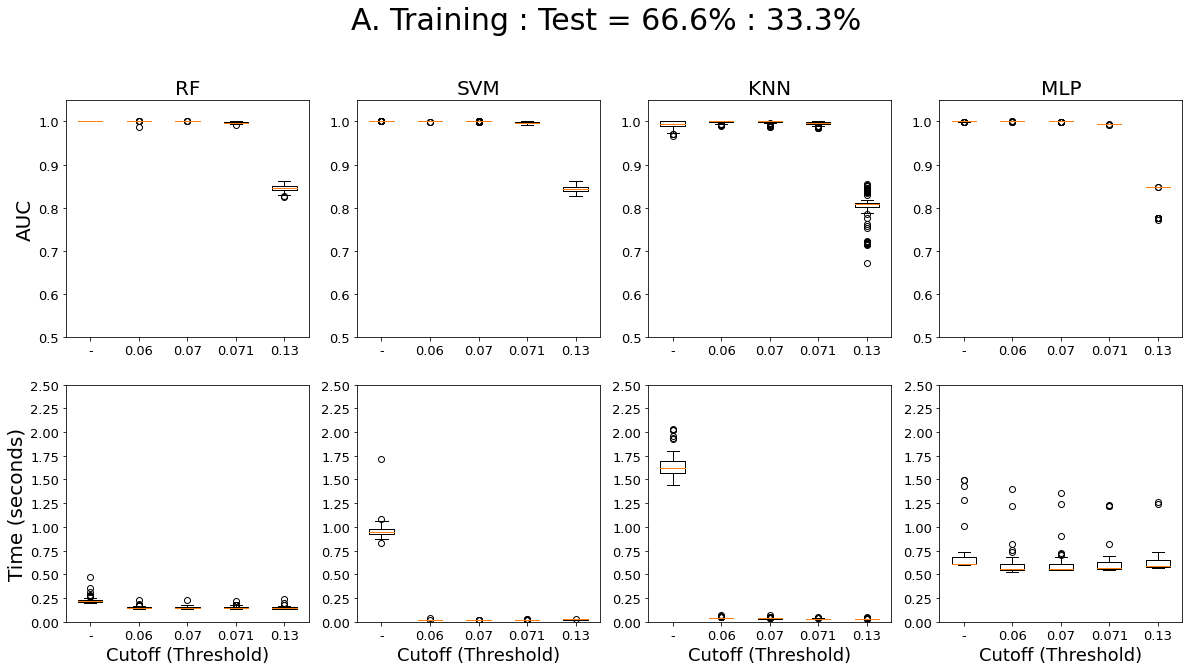

In [164]:
# thres = [[0.01], [0.06], [0.13]][::-1]
#th = [0.0, 0.04, 0.07, 0.13]

thres = [[0.06], [0.07], [0.071], [0.13]][::-1]


n_thres = len(thres)+1


thres_list = [str(item).replace('[','') for item in thres] +['-']
thres_list = [str(item).replace(']','') for item in thres_list]
thres_list = thres_list[::-1]
# thres_list



fig = plt.figure(figsize=(20,10))
fig.suptitle('A. Training : Test = 66.6% : 33.3%', fontsize = 30)
fig.subplots_adjust(top=0.85)
# plt.rcParams['figure.constrained_layout.use'] = True

low_acc = 0.5
high_acc = 1.05
interval_acc = 0.1
plt.subplot(241)
plt.boxplot([list_acc_aoc[:,1],\
             list_acc_aoc[:,3], \
            list_acc_aoc[:,5],\
             list_acc_aoc[:,7],\
            list_acc_aoc[:,9]])
plt.title('RF', fontsize = 20)
#plt.xlabel('Cutoff (Threshold)', fontsize = 18)
plt.ylabel('AUC' , fontsize = 20)
plt.ylim([low_acc, high_acc])
plt.xticks(np.arange(1, len(thres_list)+1),thres_list, fontsize = 13, rotation = 0)
plt.yticks(np.arange(low_acc, high_acc, interval_acc),fontsize = 13)

#plt.show()

plt.subplot(242)
plt.boxplot([list_acc_aoc_svm[:,1],\
             list_acc_aoc_svm[:,3], \
            list_acc_aoc_svm[:,5],\
             list_acc_aoc_svm[:,7], \
            list_acc_aoc_svm[:,9]])
plt.title('SVM', fontsize = 20)
#plt.xlabel('Cutoff (Threshold)', fontsize = 18)
#plt.ylabel('AUC', fontsize = 20)
plt.ylim([low_acc, high_acc])
#plt.show()
plt.xticks(np.arange(1, len(thres_list)+1),thres_list, fontsize = 13, rotation = 0)
plt.yticks(np.arange(low_acc, high_acc, interval_acc),fontsize = 13)


plt.subplot(243)
plt.boxplot([list_acc_aoc_knn[:,1], \
             list_acc_aoc_knn[:,3], \
             list_acc_aoc_knn[:,5], \
             list_acc_aoc_knn[:,7], \
             list_acc_aoc_knn[:,9]])
             
plt.title('KNN', fontsize = 20)
#plt.xlabel('Cutoff (Threshold)', fontsize = 18)
#plt.ylabel('AUC', fontsize = 20)
plt.ylim([low_acc, high_acc])
plt.xticks(np.arange(1, len(thres_list)+1),thres_list, fontsize = 13, rotation = 0)
plt.yticks(np.arange(low_acc, high_acc, interval_acc),fontsize = 13)


plt.subplot(244)
plt.boxplot([list_acc_aoc_cnn[:,1], \
             list_acc_aoc_cnn[:,3], \
             list_acc_aoc_cnn[:,5], \
             list_acc_aoc_cnn[:,7],\
             list_acc_aoc_cnn[:,9]])
             
plt.title('MLP', fontsize = 20)
#plt.xlabel('Cutoff (Threshold)', fontsize = 18)
#plt.ylabel('AUC', fontsize = 20)
plt.ylim([low_acc, high_acc])
plt.xticks(np.arange(1, len(thres_list)+1),thres_list, fontsize = 13, rotation = 0)
plt.yticks(np.arange(low_acc, high_acc, interval_acc),fontsize = 13)

#plt.show()

low_time = 0.0
high_time = 2.0

plt.subplot(245)
plt.boxplot([list_time[:,0],\
             list_time[:,1],\
             list_time[:,2],\
             list_time[:,3], \
             list_time[:,4]],labels=thres_list)
#plt.title('Random Forest', fontsize = 20)
plt.xlabel('Cutoff (Threshold)', fontsize = 18)
plt.ylabel('Time (seconds)', fontsize = 20)
plt.ylim([low_time, high_time])
plt.xticks(np.arange(1, len(thres_list)+1),thres_list, fontsize = 13, rotation = 0)
plt.yticks(np.arange(0.0, 2.51, 0.25),fontsize = 13)


plt.subplot(246)
plt.boxplot([list_time_svm[:,0],\
             list_time_svm[:,1],\
             list_time_svm[:,2],\
             list_time_svm[:,3], \
             list_time_svm[:,4]],labels=thres_list)
#plt.title('SVM', fontsize = 20)
plt.xlabel('Cutoff (Threshold)', fontsize = 18)
#plt.ylabel('Time', fontsize = 20)
plt.ylim([low_time, high_time])
plt.xticks(np.arange(1, len(thres_list)+1),thres_list, fontsize = 13, rotation = 0)
plt.yticks(np.arange(0.0, 2.51, 0.25),fontsize = 13)


plt.subplot(247)
plt.boxplot([list_time_knn[:,0],\
             list_time_knn[:,1],\
             list_time_knn[:,2],\
             list_time_knn[:,3], \
             list_time_knn[:,4]],labels=thres_list)
#plt.title('KNN with k=5', fontsize = 20)
plt.xlabel('Cutoff (Threshold)', fontsize = 18)
#plt.ylabel('Time', fontsize = 20)
plt.ylim([low_time, high_time])
plt.xticks(np.arange(1, len(thres_list)+1),thres_list, fontsize = 13, rotation = 0)
plt.yticks(np.arange(0.0, 2.51, 0.25),fontsize = 13)


plt.subplot(248)
plt.boxplot([list_time_cnn[:,0],\
             list_time_cnn[:,1],\
             list_time_cnn[:,2],\
             list_time_cnn[:,3], \
             list_time_cnn[:,4]],labels=thres_list)
#plt.title('MLP with three layers', fontsize = 20)
plt.xlabel('Cutoff (Threshold)', fontsize = 18)
#plt.ylabel('Time', fontsize = 20)
plt.ylim([low_time, high_time])
plt.xticks(np.arange(1, len(thres_list)+1),thres_list, fontsize = 13, rotation = 0)
plt.yticks(np.arange(0.0, 2.51, 0.25),fontsize = 13)

plt.show()
fig.savefig("multi/Figure5_{}.pdf".format(test_size), bbox_inches='tight')

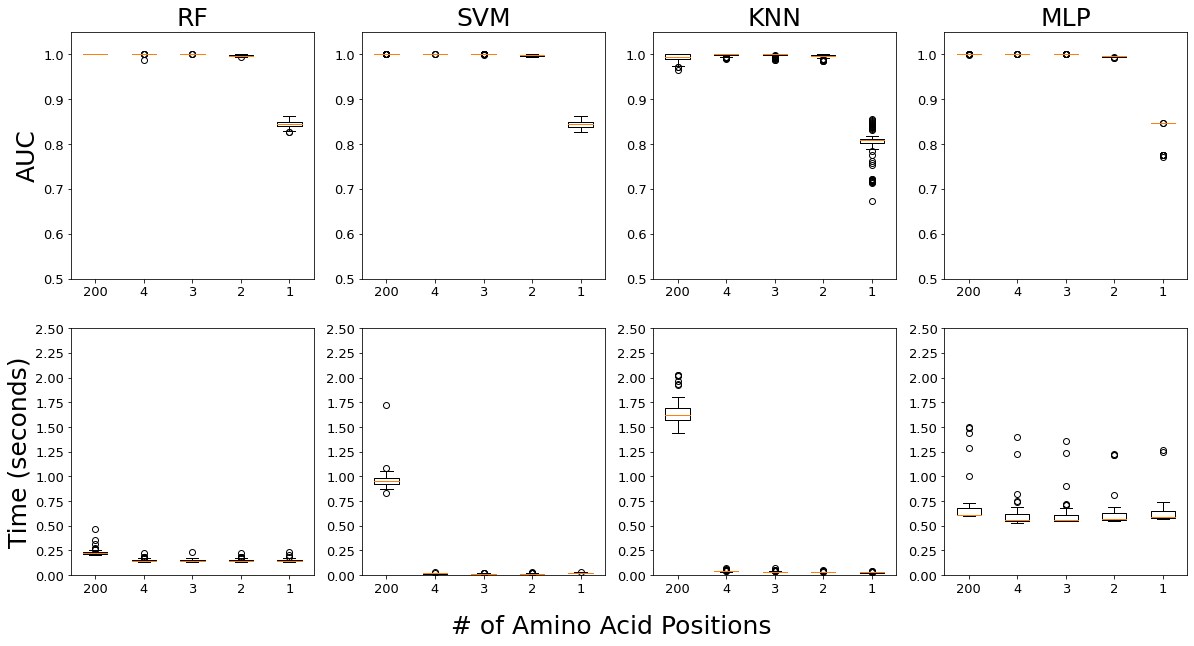

In [346]:
# thres = [[0.01], [0.06], [0.13]][::-1]
#th = [0.0, 0.04, 0.07, 0.13]

thres = [[0.06], [0.07], [0.071], [0.13]][::-1]


n_thres = len(thres)+1

fontsize_ml = 25

thres_list = [str(item).replace('[','') for item in thres] +['-']
thres_list = [str(item).replace(']','') for item in thres_list]
thres_list = thres_list[::-1]
# # thres_list
# thres_list = ['All','4\n(191)', '3\n(137)', '2\n(170)', '1\n(26)']
thres_list = ['200','4', '3', '2', '1']



fig = plt.figure(figsize=(20,10))
# fig.suptitle('Positions 26,170,137,191 are used in the order', fontsize = 30)
# fig.subplots_adjust(top=0.85)
# fig.suptitle('# of Amino Acid Positions \n (Accumulatively Used Positions) ', x = 0.5, y = 0, fontsize = 30)
fig.suptitle('# of Amino Acid Positions', x = 0.5, y = 0.07, fontsize = 25)


# plt.rcParams['figure.constrained_layout.use'] = True

low_acc = 0.5
high_acc = 1.05
interval_acc = 0.1
plt.subplot(241)
plt.boxplot([list_acc_aoc[:,1],\
             list_acc_aoc[:,3], \
            list_acc_aoc[:,5],\
             list_acc_aoc[:,7],\
            list_acc_aoc[:,9]])
plt.title('RF', fontsize = fontsize_ml)
#plt.xlabel('Cutoff (Threshold)', fontsize = 18)
plt.ylabel('AUC' , fontsize = 25)
plt.ylim([low_acc, high_acc])
plt.xticks(np.arange(1, len(thres_list)+1),thres_list, fontsize = 13, rotation = 0)
plt.yticks(np.arange(low_acc, high_acc, interval_acc),fontsize = 13)

#plt.show()

plt.subplot(242)
plt.boxplot([list_acc_aoc_svm[:,1],\
             list_acc_aoc_svm[:,3], \
            list_acc_aoc_svm[:,5],\
             list_acc_aoc_svm[:,7], \
            list_acc_aoc_svm[:,9]])
plt.title('SVM', fontsize = fontsize_ml)
#plt.xlabel('Cutoff (Threshold)', fontsize = 18)
#plt.ylabel('AUC', fontsize = 20)
plt.ylim([low_acc, high_acc])
#plt.show()
plt.xticks(np.arange(1, len(thres_list)+1),thres_list, fontsize = 13, rotation = 0)
plt.yticks(np.arange(low_acc, high_acc, interval_acc),fontsize = 13)


plt.subplot(243)
plt.boxplot([list_acc_aoc_knn[:,1], \
             list_acc_aoc_knn[:,3], \
             list_acc_aoc_knn[:,5], \
             list_acc_aoc_knn[:,7], \
             list_acc_aoc_knn[:,9]])
             
plt.title('KNN', fontsize = fontsize_ml)
#plt.xlabel('Cutoff (Threshold)', fontsize = 18)
#plt.ylabel('AUC', fontsize = 20)
plt.ylim([low_acc, high_acc])
plt.xticks(np.arange(1, len(thres_list)+1),thres_list, fontsize = 13, rotation = 0)
plt.yticks(np.arange(low_acc, high_acc, interval_acc),fontsize = 13)


plt.subplot(244)
plt.boxplot([list_acc_aoc_cnn[:,1], \
             list_acc_aoc_cnn[:,3], \
             list_acc_aoc_cnn[:,5], \
             list_acc_aoc_cnn[:,7],\
             list_acc_aoc_cnn[:,9]])
             
plt.title('MLP', fontsize = fontsize_ml)
#plt.xlabel('Cutoff (Threshold)', fontsize = 18)
#plt.ylabel('AUC', fontsize = 20)
plt.ylim([low_acc, high_acc])
plt.xticks(np.arange(1, len(thres_list)+1),thres_list, fontsize = 13, rotation = 0)
plt.yticks(np.arange(low_acc, high_acc, interval_acc),fontsize = 13)

#plt.show()

low_time = 0.0
high_time = 2.0

# x_label_str = '# of Positions\n Used Position (accumulative)'
x_label_str = ''

plt.subplot(245)
plt.boxplot([list_time[:,0],\
             list_time[:,1],\
             list_time[:,2],\
             list_time[:,3], \
             list_time[:,4]],labels=thres_list)
#plt.title('Random Forest', fontsize = 20)
plt.xlabel(x_label_str, fontsize = 18)
plt.ylabel('Time (seconds)', fontsize = 25)
plt.ylim([low_time, high_time])
plt.xticks(np.arange(1, len(thres_list)+1),thres_list, fontsize = 13, rotation = 0)
plt.yticks(np.arange(0.0, 2.51, 0.25),fontsize = 13)


plt.subplot(246)
plt.boxplot([list_time_svm[:,0],\
             list_time_svm[:,1],\
             list_time_svm[:,2],\
             list_time_svm[:,3], \
             list_time_svm[:,4]],labels=thres_list)
#plt.title('SVM', fontsize = 20)
plt.xlabel(x_label_str, fontsize = 18)
#plt.ylabel('Time', fontsize = 20)
plt.ylim([low_time, high_time])
plt.xticks(np.arange(1, len(thres_list)+1),thres_list, fontsize = 13, rotation = 0)
plt.yticks(np.arange(0.0, 2.51, 0.25),fontsize = 13)


plt.subplot(247)
plt.boxplot([list_time_knn[:,0],\
             list_time_knn[:,1],\
             list_time_knn[:,2],\
             list_time_knn[:,3], \
             list_time_knn[:,4]],labels=thres_list)
#plt.title('KNN with k=5', fontsize = 20)
plt.xlabel(x_label_str, fontsize = 18)
#plt.ylabel('Time', fontsize = 20)
plt.ylim([low_time, high_time])
plt.xticks(np.arange(1, len(thres_list)+1),thres_list, fontsize = 13, rotation = 0)
plt.yticks(np.arange(0.0, 2.51, 0.25),fontsize = 13)


plt.subplot(248)
plt.boxplot([list_time_cnn[:,0],\
             list_time_cnn[:,1],\
             list_time_cnn[:,2],\
             list_time_cnn[:,3], \
             list_time_cnn[:,4]],labels=thres_list)
#plt.title('MLP with three layers', fontsize = 20)
plt.xlabel(x_label_str, fontsize = 18)
#plt.ylabel('Time', fontsize = 20)
plt.ylim([low_time, high_time])
plt.xticks(np.arange(1, len(thres_list)+1),thres_list, fontsize = 13, rotation = 0)
plt.yticks(np.arange(0.0, 2.51, 0.25),fontsize = 13)



plt.show()
fig.savefig("multi/Figure_rev2_{}.pdf".format(test_size), bbox_inches='tight')

In [233]:
lists = [list_acc_aoc, list_acc_aoc_svm, list_acc_aoc_knn, list_acc_aoc_cnn, \
         list_time, list_time_svm, list_time_knn, list_time_cnn]

names = ['acc_rf', 'acc_svm', 'acc_knn', 'acc_cnn', 'time_rf', 'time_svm', 'time_knn', 'time_cnn']

#import json
import pickle

for j in range(len(lists)):
    with open("results_clsssfication/test_{}_{}.txt".format(test_size, names[j]), "wb") as fp:
        pickle.dump(lists[j], fp)
    
## When we need to load it    
# with open("test_what.txt", "rb") as fp:
#     b = pickle.load(fp)
            

In [ ]:
list_

In [234]:
list_acc_aoc_knn[:,1]

array([0.99350414, 1.        , 0.99588899, 0.99995112, 0.9876834 ,
       0.99426201, 1.        , 0.99529974, 0.99567318, 0.99375   ,
       1.        , 0.99140051, 1.        , 0.9929749 , 0.99998773,
       0.98884783, 0.98798381, 0.99735244, 1.        , 0.99401212,
       1.        , 0.99316589, 0.98383741, 1.        , 0.98928329,
       1.        , 0.98563723, 0.99089814, 0.98937632, 0.9854244 ,
       0.99126898, 0.98967691, 1.        , 0.99540177, 0.98552019,
       0.99750613, 0.99289363, 0.9946671 , 1.        , 0.99456211,
       0.99995826, 0.9901988 , 1.        , 0.99999864, 1.        ,
       0.98700844, 1.        , 0.99553236, 0.98178206, 0.97506293,
       0.99478844, 0.99426646, 0.99253713, 0.98890252, 0.97067264,
       0.99373765, 0.9884234 , 0.99431457, 0.99346508, 0.99464165,
       0.98327754, 0.9813627 , 0.98757003, 0.9946671 , 1.        ,
       0.98500057, 0.99540816, 0.98941233, 0.97146212, 1.        ,
       0.99031093, 0.99731829, 0.98957795, 0.99011419, 0.98758

In [235]:
prfs = [list_prec_recall_fscore, list_prec_recall_fscore_svm, \
        list_prec_recall_fscore_knn, list_prec_recall_fscore_cnn]
for i in range(4):
    aim = prfs[i]
    res = sum(aim)/len(aim)
    for j in range(5):
        print(res[3*j:3*(j+1)])
        
    print('\n')

[0.99981268 0.99981191 0.99981009]
[0.99649793 0.99644201 0.99641662]
[0.99603051 0.99597179 0.99594561]
[0.99184263 0.99178683 0.99175373]
[0.75354373 0.85783699 0.79883124]


[0.99897577 0.99896552 0.99895534]
[0.99599242 0.99594044 0.99591341]
[0.99595702 0.99589342 0.99587197]
[0.99234763 0.99231975 0.99228821]
[0.75365592 0.85769592 0.79880581]


[0.99089585 0.99073668 0.99022962]
[0.99412088 0.99393417 0.99395527]
[0.99353208 0.99332288 0.99334518]
[0.98767883 0.98739812 0.98742365]
[0.73155788 0.83584639 0.77504748]


[0.9941609  0.99394984 0.99383204]
[0.99500319 0.99474922 0.99464084]
[0.99499419 0.99462382 0.99454735]
[0.99003576 0.98974922 0.98977372]
[0.73173153 0.83935737 0.77705426]




### Visualize the result

In [236]:
x

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
1,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
2,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
3,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
4,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
1927,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
1928,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
1929,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392


In [237]:
x_all = pd.DataFrame(new_df['AA_code'].values.tolist())
x_all

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
1,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
2,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
3,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
4,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
1927,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
1928,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
1929,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392


In [238]:
new_df.columns

Index(['Projects', 'Premise_ID', 'Farm_Type', 'Head', 'Latitude', 'Longitude',
       'RFLP_Type', 'Seq_Comment_Result', 'Sample_Type', 'Sample_Size',
       'Accession_ID', 'NewID', 'AA_code', 'Clades_A6'],
      dtype='object')

In [241]:
set(y[0])

{0, 1, 2, 3}

In [242]:
x_all = x_all.fillna(0.0)
# y_all = y
# label_dict = {'Wild':1, 'MLV':0}

# y1 = [label_dict[item] for item in y_all]
y1 = y
y1 = pd.DataFrame(y1)
y_all = y1.copy()
y_all

,0
0,2
1,2
2,2
3,2
4,0
...,...
1926,0
1927,0
1928,2
1929,2


In [244]:
x_tr, x_te, y_tr, y_te = train_test_split(x_all,y_all,test_size=0.33)#, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(x_tr, y_tr)
y_pred_train = rf.predict(x_tr) # Predictions on training
y_pred_test = rf.predict(x_te) # predictions for test

preds = rf.predict(x_te)
    
y_prob = rf.predict_proba(x_te)
y_prob = y_prob[:,1]

# auc = roc_auc_score(y_te,y_prob, )
# acc = accuracy_score(y_te,preds)
    
# feature_imp = pd.Series(rf.feature_importances_)
# imp = feature_imp.values.reshape(200,5)
# imp2 = imp.sum(axis=1)

<ipython-input-244-d8089ae7ed34>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)


In [320]:
y_te

,0
0,2
1,3
2,0
3,3
4,2
...,...
633,2
634,3
635,2
636,0


In [321]:
len(y_pred_test)
pca_labels = list(y_te.index)
pca_labels

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [322]:
pca_x = x_all.loc[pca_labels].copy()
pca_x = pca_x.reset_index(drop=True)
print(len(pca_x))
pca_x

638


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
1,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
2,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
3,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
4,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
634,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
635,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
636,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392


In [323]:
y_te = y_te.reset_index(drop=True)
y_te

,0
0,2
1,3
2,0
3,3
4,2
...,...
633,2
634,3
635,2
636,0


In [324]:
y_te_pred = pd.DataFrame(list(y_pred_test))
y_te_pred

,0
0,2
1,3
2,0
3,3
4,2
...,...
633,2
634,3
635,2
636,0


In [358]:
pca_x

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
1,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
2,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
3,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
4,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
634,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
635,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
636,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392


In [325]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(pca_x)
print(pca.explained_variance_ratio_)

pca = PCA(n_components=3)
pca.fit(pca_x)
print(pca.explained_variance_ratio_)

[0.36454615 0.14753313]
[0.36454615 0.14753313 0.06333343]


In [326]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(pca_x)
print(len(principalComponents))
principalDf = pd.DataFrame(data = principalComponents, \
                           columns = ['principal component 1', 'principal component 2'])
print(len(principalDf))


638
638


In [327]:
len(pca.components_[1])

1000

In [328]:
principalDf

,principal component 1,principal component 2
0,-3.997678,9.738854
1,-3.998278,9.742466
2,-4.075772,10.010084
3,-4.075772,10.010084
4,15.249934,-1.402461
...,...,...
633,-5.352280,4.950357
634,15.024805,-1.346092
635,12.285165,-0.468430
636,15.249934,-1.402461


In [329]:
%matplotlib inline

df_pc = pd.DataFrame(pca.components_, columns=list(pca_x.columns))
print(len(df_pc))

plt.figure(figsize=(20,10))

pc1 = abs(df_pc.iloc[0][:]).tolist()
pc2 = abs(df_pc.iloc[1][:]).tolist()

pc1_ind = pc1.index(max(pc1))
pc2_ind = pc2.index(max(pc2))


print('The feature {}, in AA position {}, affects PC1 the most\n'.format(pc1_ind, int(pc1_ind/5) +1))
print('The feature {}, in AA position {}, affects PC2 the most\n'.format(pc2_ind, int(pc2_ind/5) +1))
for i in range(len(pc1)):
    if float(pc1[i])>0.25:
        print('Important feature in PC1: {} in AA position {}'.format(i,int(i/5)+1))

for i in range(len(pc2)):
    if float(pc2[i])>0.4:
        print('Important feature in PC2: {} in AA position {}'.format(i,int(i/5)+1))



2
The feature 327, in AA position 66, affects PC1 the most

The feature 167, in AA position 34, affects PC2 the most

Important feature in PC1: 77 in AA position 16
Important feature in PC1: 327 in AA position 66


<Figure size 1440x720 with 0 Axes>

In [352]:
finalDf = pd.concat([principalDf], axis = 1)
finalDf

,principal component 1,principal component 2
0,-3.997678,9.738854
1,-3.998278,9.742466
2,-4.075772,10.010084
3,-4.075772,10.010084
4,15.249934,-1.402461
...,...,...
633,-5.352280,4.950357
634,15.024805,-1.346092
635,12.285165,-0.468430
636,15.249934,-1.402461


In [353]:
finalDf = pd.concat([finalDf, y_te_pred], axis = 1)
finalDf['y_te'] = y_te
finalDf

,principal component 1,principal component 2,0,y_te
0,-3.997678,9.738854,2,2
1,-3.998278,9.742466,3,3
2,-4.075772,10.010084,0,0
3,-4.075772,10.010084,3,3
4,15.249934,-1.402461,2,2
...,...,...,...,...
633,-5.352280,4.950357,2,2
634,15.024805,-1.346092,3,3
635,12.285165,-0.468430,2,2
636,15.249934,-1.402461,0,0


In [357]:
set(finalDf['y_te'])

{0, 1, 2, 3}

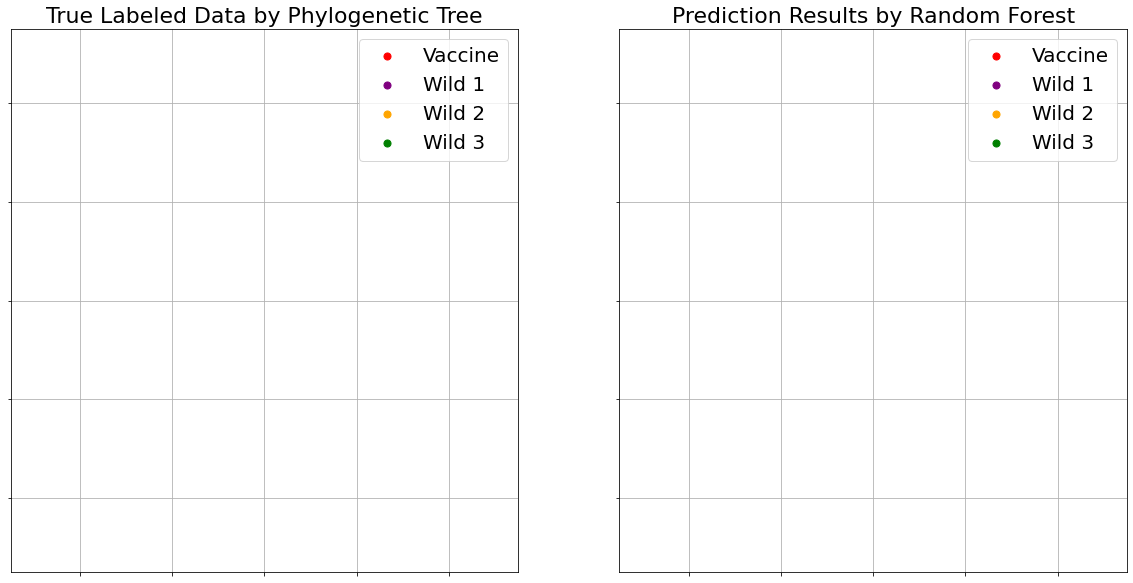

In [356]:
fig3 = plt.figure(figsize = (20,10))

ax = fig3.add_subplot(121) 

#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('True Labeled Data by Phylogenetic Tree', fontsize = 22)

targets = [0, 3, 1, 2]
# 'DarkPurple':3, 'Green':2, 'Orange':1, 'Red':0
colors = ['red', 'purple', 'orange', 'green']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['y_te'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               ,finalDf.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(['Vaccine', 'Wild 1', 'Wild 2', 'Wild 3'], fontsize = 20)
ax.grid(True)
ax.set_xticklabels([])
ax.set_yticklabels([])


ax = fig3.add_subplot(122) 

#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Prediction Results by Random Forest', fontsize = 22)

# targets = [0, 3, 1, 2]
# # 'DarkPurple':3, 'Green':2, 'Orange':1, 'Red':0
# colors = ['red', 'purple', 'orange', 'green']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf[0] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               ,finalDf.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(['Vaccine', 'Wild 1', 'Wild 2', 'Wild 3'], fontsize = 20)
ax.grid(True)
ax.set_xticklabels([])
ax.set_yticklabels([])


fig3.savefig("multi/Figure3_pca.pdf", bbox_inches='tight')


In [313]:
x_all

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
1,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
2,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
3,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
4,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
1927,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
1928,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392
1929,-0.663,-1.524,2.219,-1.005,1.212,-1.019,-0.987,-1.505,1.266,-0.912,...,1.538,-0.055,1.502,0.44,2.897,0.189,2.081,-1.628,0.421,-1.392


In [314]:
y

,0
0,2
1,2
2,2
3,2
4,0
...,...
1926,0
1927,0
1928,2
1929,2


[0.4336536  0.11497347]
[0.4336536  0.11497347 0.04748028]
1931
638
      principal component 1  principal component 2  0
0                 -0.277393              11.679965  2
1                 -0.277406              11.682044  2
2                 -0.278628              11.862478  2
3                 -0.278628              11.862478  2
4                 15.910369              -2.527032  0
...                     ...                    ... ..
1926              15.579838               1.527581  0
1927              15.713949               2.165618  0
1928              -0.399771              11.360251  2
1929              -0.823462              11.157033  2
1930              -0.323169              11.330596  2

[1931 rows x 3 columns]
{0, 1, 2, 3}


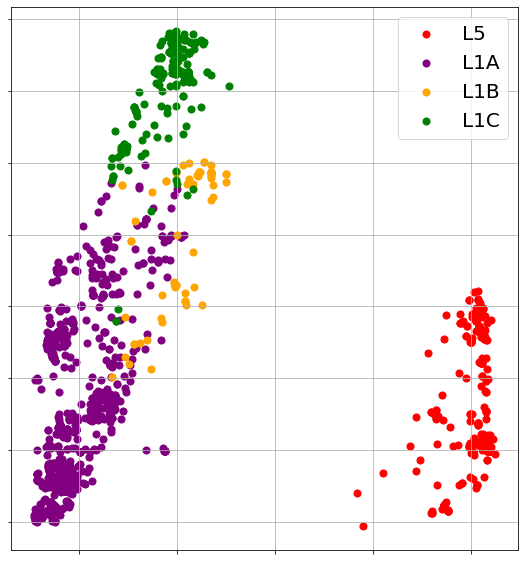

In [350]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(x_all)
print(pca.explained_variance_ratio_)

pca = PCA(n_components=3)
pca.fit(x_all)
print(pca.explained_variance_ratio_)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_all)

print(len(principalComponents))
principalDf_all = pd.DataFrame(data = principalComponents, \
                           columns = ['principal component 1', 'principal component 2'])
print(len(principalDf))

finalDf_all = pd.concat([principalDf_all], axis = 1)


finalDf_all = pd.concat([finalDf_all, y], axis = 1)
# finalDf['y_te'] = y_te
finalDf_all
print(finalDf_all)
print(set(finalDf_all[0]))

fig3_1 = plt.figure(figsize = (20,10))

ax = fig3_1.add_subplot(121) 

#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('True Labeled Data by Phylogenetic Tree', fontsize = 22)

targets = [0, 3, 1, 2]
# 'DarkPurple':3, 'Green':2, 'Orange':1, 'Red':0
colors = ['red', 'purple', 'orange', 'green']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf_all[0] == target
    ax.scatter(finalDf_all.loc[indicesToKeep, 'principal component 1']
               ,finalDf_all.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(['L5', 'L1A', 'L1B', 'L1C'], fontsize = 20)
ax.grid(True)
ax.set_xticklabels([])
ax.set_yticklabels([])

fig3_1.savefig("multi/Figure3_pca_all.pdf", bbox_inches='tight')


{0, 1, 2, 3}

In [265]:
x_embedded = sklearn.manifold.TSNE(2).fit_transform(pca_x)
x_embedded.shape

(638, 2)

In [266]:
x_embedded

array([[ 23.124329  ,  22.081028  ],
       [ -3.6720684 ,   0.35163647],
       [-10.07179   , -39.472797  ],
       ...,
       [ 16.810911  ,  31.723976  ],
       [-20.308775  , -31.66033   ],
       [ 10.709044  ,  11.118994  ]], dtype=float32)

In [268]:
final_df_tsne = pd.DataFrame(x_embedded)
final_df_tsne

,0,1
0,23.124329,22.081028
1,-3.672068,0.351636
2,-10.071790,-39.472797
3,21.014721,8.062505
4,16.016994,29.617208
...,...,...
633,19.276167,26.438908
634,10.719224,11.115591
635,16.810911,31.723976
636,-20.308775,-31.660330


In [269]:
final_df_tsne = pd.concat([final_df_tsne, y_te_pred], axis = 1)
final_df_tsne['y_te'] = y_te
final_df_tsne

,0,1,0,y_te
0,23.124329,22.081028,2,2
1,-3.672068,0.351636,3,3
2,-10.071790,-39.472797,0,0
3,21.014721,8.062505,3,3
4,16.016994,29.617208,2,2
...,...,...,...,...
633,19.276167,26.438908,2,2
634,10.719224,11.115591,3,3
635,16.810911,31.723976,2,2
636,-20.308775,-31.660330,0,0


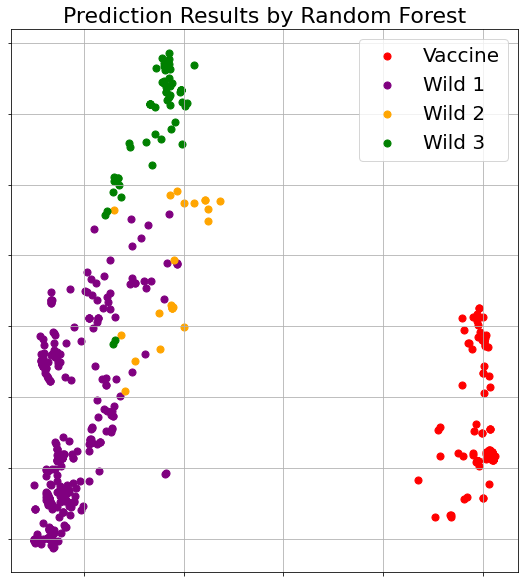

In [274]:
fig3 = plt.figure(figsize = (20,10))

# ax = fig3.add_subplot(121) 

# #ax.set_xlabel('Principal Component 1', fontsize = 15)
# #ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('True Labeled Data by Phylogenetic Tree', fontsize = 22)

# targets = [0, 1]
# colors = ['blue', 'y']

# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['y_te'] == target
#     ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#                ,finalDf.loc[indicesToKeep, 'principal component 2']
#                ,c = color
#                ,s = 50)
# ax.legend(['Vaccine', 'Wild'], fontsize = 20)
# ax.grid(True)
# ax.set_xticklabels([])
# ax.set_yticklabels([])


ax = fig3.add_subplot(122) 

#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Prediction Results by Random Forest', fontsize = 22)

targets = [0, 3, 1, 2]
# 'DarkPurple':3, 'Green':2, 'Orange':1, 'Red':0
colors = ['red', 'purple', 'orange', 'green']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf[0] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               ,finalDf.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(['Vaccine', 'Wild 1', 'Wild 2', 'Wild 3'], fontsize = 20)
ax.grid(True)
ax.set_xticklabels([])
ax.set_yticklabels([])


fig3.savefig("multi/Figure3_tsne.pdf", bbox_inches='tight')

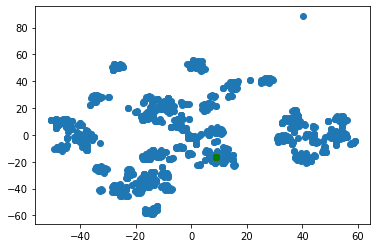

In [263]:
plt.scatter(x_embedded[:,0], x_embedded[:,1])

targets = [0, 1, 2, 3]
colors = ['blue', 'y', 'r', 'g']

for label in y_all[0]:
    if label==0:
        plt.scatter(x_embedded[i,0], x_embedded[i,1], c = 'red')
    elif label==1:
        plt.scatter(x_embedded[i,0], x_embedded[i,1], c = 'blue')
    elif label==2:
        plt.scatter(x_embedded[i,0], x_embedded[i,1], c = 'g')
    else:
        plt.scatter(x_embedded[i,0], x_embedded[i,1], c = 'y')

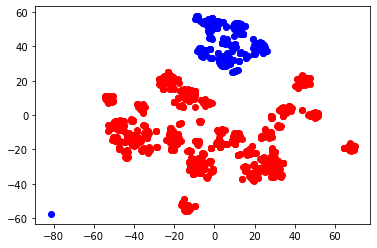

In [166]:
label1 = 0
label0 = 0

for pair,label in zip(x_embedded, y_all[0]):
    if label ==1:
        label1 +=1
        plt.scatter(pair[0], pair[1], color = 'red')
    elif label ==0:
        label0 +=1
        plt.scatter(pair[0], pair[1], color = 'blue')

In [140]:
label0, label1

(406, 1530)

In [121]:
x_embedded[2,1]

20.218576

In [ ]:
y_te

In [ ]:
y_te_pred

In [ ]:
y_te_l = y_te[0].tolist()
y_te_l
y_tp_l = y_te_pred[0].tolist()
y_tp_l

In [ ]:
zero2one = 0
one2zero = 0
for i in range(len(y_te_l)):
    if y_te_l[i]==0 and y_tp_l[i]==1:
        zero2one +=1
    elif y_te_l[i] ==1 and y_tp_l[i]==0:
        one2zero +=1
    

In [ ]:
print(zero2one)
print(one2zero)

wild: 1
vaccine: 0

In [ ]:
y_te[y_te[0]==1]